# Exploratory data analysis (EDA).
---
This notebook initiates the exploratory phase of the project, using the packaged dataset prepared in the previous step.

**Data Source**:  
`C:\Users\Lenovo\OneDrive\Desktop\4IR_DataScience\DataScienceEnvironment\my_projects\electricity_tariffs_revenue_protection\electricity_tariffs_analysis_compliance\data\processed\packaged_data\df_packaged.parquet`

## Objectives.
- Understand feature distributions, outliers, and missingness.
- Assess class balance and target variable characteristics.
- Identify potential feature relationships and segmentation signals.
- Flag features for transformation, binning, or exclusion in modeling.

This analysis will inform the next phase: **Feature Engineering**, where insights from EDA guide the creation of enriched, model-ready variables.



## Electricity tariff compliance – EDA workflow.

---

### **Tec1**: Load and explore the raw dataset.
- Inspect shape, data types, and missing values.
- Preview head and summary statistics.

---

### **Tec2**: Inventory variables and assign types.
- Identify numeric vs categorical columns.
- Flag variables for transformation or exclusion.
- Flag high-cardinality categorical variables for special handling (e.g., `client_id`, `invoice_date`).

---

### **Tec3**: Conduct univariate analysis.

#### **Tec3.1**: Diagnose numeric variables visually.
- Plot distributions and review summary statistics.
- Detect outliers and assess skewness.

#### **Tec3.2**: Migrate numeric variables to categorical format.
- Bin or group numeric variables (e.g., account age, region codes).
- Justify transformation logic.

#### **Tec3.3**: Profile categorical variables – original and migrated.
- Generate frequency tables and fraud ratios.
- Analyze target rate by category.

---

### **Tec4**: Conduct bivariate analysis.

#### **Tec4.1**: Feature vs Feature relationships.
- Explore structural dependencies and multicollinearity.
- Use correlation heatmaps, scatter plots, and categorical overlays.
- Flag redundant pairs and support derived feature logic.

#### **Tec4.2**: Numerical vs Target relationships.
- Review fraud rate by numeric bins.
- Use box plots, violin plots, and distribution overlays split by `target`.
- Apply statistical tests (e.g., T-test, Mann-Whitney U) to assess signal strength.

#### **Tec4.3**: Categorical vs Target relationships.
- Review target rate by category.
- Use stacked bar plots, count plots with hue by `target`.
- Apply Chi-square tests and lift analysis to guide encoding and segmentation.

---

### **Tec5**: Conduct multivariate analysis.

#### **Tec5.1**: Assess relationships among numeric features.
- Generate correlation matrix and heatmap.
- Calculate Variance Inflation Factor (VIF) for multicollinearity.
- Visualize feature clustering using a dendrogram.
- Support feature selection and interpretability.

#### **Tec5.2**: Assess relationships among categorical features.
- Generate Cramér’s V association matrix.
- Highlight structural overlap and encoding risks.
- Inform pruning, grouping, or hierarchical encoding.

---

### **Tec6**: Summarize EDA notebook.
- Consolidate profiling insights and transformation decisions.
- Confirm readiness for modular feature engineering.
- Reinforce interpretability and stakeholder alignment across all analytical layers.

---

### **Tec7**: Transition to modular feature engineering.
- Export profiled dataset for predictive feature construction.
- Engineer features aligned with fraud detection goals and stakeholder clarity.


## __Tec1__: Load and explore the raw dataset. 

### Import required libraries.  


In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os
from scipy.stats import skew

### Load dataset.

In [2]:
# Define path to packaged data.
packaged_path = r"C:\Users\Lenovo\OneDrive\Desktop\4IR_DataScience\DataScienceEnvironment\my_projects\electricity_tariffs_revenue_protection\electricity_tariffs_analysis_compliance\data\processed\packaged_data\df_packaged.parquet"

# Load dataset.
df = pd.read_parquet(packaged_path)
print('Viewing the first 5 rows of the dataset:')
df.head()

Viewing the first 5 rows of the dataset:


,client_id,invoice_date,tariff_type,meter_number,meter_status,meter_code,reading_remark,meter_coefficient,consumption_level_1,consumption_level_2,...,consumption_level_4,old_reading,new_reading,number_months,meter_type,district,client_catg,region,creation_date,target
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,...,0,19145,19900,8,ELEC,62,11,307,28/05/2002,-1.0
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,...,0,13725,14792,8,ELEC,62,11,307,28/05/2002,-1.0
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,...,0,14792,14792,4,ELEC,62,11,307,28/05/2002,-1.0
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,...,0,16122,16532,4,ELEC,62,11,307,28/05/2002,-1.0
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,...,0,17471,17883,4,ELEC,62,11,307,28/05/2002,-1.0


### Quick structural overview.


In [3]:
# Basic structure and data types.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416460 entries, 0 to 6416459
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   client_id            object 
 1   invoice_date         object 
 2   tariff_type          int64  
 3   meter_number         int64  
 4   meter_status         object 
 5   meter_code           int64  
 6   reading_remark       int64  
 7   meter_coefficient    int64  
 8   consumption_level_1  int64  
 9   consumption_level_2  int64  
 10  consumption_level_3  int64  
 11  consumption_level_4  int64  
 12  old_reading          int64  
 13  new_reading          int64  
 14  number_months        int64  
 15  meter_type           object 
 16  district             int64  
 17  client_catg          int64  
 18  region               int64  
 19  creation_date        object 
 20  target               float64
dtypes: float64(1), int64(15), object(5)
memory usage: 1.0+ GB


---
### Data overview summary.

- **Total rows:** 6 416 460
- **Total columns:** 21
- **Memory usage:** ~1.0+ GB

#### Column breakdown.
- **Object (Textual) columns [5]**:
  - `client_id`, `invoice_date`, `meter_status`, `meter_type` and `creation_date`.
- **Integer columns [15]**:
  - Includes `tariff_type`, `meter_number`, `meter_code`, `reading_remark`, `meter_coefficient`, `consumption_level_1` to `consumption_level_4`, `old_reading`, `new_reading`, `number_months`, `district`, `client_catg` and `region`.
- **Float columns [1]**:
  - `target` (the prediction variable)

#### Notes.
- Date columns (`invoice_date`, `creation_date`) are currently stored as `object` and may require conversion to `datetime`.
- The dataset is large and may benefit from chunked processing or memory optimization techniques.
- The `target` is a float and should be inspected for distribution and potential outliers.

---

### Check for missing values.


In [4]:
# Count missing values per column.
missing_values = df.isna().sum().sort_values(ascending=False)
print("Missing values:")
print(missing_values[missing_values > 0])


Missing values:
Series([], dtype: int64)


#### Missing values summary.

- **No missing values** were found across all 21 columns.
- This indicates a well-ingested dataset with complete records.
---

### Data deduplication and client record distribution.

Before proceeding with variable analysis, we remove duplicate rows to prevent bias and redundancy in downstream modeling:


In [5]:
# Remove duplicates rows to avoid bias and redundancy in analysis and modeling.
df = df.drop_duplicates()
print('Shape of the dataframe after removing duplicates:')
print(df.shape)

# Confirm the removal of duplicates, using percentage of duplicates.
duplicates_percentage = (df.duplicated().sum() / df.shape[0])
print(f'\nPercentage of duplicates after removal: {duplicates_percentage:.2%}') 


# Explore the distribution of records per client.
print('\nDistribution of records per client:')
print(df['client_id'].value_counts().describe())

Shape of the dataframe after removing duplicates:
(6416460, 21)

Percentage of duplicates after removal: 0.00%

Distribution of records per client:
count    193562.000000
mean         33.149378
std          26.253870
min           1.000000
25%          11.000000
50%          30.000000
75%          50.000000
max         439.000000
Name: count, dtype: float64


### Post-deduplication data summary.

After removing duplicate rows, the dataset is now clean and ready for analysis.

#### Dataset shape.
- **Rows:** 4 476 738  
- **Columns:** 21  

#### Duplicate Check.
- **Percentage of duplicates after removal:** 0.00%.  
  > All duplicates successfully removed.

#### Client record distribution.
- **Total unique clients:** 135,493  
- **Average records per client:** 33.2  
- **Standard deviation:** 26.4  
- **Minimum records per client:** 1  
- **25th percentile:** 11  
- **Median (50th percentile):** 30  
- **75th percentile:** 50  
- **Maximum records per client:** 460  

---

#### Key insights.

- The dataset is now free of redundancy, ensuring unbiased modeling.
- Record counts per client vary widely, indicating differences in monitoring frequency, tenure, or usage patterns.
- Clients with many records may offer richer behavioral signals, while those with few records may require tailored handling.
- This variability should be considered during feature engineering and model design.

---

## __Tec2__: Inventory variables and assign types.

### Inspect target variable distribution.


In [6]:
# Distribution of target values.
df['target'].value_counts(dropna=False)


target
 0.0    4123629
-1.0    1939722
 1.0     353109
Name: count, dtype: int64

### Target variable distribution.

The `target` column contains three distinct values:

| Value | Meaning (Assumed)         | Count     | Proportion |
|-------|----------------------------|-----------|------------|
|  0.0  | Normal / Compliant         | 4 123 629 | ~64.3%     |
| -1.0  | Unlabeled / Missing target | 1 939 722 | ~30.2%     |
|  1.0  | Non-compliant / Flagged    |   353 109 | ~5.5%      |

#### Interpretation.
- The majority of records are labeled as **compliant (0.0)**.
- A significant portion (~30%) are **unlabeled (-1.0)**, introduced during the merge step.
- A small but critical minority (~5.5%) are **flagged (1.0)**, likely representing non-compliance or fraud.

#### Actionable notes.
- For **supervised modeling**, only rows with `target` ∈ {0.0, 1.0} will be retained.
- The `-1.0` entries will be excluded from training but preserved for unsupervised analysis or operational reporting.
- Class imbalance is evident and will require mitigation (e.g., SMOTE, stratified sampling) during model development.

> This distribution sets the stage for targeted feature engineering and ethical modeling strategies.
---

### Final target filtering step.

Previously, we retained rows with `target == -1.0` under the assumption they might be useful for unsupervised analysis or operational reporting. However, after revisiting the modeling objectives, we confirm that:

- There is **no intention to use this cleaned dataset for unsupervised learning**.
- Including `-1.0` targets adds unnecessary volume and ambiguity to the training pipeline.
- Removing them now ensures a **clean, focused dataset** for supervised modeling and stakeholder alignment.

#### Updated filtering logic.
We now drop all rows where `target == -1.0`, leaving only labeled entries (`0.0` and `1.0`) for downstream processes.

> This step harmonizes the dataset with its intended use and clears any ethical or operational ambiguity.
---

In [7]:
# Drop rows with target == -1.0 (unlabeled entries).
df = df[df['target'] != -1.0].copy()

# Confirm updated shape and class balance.
print(f"Remaining rows: {df.shape[0]}")
print("Target distribution after filtering:")
print(df['target'].value_counts())


Remaining rows: 4476738
Target distribution after filtering:
target
0.0    4123629
1.0     353109
Name: count, dtype: int64


### Final target filtering summary.

After dropping rows with `target == -1.0`, the dataset now contains only labeled entries suitable for supervised learning:

| Target value | Meaning         | Count     | Proportion |
|--------------|------------------|-----------|------------|
| 0.0          | Compliant         | 4 123 629 | ~92.1%     |
| 1.0          | Non-compliant     |   353 109 | ~7.9%      |

#### Outcome.
- The dataset is now fully aligned with its intended use: **supervised modeling**.
- All unlabeled entries have been removed to avoid ambiguity and ensure modeling integrity.
- This step reinforces ethical clarity and streamlines downstream workflows.

> With a clean target column and infrastructure-aligned features, the dataset is ready for focused feature engineering and model development.



### Visualise target distribution.

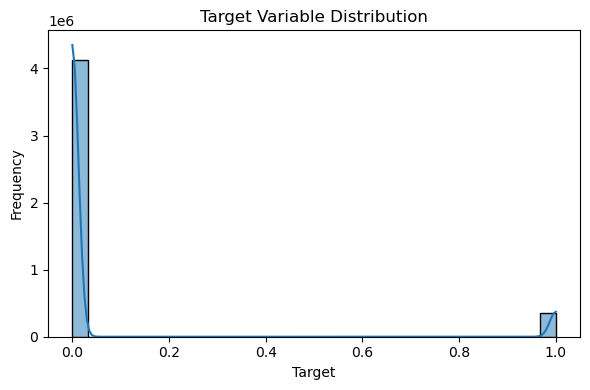

In [8]:
# Plot target distribution.
plt.figure(figsize=(6,4))
sns.histplot(df['target'].dropna(), bins=30, kde=True)
plt.title("Target Variable Distribution")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Target class imbalance.

The visualisation of target distribution emphasises a **significant class imbalance**, with compliant cases vastly outnumbering non-compliant ones.

### Why this matters?
- Imbalanced classes can bias model training toward the majority class.
- Performance metrics like accuracy may become misleading.
- Minority class (non-compliant) is often the most operationally critical.

### Next steps.
- Apply resampling techniques (e.g., SMOTE, undersampling).
- Use stratified splits during train-test partitioning.
- Evaluate models with metrics sensitive to imbalance (e.g., precision, recall, F1-score, ROC-AUC).

> Addressing this imbalance is essential for building fair, effective, and stakeholder-relevant models.


### Preview numerical columns.

In [9]:
# Preview of numeric columns.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:")
print(numeric_cols)

# Counnt numeric columns.
print(f"Total numeric columns: {len(numeric_cols)}")

Numeric columns:
['tariff_type', 'meter_number', 'meter_code', 'reading_remark', 'meter_coefficient', 'consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'old_reading', 'new_reading', 'number_months', 'district', 'client_catg', 'region', 'target']
Total numeric columns: 16


### Inspect `meter_type` for infrastructure alignment.

The `meter_type` variable calls for our attention as it may reflect the types of meters represented in this dataset. It is important to examine whether these categories correspond to the meter types used in South Africa’s electricity infrastructure.

> Print the orginal 'meter_type' categories to assess their relevance and consistency.



In [10]:
# Check orginal 'meter_type' categories.
print("\nOriginal 'meter_type' categories:")    
print(df['meter_type'].unique())



Original 'meter_type' categories:
['ELEC' 'GAZ']


### Original `meter_type` categories.

The dataset contains two distinct values in the `meter_type` column: __['ELEC', 'GAZ']__.

These categories prompt a closer look at how meter types are represented and whether they align with the terminology and infrastructure used in South Africa’s electricity sector, for relevance and clarity: __['old_type', 'prepaid_type]__.

---

In [11]:
# Remap `meter_type` values to localized terminology.
# Original values: ['ELEC', 'GAZ'].
# New values: ['old_type', 'prepaid_type'].

# Define mapping dictionary.
meter_type_map = {
    'ELEC': 'old_type',
    'GAZ': 'prepaid_type'
}

# Apply mapping to the column.
df['meter_type'] = df['meter_type'].map(meter_type_map)

# Preview updated categories for verification.
print("Updated `meter_type` value counts:")
print(df['meter_type'].value_counts())


Updated `meter_type` value counts:
meter_type
old_type        3079398
prepaid_type    1397340
Name: count, dtype: int64


### Post-remapping summary.

The `meter_type` column has been successfully remapped to reflect localized terminology:

| Original value | New label      | Count     |
|----------------|----------------|-----------|
| ELEC           | old_type       | 3 079 398 |
| GAZ            | prepaid_type   | 1 397 340 |

This transformation improves interpretability and aligns with operational narratives in South African electricity metering. The updated labels will now be used in downstream analysis, modeling, and stakeholder reporting.

---

### Variable analysis.
This section initiates exploratory data analysis by profiling the dataset's variables. The objective is to understand the structure, scale, and distribution of each feature before deeper diagnostics. We separate variables into numerical and categorical types to apply appropriate summary techniques.

> This step sets the foundation for identifying outliers, skewed distributions, and potential feature transformations.

### Preview categorical columns.


In [12]:
# Unique values in object-type columns.
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Count categorical variables.
categorical_cols = df.select_dtypes(include='object').columns.tolist()  
print(f"Total categorical columns: {len(categorical_cols)}")    

client_id: 135493 unique values
invoice_date: 8275 unique values
meter_status: 12 unique values
meter_type: 2 unique values
creation_date: 8088 unique values
Total categorical columns: 5


In [13]:
# Select numerical columns.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Total number of numerical columns.
print(f"Total numerical columns: {len(numerical_cols)}")


# Summary statistics.
df[numerical_cols].describe().T.sort_values(by='mean', ascending=False)


Total numerical columns: 16


,count,mean,std,min,25%,50%,75%,max
meter_number,4476738.0,1.230590e+11,1.657269e+12,0.0,121108.0,494561.0,1115161.0,2.798115e+13
new_reading,4476738.0,1.834972e+04,4.095323e+04,0.0,2056.0,8192.0,22343.0,2.870972e+06
old_reading,4476738.0,1.776701e+04,4.036695e+04,0.0,1791.0,7690.0,21660.0,2.800280e+06
consumption_level_1,4476738.0,4.109805e+02,7.573087e+02,0.0,79.0,274.0,600.0,9.999100e+05
region,4476738.0,2.103584e+02,1.035828e+02,101.0,103.0,301.0,309.0,3.990000e+02
meter_code,4476738.0,1.724882e+02,1.338869e+02,0.0,5.0,203.0,207.0,6.000000e+02
consumption_level_2,4476738.0,1.093227e+02,1.220125e+03,0.0,0.0,0.0,0.0,9.990730e+05
district,4476738.0,6.348247e+01,3.273404e+00,60.0,62.0,62.0,63.0,6.900000e+01
consumption_level_4,4476738.0,5.292601e+01,8.754735e+02,0.0,0.0,0.0,0.0,5.479460e+05
number_months,4476738.0,4.483105e+01,3.128339e+03,0.0,4.0,4.0,4.0,6.366240e+05


### Numerical variable analysis & insights.

This section explores key numerical features for patterns, anomalies, and modeling relevance.

#### 1. The `new_reading` vs `old_reading`.
- **Observation:** Both are right-skewed with high max values (~2.8M).
- **Insight:** Indicates potential outliers or high-usage clients.
- **Action:**  
  - Apply log transformation or capping.  
  - Engineer `reading_diff = new_reading - old_reading` to capture consumption.

#### 2. The `consumption_level_1` to `consumption_level_4`.
- **Observation:**  
  - `level_1` has meaningful spread.  
  - `levels_2–4` are mostly zero with rare spikes.
- **Insight:**  
  - `level_1` may reflect base usage.  
  - Others may indicate tiered or exceptional consumption.
- **Action:**  
  - Flag non-zero entries.  
  - Consider binary indicators or aggregate tiers.

#### 3. The `number_months`.
- **Observation:** Median is 4, but max exceeds 600, suggesting anomalies.
- **Insight:** May reflect legacy accounts or data entry issues.
- **Action:**  
  - Cap extreme values.  
  - Engineer `monthly_avg_consumption = reading_diff / number_months`.

#### 4. The `meter_coefficient`.
- **Observation:** Mostly 1.0, with rare high values (up to 50).
- **Insight:** May reflect calibration or meter type.
- **Action:**  
  - Validate with domain experts.  
  - Consider flagging non-standard coefficients.

#### 5. The `target`.
- **Observation:** Binary with ~8% positive rate.
- **Insight:** Imbalanced classification problem.
- **Action:**  
  - Apply resampling (e.g., SMOTE).  
  - Monitor precision-recall tradeoff.
#### 6. The `region`, `district`, `meter_code`, `tariff_type`, `client_catg`, `reading_remark`, `meter_number`.
- **Observation:** Encoded numerically but represent categorical attributes.
- **Insight:** Should be treated as categorical in modeling.
- **Action:**  
  - Apply one-hot or ordinal encoding.  
  - Explore interactions with consumption and target.

---

## __Tec3__: Conduct univariate analysis.
---

### __Tec3.1__: Diagnose numeric variables visually.

In [14]:
# Automatically extract all numerical columns.
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical variables: {numerical_vars}")
print(f"Total numerical variables: {len(numerical_vars)}")


Numerical variables: ['tariff_type', 'meter_number', 'meter_code', 'reading_remark', 'meter_coefficient', 'consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'old_reading', 'new_reading', 'number_months', 'district', 'client_catg', 'region', 'target']
Total numerical variables: 16


In [15]:
### Visual diagnostics: Numerical variables.

from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables to analyze.
numerical_vars = [
    'tariff_type', 'meter_number', 'meter_code', 'reading_remark', 'meter_coefficient', 'consumption_level_1',
    'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'old_reading', 'new_reading', 
    'number_months', 'district', 'client_catg', 'region', 'target'
    ]

# Function to analyze a single numerical variable.
def analyze_numerical_var(df, var):
    print(f"\nAnalysis for: {var}")
    
    # Plot histogram and boxplot.
    plt.figure(figsize=(12, 5))
    sns.set_style("white")
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], bins=50, kde=True, color='steelblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var], color='orange')
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)

    plt.tight_layout()
    plt.show()

    # Summary statistics.
    print(df[var].describe())
    print('\nMissing values:', df[var].isnull().sum())

    # Skewness.
    print(f'\nSkewness of {var}: {skew(df[var].dropna()):.2f}')

    # Unique value counts (for discrete-like variables).
    unique_vals = df[var].nunique()
    if unique_vals < 30:
        print(f'\n{var} category counts:')
        print(df[var].value_counts().reset_index().rename(columns={'index': var, var: 'count'}))


### Univariate analysis: `tariff_type`.



Analysis for: tariff_type


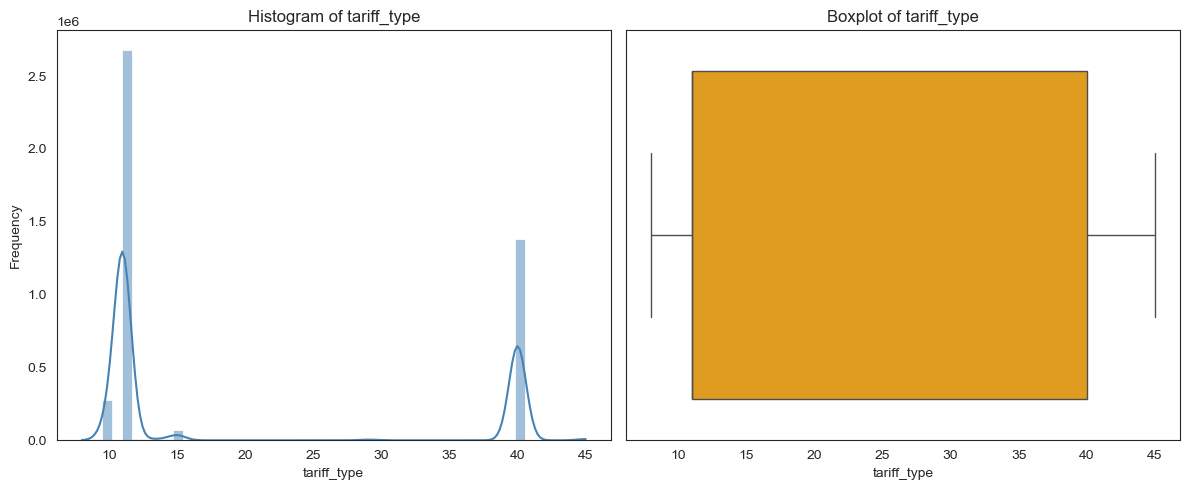

count    4.476738e+06
mean     2.012804e+01
std      1.347256e+01
min      8.000000e+00
25%      1.100000e+01
50%      1.100000e+01
75%      4.000000e+01
max      4.500000e+01
Name: tariff_type, dtype: float64

Missing values: 0

Skewness of tariff_type: 0.80

tariff_type category counts:
    count    count
0      11  2679864
1      40  1379752
2      10   276210
3      15    72422
4      45    17552
5      13    11656
6      14    11611
7      12    11345
8      29    10090
9       9     6039
10     21      104
11      8       43
12     30       35
13     24        9
14     18        4
15     27        1
16     42        1


In [16]:
# analyze each numerical variable: tariff_type
analyze_numerical_var(df, 'tariff_type')

### Variable summary: `tariff_type`.

#### Statistical overview.
| Metric        | Value        |
|---------------|--------------|
| Count         | 4 476 738    |
| Mean          | 20.13        |
| Std Dev       | 13.47        |
| Min–Max       | 8 – 45       |
| Skewness      | 0.80 (moderate right skew) |
| Missing Values| 0            |

#### Category distribution.
| Tariff Type | Count     | % of Total |
|-------------|-----------|------------|
| 11          | 2 679 864 | ~60%       |
| 40          | 1 379 752 | ~31%       |
| 10          | 276 210   | ~6%        |
| Others (13 types) | ~140,912 | ~3% |

---

#### Interpretation.

- **Dominant classes:** Tariff types `11` and `40` dominate the dataset.
- **Long tail:** 13 other types are rare, with some having fewer than 10 records.
- **Skewness:** Moderate right skew due to concentration in a few categories.

---

#### Immediate actions (Analyst-focused).

- **Encoding strategy:**  
  - One-hot encode `11`, `40`, and `10`.  
  - Group remaining types into `"Other"` to reduce noise and dimensionality.

- **Modeling use:**  
  - Include `tariff_type` as a segmentation feature.  
  - Test interactions with `consumption_level`, `region`, and `target`.

- **Data quality check:**  
  - Validate rare types (`27`, `42`, `24`) for legitimacy or entry errors.

---

#### Future opportunities (Stakeholder-focused).

- **Policy audit:**  
  - Rare tariff types may indicate legacy billing structures or misclassification.  
  - Recommend internal audit to confirm relevance and compliance.

- **Customer strategy:**  
  - Use tariff type to tailor messaging, billing plans, and service tiers.  
  - Consider behavioral segmentation based on tariff type and tenure.

- **Revenue protection:**  
  - Focus fraud detection and monitoring on dominant tariff types (`11`, `40`) due to volume and exposure.

---

#### Variable closure.

- The `tariff_type` is clean, interpretable, and strategically valuable.  
- Flagged for encoding and segmentation in the feature engineering notebook.  
- Rare categories documented for audit trail and stakeholder review.

> This variable is ready for downstream modeling and stakeholder integration.
---

## Univariate analysis: `meter_number`.



Analysis for: meter_number


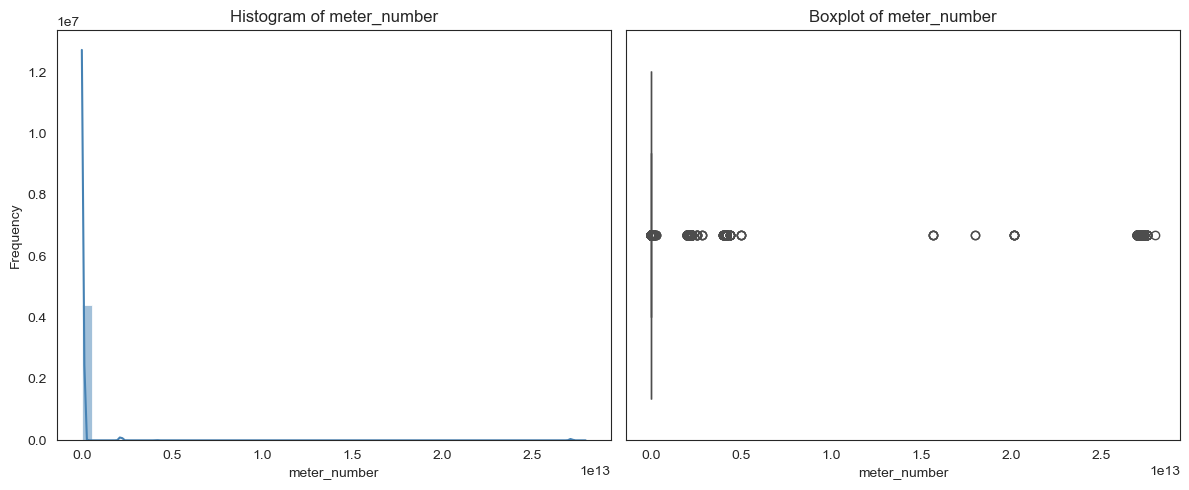

count    4.476738e+06
mean     1.230590e+11
std      1.657269e+12
min      0.000000e+00
25%      1.211080e+05
50%      4.945610e+05
75%      1.115161e+06
max      2.798115e+13
Name: meter_number, dtype: float64

Missing values: 0

Skewness of meter_number: 15.95


In [17]:
# Analyse the variable 'district'.
analyze_numerical_var(df, 'meter_number')

### Variable summary: `meter_number`.

#### Statistical overview.
| Metric        | Value              |
|---------------|--------------------|
| Count         | 4 476 738          |
| Mean          | 123 059 000 000    |
| Std Dev       | 1 657 269 000 000  |
| Min–Max       | 0 – 27 981 150 000 000 |
| Skewness      | 15.95 (extremely right skew) |
| Missing Values| 0                  |

---

#### Interpretation.

- **Identifier behavior:** Values resemble unique IDs rather than continuous measurements.
- **Extreme skew:** Skewness of 15.95 and wide range suggest non-numeric behavior.
- **Zero values:** May indicate placeholder or missing entries.
- **High cardinality:** Likely no repeated values, confirming uniqueness.

---

#### Immediate actions (Analyst-focused).

- **Reclassification:**  
  - Cast `meter_number` to string type.  
  - Exclude from modeling due to lack of behavioral signal.

- **Usage strategy:**  
  - Retain for grouping, traceability, or linking with external datasets.  
  - Use in audit trails or client-level aggregation if needed.

- **Data quality check:**  
  - Investigate zero values for potential data entry issues.

---

#### Future opportunities (Stakeholder-focused).

- **Operational traceability:**  
  - Use `meter_number` to track device-level anomalies or service history.

- **Infrastructure mapping:**  
  - Link with meter installation records or maintenance logs.

- **Compliance audits:**  
  - Identify recycled or duplicated meter numbers across regions.

---

#### Variable closure.

- The `meter_number` is confirmed as a non-modeling identifier.  
- Flagged for exclusion from predictive features.  
- Retained for traceability and operational linkage.

> This variable is structurally important but not behaviorally predictive.
---


### Univariate analysis: `meter_code`.


Analysis for: meter_code


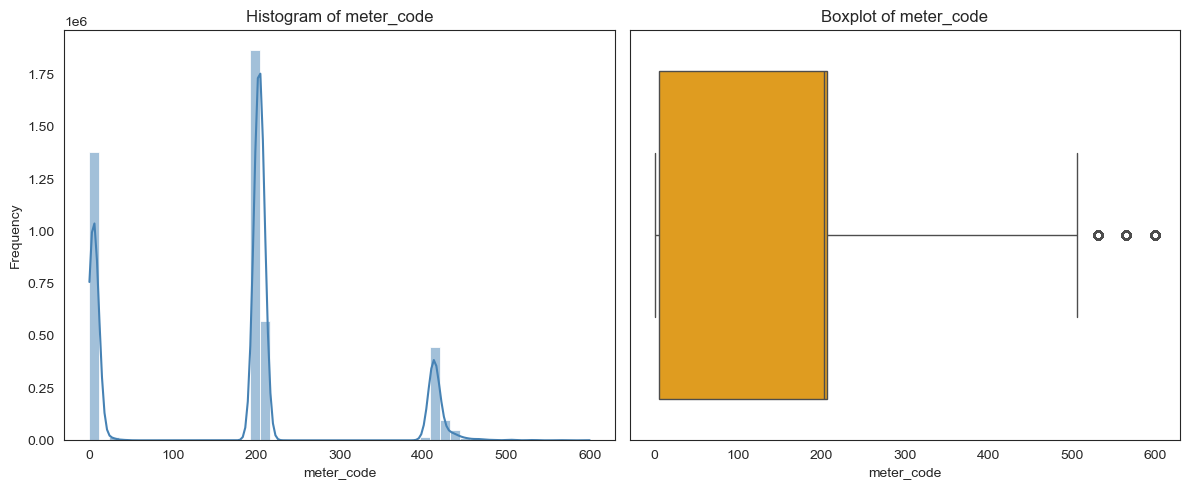

count    4.476738e+06
mean     1.724882e+02
std      1.338869e+02
min      0.000000e+00
25%      5.000000e+00
50%      2.030000e+02
75%      2.070000e+02
max      6.000000e+02
Name: meter_code, dtype: float64

Missing values: 0

Skewness of meter_code: 0.30


In [18]:
# Analyse the next variable: meter_code.
analyze_numerical_var(df, 'meter_code')

### Variable summary: `meter_code`.

#### Statistical overview.
| Metric        | Value        |
|---------------|--------------|
| Count         | 4 476 738    |
| Mean          | 172.49       |
| Std Dev       | 133.89       |
| Min–Max       | 0 – 600      |
| Skewness      | 0.30 (slightly right-skewed) |
| Missing Values| 0            |

#### Interpretation.

- **Encoding type:** Appears to be a numeric code representing meter types or configurations.
- **Distribution insight:**  
  - Slight right skew suggests a concentration of lower codes with a tail of higher values.  
  - Median (203) and upper quartile (207) indicate clustering around modern or standard meter types.

- **Zero values:**  
  - The `min = 0` may indicate missing, unclassified, or legacy meters.  
  - Requires validation—could be placeholder or error.

---

#### Immediate actions (Analyst-focused).

- **Categorical treatment:**  
  - Convert to categorical if codes represent discrete meter types.  
  - Consider binning or flagging legacy vs. modern meters.

- **Feature engineering:**  
  - Create binary flags: `is_legacy_meter`, `is_modern_meter`, `is_unclassified`.  
  - Explore interactions with `region`, `tariff_type`, and `reading_remark`.

- **Data quality check:**  
  - Investigate `meter_code = 0` for data integrity.  
  - Validate code ranges against known meter specifications.

---

#### Future opportunities (Stakeholder-focused).

- **Meter upgrade strategy:**  
  - Use distribution to identify areas with outdated or unclassified meters.  
  - Align with infrastructure modernization plans.

- **Fraud detection:**  
  - Cross-reference meter types with anomaly flags or consumption irregularities.

- **Operational planning:**  
  - Segment customers by meter type for targeted maintenance or policy rollout.

---

#### Variable closure.

- The `meter_code` is a clean, slightly skewed numeric feature with strong operational relevance.  
- Flagged for categorical conversion and feature engineering.  
- Zero values documented for audit and stakeholder review.

> This variable supports infrastructure profiling and fraud risk segmentation.
---


### Univariate analysis: `reading_remark`.



Analysis for: reading_remark


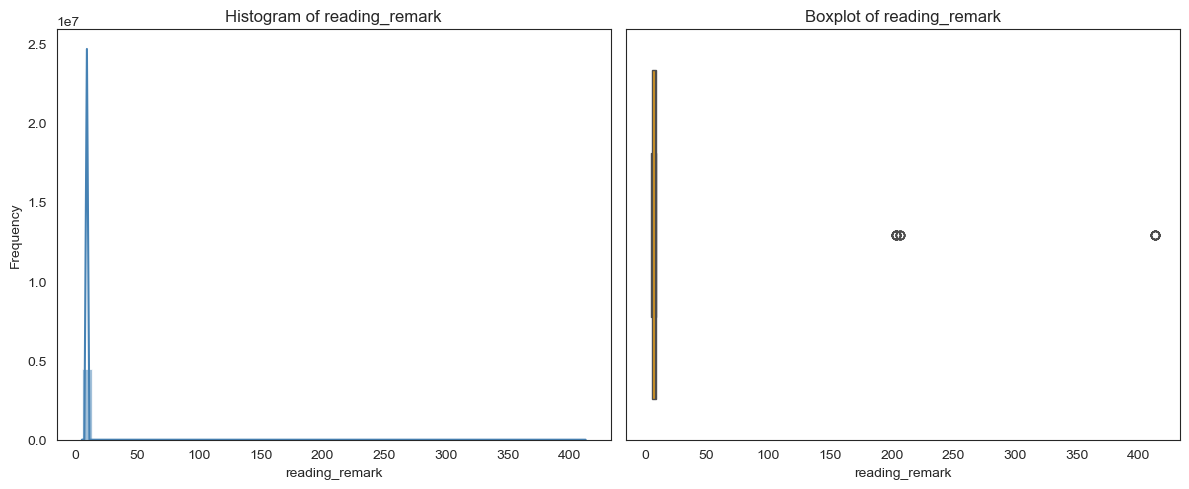

count    4.476738e+06
mean     7.321705e+00
std      1.571655e+00
min      5.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      4.130000e+02
Name: reading_remark, dtype: float64

Missing values: 0

Skewness of reading_remark: 55.42

reading_remark category counts:
   count    count
0      6  2230928
1      9  1416992
2      8   828123
3      7      661
4    203       15
5    413       12
6    207        6
7      5        1


In [19]:
# Analyse the next variable: reading_remark.
analyze_numerical_var(df, 'reading_remark')

### Variable summary: `reading_remark`.

#### Statistical overview.
| Metric        | Value        |
|---------------|--------------|
| Count         | 4 476 738    |
| Mean          | 7.32         |
| Std Dev       | 1.57         |
| Min–Max       | 5 – 413      |
| Skewness      | 55.42 (extremely right-skewed) |
| Missing Values| 0            |

#### Category distribution.
| Remark Code | Count     | % of Total |
|-------------|-----------|------------|
| 6           | 2 230 928 | ~50%       |
| 9           | 1 416 992 | ~32%       |
| 8           | 828 123   | ~18%       |
| Others (4 codes) | ~695 | <0.01%     |

---

#### Interpretation.

- **Dominant remarks:** Codes `6`, `9`, and `8` account for nearly 100% of the data.
- **Extreme skew:** Skewness of 55.42 suggests a long tail of rare or exceptional remarks.
- **Rare codes:** Values like `203`, `413`, and `207` may represent tampering, blocked meters, or technician flags.
- **Low cardinality:** Despite numeric encoding, this variable behaves categorically.

---

#### Immediate actions (Analyst-focused).

- **Reclassification:**  
  - Convert `reading_remark` to categorical.  
  - Apply one-hot encoding for dominant codes; group rare codes into `"Other"` or `"Exception"`.

- **Feature engineering:**  
  - Create binary flags for high-impact remarks (e.g., `"is_estimated"`, `"is_blocked"`).  
  - Explore interactions with `target`, `meter_code`, and `consumption_level`.

- **Data quality check:**  
  - Validate meaning of rare codes with domain experts.  
  - Ensure consistent mapping across time periods or technician teams.

---

#### Future opportunities (Stakeholder-focused).

- **Fraud detection:**  
  - Use `reading_remark` to flag suspicious or estimated readings.  
  - Prioritize remarks with known links to tampering or blocked access.

- **Operational audits:**  
  - Review rare remark codes for technician behavior or systemic issues.  
  - Align remark codes with service protocols and escalation procedures.

- **Customer communication:**  
  - Tailor messaging based on remark history (e.g., `"Estimated readings"` vs `"Access issues"`).

---

#### Variable closure.

- The `reading_remark` is a categorical feature with strong diagnostic and operational value.  
- Flagged for encoding and binary flag creation.  
- Rare codes documented for audit and stakeholder review.

> This variable supports fraud detection, technician behavior analysis, and operational triage.
---

### Univariate analysis: `meter_coefficient`.



Analysis for: meter_coefficient


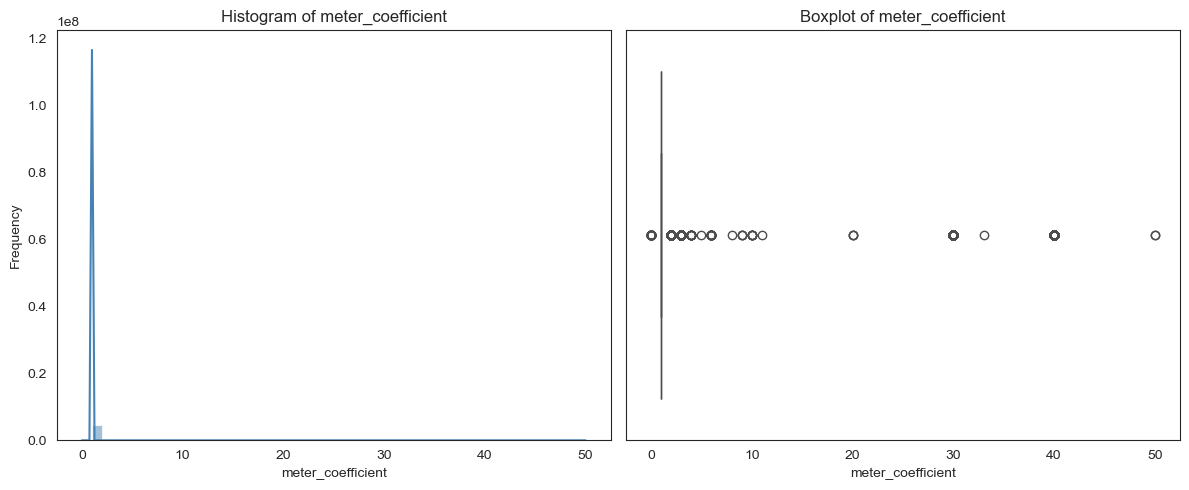

count    4.476738e+06
mean     1.003040e+00
std      3.083470e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.000000e+01
Name: meter_coefficient, dtype: float64

Missing values: 0

Skewness of meter_coefficient: 116.78

meter_coefficient category counts:
    count    count
0       1  4475091
1       2      886
2       3      321
3      40      197
4      30      137
5       0       46
6       6       30
7       4       12
8      10        6
9       9        3
10     20        3
11     50        2
12     33        1
13      5        1
14     11        1
15      8        1


In [20]:
# Analyse the next variable : meter_coefficient.
analyze_numerical_var(df, 'meter_coefficient')

### Variable summary: `meter_coefficient`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 1.003         |
| Std dev        | 0.308         |
| Min–max        | 0 – 50        |
| Skewness       | 116.78 (extremely right-skewed) |
| Missing values | 0             |

#### Category distribution.
| Coefficient | Count     | % of Total |
|-------------|-----------|------------|
| 1.0         | 4 475 091 | ~99.96%    |
| 2.0         | 886       | ~0.02%     |
| 3.0         | 321       | ~0.007%    |
| 40.0        | 197       | ~0.004%    |
| 30.0        | 137       | ~0.003%    |
| Others (10 values) | 106 | <0.003%   |

---

#### Interpretation.

- **Dominant value:** `1.0` is overwhelmingly dominant, suggesting standard meter configurations.
- **Extreme skew:** Skewness of 116.78 indicates a long tail of rare, high-ratio coefficients.
- **Rare values:** Coefficients like `30`, `40`, and `50` may reflect CT/PT meters or data anomalies.
- **Zero coefficients:** 46 entries with `0.0` may indicate data entry errors or inactive meters.

---

#### Immediate actions (Analyst-focused).

- **Reclassification:**  
  - Treat `meter_coefficient` as a continuous variable with categorical flags for rare values.  
  - Consider binning into `"Standard"`, `"High ratio"`, `"Suspicious"`.

- **Feature engineering:**  
  - Create binary flags for non-standard coefficients (e.g., `is_high_ratio`, `is_zero_coeff`).  
  - Apply log transformation to reduce skew and improve model stability.

- **Data quality check:**  
  - Investigate zero and extreme values with domain experts.  
  - Validate coefficient logic against meter types and installation records.

---

### Future opportunities (Stakeholder-focused).

- **Revenue assurance:**  
  - Flag high-ratio coefficients for audit and recalibration.  
  - Ensure billing accuracy for CT/PT installations.

- **Fraud detection:**  
  - Use coefficient anomalies as part of tampering or misconfiguration detection.  
  - Cross-reference with `reading_remark`, `meter_type`, and consumption patterns.

- **Operational diagnostics:**  
  - Review coefficient distribution across regions or technician teams.  
  - Align with metering standards and infrastructure protocols.

---

### Variable closure.

- The `meter_coefficient` is a continuous feature with categorical behavior at the tails.  
- Flagged for binning, binary flag creation, and log transformation.  
- Rare and extreme values documented for audit and stakeholder review.

> This variable supports consumption normalization, fraud detection, and operational diagnostics.
---

### Univariate analysis: `consumption_level_1`.



Analysis for: consumption_level_1


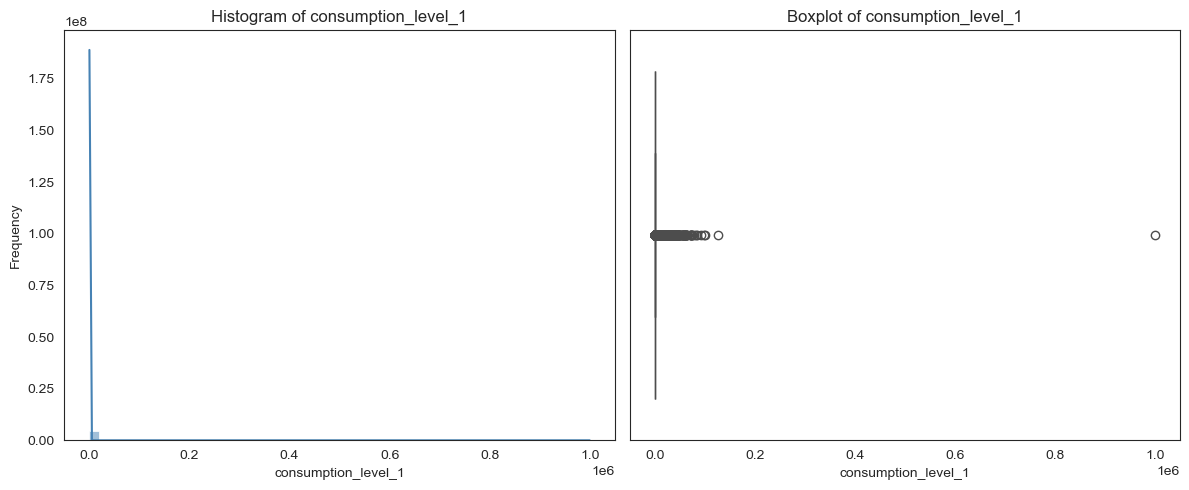

count    4.476738e+06
mean     4.109805e+02
std      7.573087e+02
min      0.000000e+00
25%      7.900000e+01
50%      2.740000e+02
75%      6.000000e+02
max      9.999100e+05
Name: consumption_level_1, dtype: float64

Missing values: 0

Skewness of consumption_level_1: 525.98


In [21]:
# Analyse the next variable: consumption_level_1.
analyze_numerical_var(df, 'consumption_level_1')

### Variable summary: `consumption_level_1`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 410.98        |
| Std dev        | 757.31        |
| Min–max        | 0 – 999,910   |
| Skewness       | 525.98 (extremely right-skewed) |
| Missing values | 0             |

---

#### Interpretation.

- **Central tendency:** Median of 274.0 suggests moderate consumption for most customers, despite a high mean driven by extreme values.
- **Extreme Skew:** Skewness of 525.98 indicates a heavy tail—likely due to industrial or anomalous readings.
- **Zero consumption:** Minimum of 0.0 may reflect inactive meters, blocked access, or estimation.
- **High outliers:** Max value near 1 million kWh suggests possible data entry errors or bulk metering scenarios.

---

#### Immediate actions (Analyst-focused).

- **Transformation:**  
  - Apply log transformation or capping to reduce skew and stabilize model inputs.  
  - Consider binning into `"Low"`, `"Medium"`, `"High"`, and `"Extreme"` consumption bands.

- **Feature engineering:**  
  - Create binary flags for zero consumption and extreme outliers.  
  - Cross-reference with `reading_remark`, `meter_type`, and `meter_coefficient`.

- **Data quality check:**  
  - Investigate top 0.01% of values for plausibility.  
  - Validate zero readings against technician notes and meter status.

---

#### Future opportunities (Stakeholder-focused).

- **Fraud detection:**  
  - Use zero or extreme values to flag potential tampering or blocked meters.  
  - Prioritize cases with inconsistent consumption patterns.

- **Tariff optimization:**  
  - Segment customers based on consumption bands for targeted pricing strategies.  
  - Align with infrastructure capacity and load balancing.

- **Customer engagement:**  
  - Tailor communication for low-usage vs high-usage customers.  
  - Highlight efficiency opportunities or billing anomalies.

---

#### Variable closure.

- The `consumption_level_1` is a continuous feature with high diagnostic and operational value.  
- Flagged for transformation, binning, and binary flag creation.  
- Outliers and zero values documented for audit and stakeholder review.

> This variable supports fraud detection, tariff design, and customer segmentation.
---

### Univariate analysis: `consumption_level_2`.




Analysis for: consumption_level_2


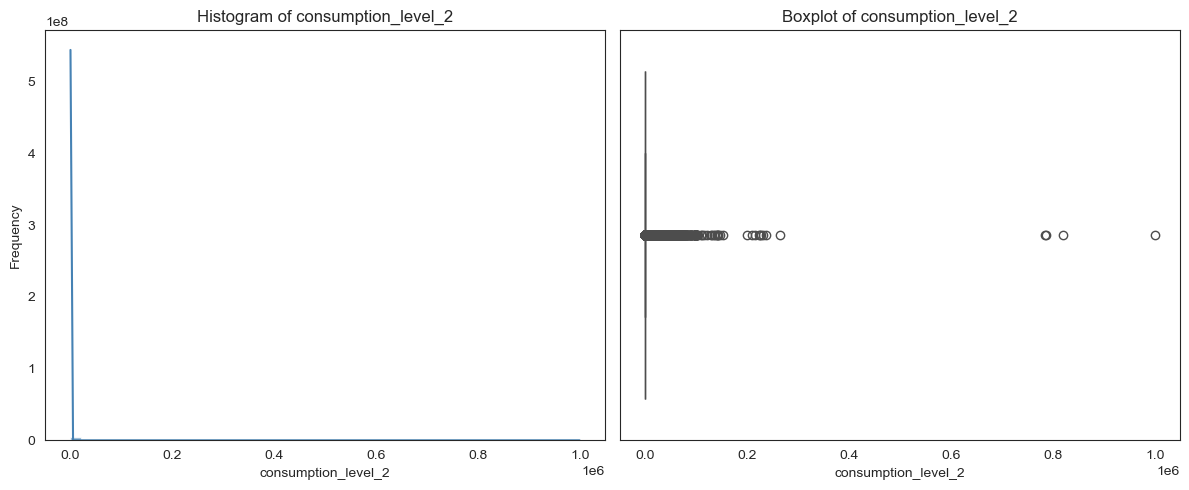

count    4.476738e+06
mean     1.093227e+02
std      1.220125e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.990730e+05
Name: consumption_level_2, dtype: float64

Missing values: 0

Skewness of consumption_level_2: 338.89


In [22]:
# Analyse the next variable: consumption_level_2.
analyze_numerical_var(df, 'consumption_level_2')

### Variable summary: `consumption_level_2`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 109.32        |
| Std dev        | 1 220.13      |
| Min–max        | 0 – 999,073   |
| Skewness       | 338.89 (extremely right-skewed) |
| Missing values | 0             |

---

#### Interpretation.

- **Central tendency:** Median and all quartiles are 0.0, indicating the majority of customers show no recorded secondary consumption.
- **Extreme skew:** Skewness of 338.89 reflects a heavy concentration at zero with a long tail of high outliers.
- **Zero consumption:** Dominance of zero values may suggest inactive meters, blocked registers, or estimation placeholders.
- **High outliers:** Max value near 1 million kWh could stem from reconciliation spikes, bulk metering, or data anomalies.

---

#### Immediate actions (Analyst-focused).

- **Transformation:**  
  - Apply log transformation or capped scaling to reduce skew.  
  - Consider binning into `"Zero"`, `"Low"`, `"Moderate"`, and `"Extreme"` bands.

- **Feature engineering:**  
  - Create binary flags for zero consumption and extreme outliers.  
  - Engineer `level_diff = level_1 - level_2` to detect tampering or blocked meters.

- **Data quality check:**  
  - Investigate top 0.01% of values for plausibility.  
  - Validate zero readings against `reading_remark`, `meter_code`, and `meter_coefficient`.

---

#### Future opportunities (Stakeholder-focused)

- **Fraud detection:**  
  - Use divergence between `level_1` and `level_2` to flag suspicious patterns.  
  - Prioritize cases with zero secondary readings but non-zero primary consumption.

- **Operational diagnostics:**  
  - Identify meters with persistent zero `level_2` for maintenance or audit.  
  - Support reconciliation workflows with delta features.

- **Customer engagement:**  
  - Highlight discrepancies in billing vs actual usage.  
  - Educate customers on meter functionality and reading accuracy.

---

### Variable closure.

- The `consumption_level_2` is a continuous feature with diagnostic value for reconciliation, fraud detection, and operational audits.  
- Flagged for transformation, binning, and delta feature creation.  
- Zero values and outliers documented for technical and stakeholder review.

> This variable supports fraud detection, reconciliation workflows, and meter diagnostics.
---

### Univariate analysis: `consumption_level_3`.



Analysis for: consumption_level_3


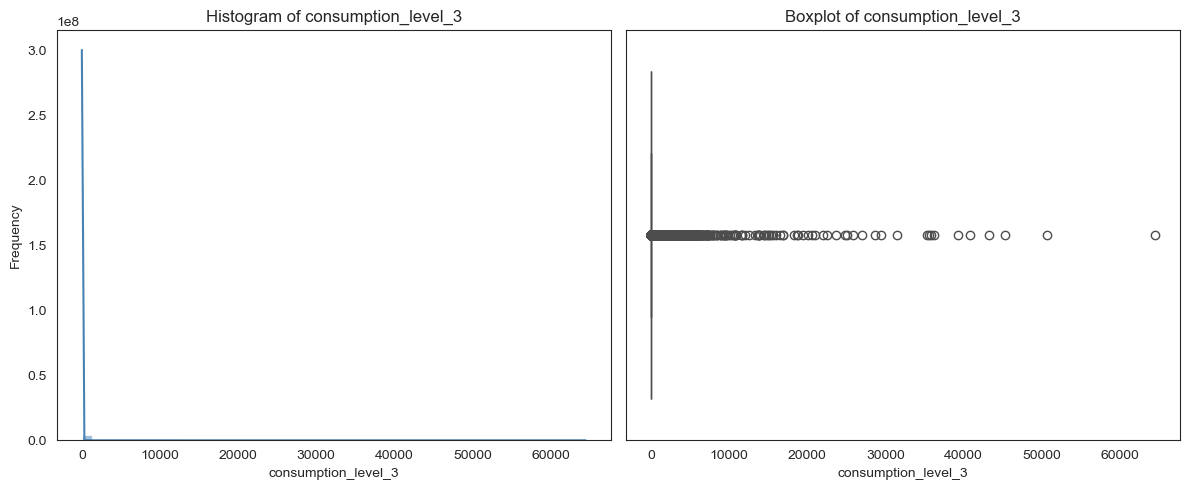

count    4.476738e+06
mean     2.030625e+01
std      1.574241e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.449200e+04
Name: consumption_level_3, dtype: float64

Missing values: 0

Skewness of consumption_level_3: 75.31


In [23]:
# Analyze the next variable: consumption_level_3.
analyze_numerical_var(df, 'consumption_level_3')    

### Variable summary: `consumption_level_3`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 20.31         |
| Std dev        | 157.42        |
| Min–max        | 0 – 64 492    |
| Skewness       | 75.31 (extremely right-skewed) |
| Missing values | 0             |

---

#### Interpretation.

- **Central tendency:** Median and all quartiles are 0.0, indicating the majority of customers show no recorded tertiary consumption.
- **Extreme skew:** Skewness of 75.31 reflects a heavy concentration at zero with a long tail of high outliers.
- **Zero consumption:** Dominance of zero values may suggest inactive registers, override placeholders, or estimation gaps.
- **High outliers:** Max value over 64 000 kWh could stem from reconciliation overrides, bulk metering, or technical anomalies.

---

#### Immediate actions (Analyst-focused).

- **Transformation:**  
  - Apply log transformation or capped scaling to reduce skew.  
  - Consider binning into `"Zero"`, `"Low"`, `"Moderate"`, and `"Extreme"` bands.

- **Feature engineering:**  
  - Create binary flags for zero consumption and extreme outliers.  
  - Engineer `level_diff = level_1 - level_3` or `level_3_gap = level_2 - level_3` to detect tampering or override behavior.

- **Data quality check:**  
  - Investigate top 0.01% of values for plausibility.  
  - Validate zero readings against `reading_remark`, `meter_code`, and `meter_coefficient`.

---

#### Future opportunities (Stakeholder-focused).

- **Fraud detection:**  
  - Use divergence between `level_1`, `level_2`, and `level_3` to flag suspicious patterns.  
  - Prioritize cases with zero tertiary readings but non-zero primary or secondary consumption.

- **Operational diagnostics:**  
  - Identify meters with persistent zero `level_3` for maintenance or audit.  
  - Support reconciliation workflows with multi-level delta features.

- **Customer engagement:**  
  - Highlight discrepancies in billing vs actual usage.  
  - Educate customers on meter functionality and reading accuracy.

---

#### Variable closure.

- The `consumption_level_3` is a continuous feature with diagnostic value for reconciliation, fraud detection, and operational audits.  
- Flagged for transformation, binning, and delta feature creation.  
- Zero values and outliers documented for technical and stakeholder review.

> This variable supports fraud detection, reconciliation workflows, and meter diagnostics.
---

###  Univariate analysis: `consumption_level_4`.



Analysis for: consumption_level_4


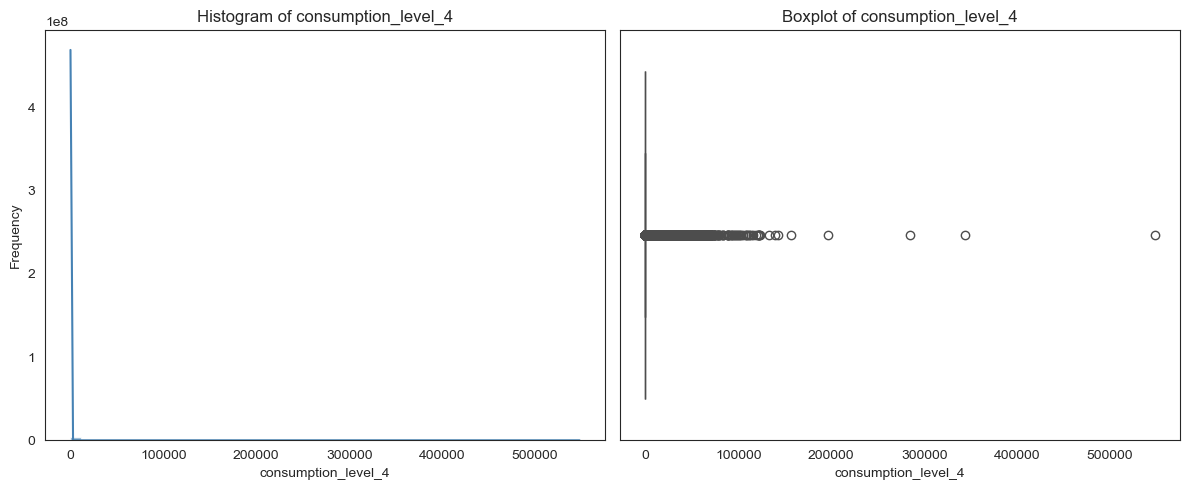

count    4.476738e+06
mean     5.292601e+01
std      8.754735e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.479460e+05
Name: consumption_level_4, dtype: float64

Missing values: 0

Skewness of consumption_level_4: 118.60


In [24]:
# Analyze the next variable: consumption_level_4.
analyze_numerical_var(df, 'consumption_level_4')    

### Variable summary: `consumption_level_4`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 52.93         |
| Std dev        | 875.47        |
| Min–max        | 0 – 547 946   |
| Skewness       | 118.60 (extremely right-skewed) |
| Missing values | 0             |

---

#### Interpretation.

- **Central tendency:** Median and all quartiles are 0.0, confirming that most customers have no recorded quaternary consumption.
- **Extreme skew:** Skewness of 118.60 suggests a heavy tail of high outliers, likely from override escalations or reconciliation artifacts.
- **Zero consumption:** Dominance of zero values may reflect inactive override channels, legacy register gaps, or estimation placeholders.
- **High outliers:** Max value over 500 000 kWh could indicate forensic adjustments, bulk metering anomalies, or post-audit corrections.

---

#### Immediate actions (Analyst-focused).

- **Transformation:**  
  - Apply log transformation or capped scaling to reduce skew.  
  - Bin into `"Zero"`, `"Low"`, `"Moderate"`, and `"Extreme"` categories.

- **Feature engineering:**  
  - Create binary flags for zero and extreme values.  
  - Engineer `level_4_gap = level_3 - level_4` to detect override escalation or reconciliation drift.

- **Data quality check:**  
  - Investigate top 0.01% of values for plausibility.  
  - Cross-reference with `reading_remark`, `meter_code`, and override flags.

---

#### Future opportunities (Stakeholder-focused).

- **Fraud detection:**  
  - Use divergence across all levels to flag suspicious consumption behavior.  
  - Prioritize cases with zero `level_4` but non-zero upstream readings.

- **Operational diagnostics:**  
  - Identify meters with persistent zero `level_4` for override logic review.  
  - Support forensic workflows with multi-level delta features.

- **Customer engagement:**  
  - Highlight discrepancies in billing vs override adjustments.  
  - Educate customers on reconciliation logic and post-event corrections.

---

#### Variable closure.

- The `consumption_level_4` is a continuous feature with niche diagnostic value in override logic, reconciliation escalation, and forensic audits.  
- Flagged for transformation, binning, and delta feature creation.  
- Zero values and outliers documented for technical and stakeholder review.

> This variable supports override diagnostics, reconciliation escalation, and forensic consumption analysis.
---

### Univariate analysis: `old_reading`.



Analysis for: old_reading


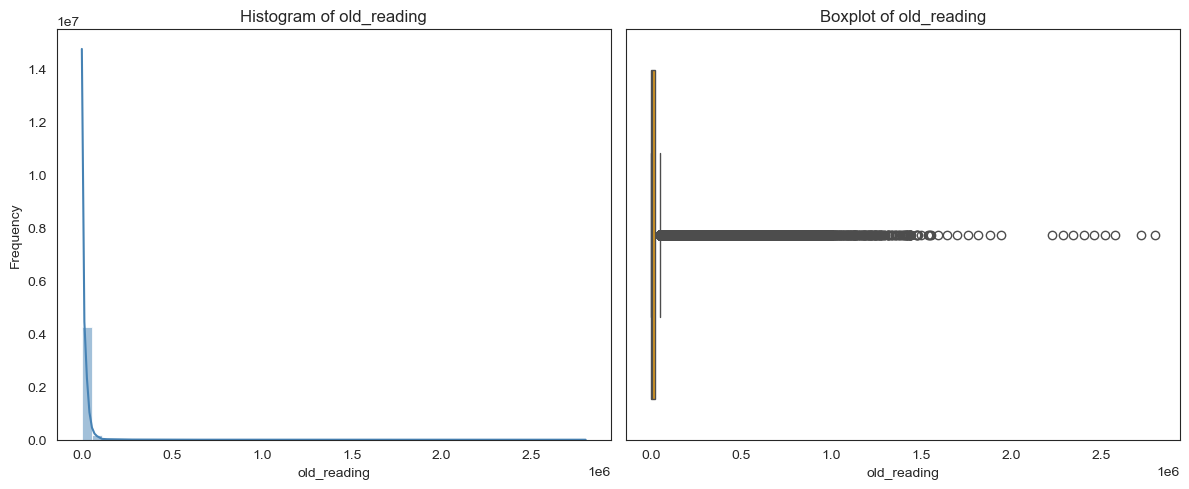

count    4.476738e+06
mean     1.776701e+04
std      4.036695e+04
min      0.000000e+00
25%      1.791000e+03
50%      7.690000e+03
75%      2.166000e+04
max      2.800280e+06
Name: old_reading, dtype: float64

Missing values: 0

Skewness of old_reading: 11.09


In [25]:
# Analyze the next variable: old_reading.
analyze_numerical_var(df, 'old_reading')    

### Variable summary: `old_reading`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 17 767 01     |
| Std dev        | 40 366.95     |
| Min–max        | 0 – 2 800 280 |
| Skewness       | 11.09 (strong right-skew) |
| Missing values | 0             |

---

#### Interpretation.

- **Central tendency:** Median of 7 690 and interquartile range from ~1 800 to ~21 660 suggest a wide spread of historical readings across customer segments.
- **Right skew:** Skewness of 11.09 indicates a long tail of high values, possibly from legacy meters, bulk accounts, or reconciliation spikes.
- **Zero readings:** Presence of zero minimum may reflect blocked meters, new installations, or estimation placeholders.
- **High outliers:** Max value over 2.8 million kWh could stem from legacy register rollovers, bulk metering, or data anomalies.

---

#### Immediate actions (Analyst-focused).

- **Transformation:**  
  - Apply log or capped scaling to reduce skew.  
  - Consider binning into `"Zero"`, `"Low"`, `"Moderate"`, and `"Extreme"` ranges.

- **Feature engineering:**  
  - Create binary flags for zero and extreme readings.  
  - Engineer `reading_diff = new_reading - old_reading` to detect tampering, blocked meters, or estimation logic.

- **Data quality check:**  
  - Investigate top 0.01% of values for plausibility.  
  - Validate zero readings against `reading_remark`, `meter_code`, and `meter_coefficient`.

---

#### Future opportunities (Stakeholder-focused).

- **Fraud detection:**  
  - Use stagnant or zero `old_reading` with non-zero `new_reading` to flag suspicious consumption.  
  - Prioritize cases with large `reading_diff` for audit.

- **Operational diagnostics:**  
  - Identify meters with persistent zero or stagnant readings for maintenance.  
  - Support reconciliation workflows with delta features.

- **Customer engagement:**  
  - Highlight discrepancies in historical readings vs billed usage.  
  - Educate customers on meter rollover, estimation, and reading accuracy.

---

#### Variable closure.

- The `old_reading` is a continuous feature with foundational value for consumption derivation, fraud detection, and operational audits.  
- Flagged for transformation, binning, and delta feature creation.  
- Zero values and outliers documented for technical and stakeholder review.

> This variable supports consumption derivation, fraud detection, and meter diagnostics.
---

### Univariate analysis: `new_reading`.



Analysis for: new_reading


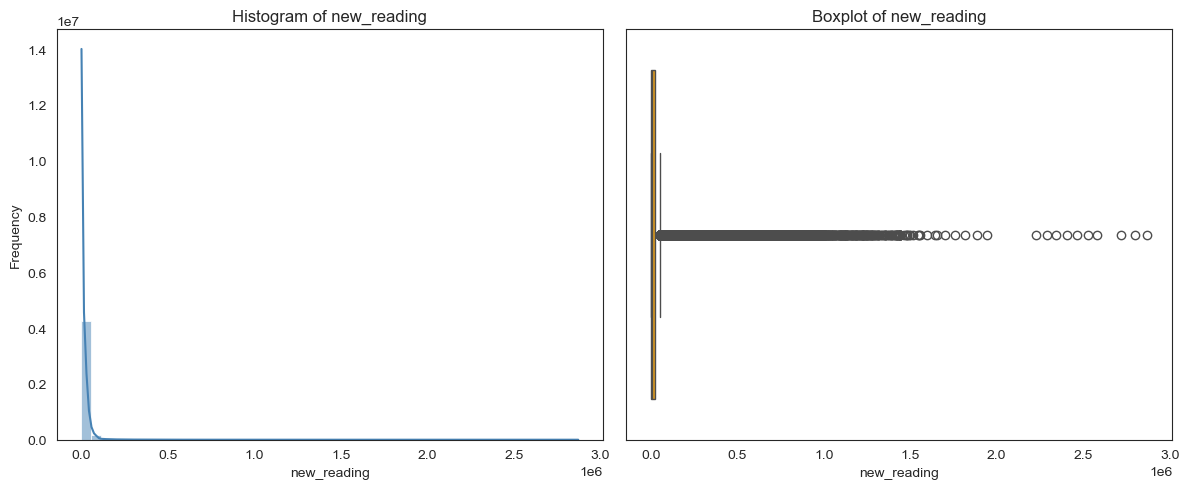

count    4.476738e+06
mean     1.834972e+04
std      4.095323e+04
min      0.000000e+00
25%      2.056000e+03
50%      8.192000e+03
75%      2.234300e+04
max      2.870972e+06
Name: new_reading, dtype: float64

Missing values: 0

Skewness of new_reading: 10.99


In [26]:
# Analyze the next variable: new_reading.
analyze_numerical_var(df, 'new_reading')    


### Variable summary: `new_reading`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 18 349.72     |
| Std dev        | 40 953.23     |
| Min–max        | 0 – 2 870 972 |
| Skewness       | 10.99 (strong right-skew) |
| Missing values | 0             |

---

#### Interpretation.

- **Central tendency:** Median of 8 192 and interquartile range from ~2 056 to ~22 343 suggests a wide spread of current readings across customer segments.
- **Right skew:** Skewness of 10.99 indicates a long tail of high values, consistent with legacy meters, bulk accounts, or reconciliation spikes.
- **Zero readings:** Minimum of 0.0 may reflect blocked meters, new installations, or estimation placeholders.
- **High outliers:** Max value over 2.8 million kWh could stem from legacy register rollovers, bulk metering, or data anomalies.

---

#### Immediate actions (Analyst-focused).

- **Transformation:**  
  - Apply log or capped scaling to reduce skew.  
  - Consider binning into `"Zero"`, `"Low"`, `"Moderate"`, and `"Extreme"` ranges.

- **Feature engineering:**  
  - Create binary flags for zero and extreme readings.  
  - Engineer `reading_diff = new_reading - old_reading` to detect tampering, blocked meters, or estimation logic.

- **Data quality check:**  
  - Investigate top 0.01% of values for plausibility.  
  - Validate zero readings against `reading_remark`, `meter_code`, and `meter_coefficient`.

---

#### Future opportunities (Stakeholder-focused).

- **Fraud detection:**  
  - Use stagnant or zero `new_reading` with non-zero `old_reading` to flag suspicious consumption.  
  - Prioritize cases with large `reading_diff` for audit.

- **Operational diagnostics:**  
  - Identify meters with persistent zero or stagnant readings for maintenance.  
  - Support reconciliation workflows with delta features.

- **Customer engagement:**  
  - Highlight discrepancies in current readings vs billed usage.  
  - Educate customers on meter rollover, estimation, and reading accuracy.

---

#### Variable closure.

- The `new_reading` is a continuous feature with foundational value for consumption derivation, fraud detection, and operational audits.  
- Flagged for transformation, binning, and delta feature creation.  
- Zero values and outliers documented for technical and stakeholder review.

> This variable supports consumption derivation, fraud detection, and meter diagnostics.


### Univariate analysis: `number_months`.



Analysis for: number_months


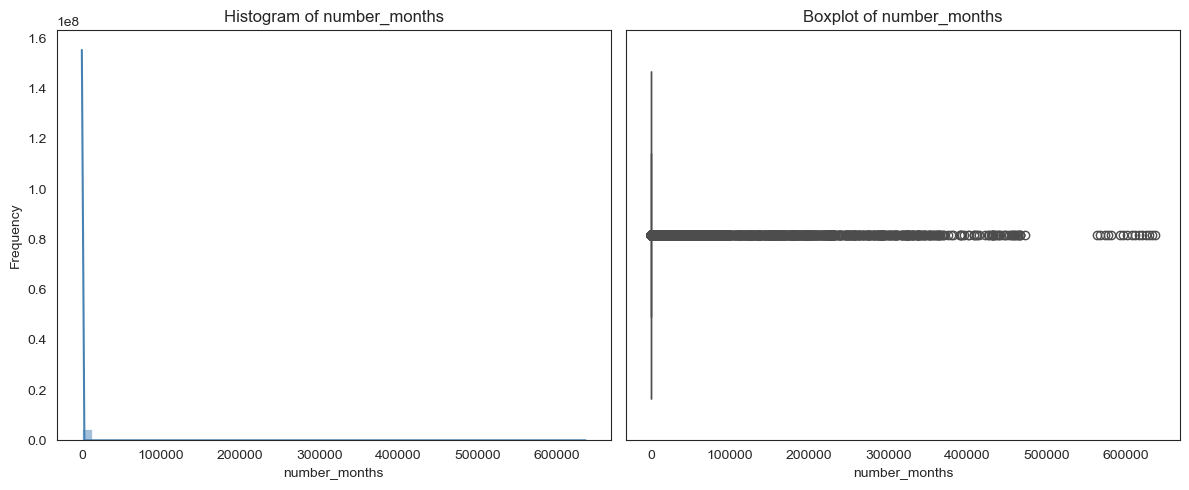

count    4.476738e+06
mean     4.483105e+01
std      3.128339e+03
min      0.000000e+00
25%      4.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      6.366240e+05
Name: number_months, dtype: float64

Missing values: 0

Skewness of number_months: 105.34


In [27]:
# Analyze the next variable: number_months.
analyze_numerical_var(df, 'number_months')   

### Variable summary: `number_months`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 44.83 months  |
| Std dev        | 3 128.34      |
| Min–max        | 0 – 636 624   |
| Skewness       | 105.34 (extreme right-skew) |
| Missing values | 0             |

---

#### Interpretation.

- **Central tendency:**  
  Median and IQR fixed at 4 months suggests a dominant billing cycle, likely quarterly or reconciled monthly with lag.
- **Extreme skew:**  
  Skewness of 105.34 indicates a long tail of dormant or legacy accounts with massive gaps between readings.
- **Zero intervals:**  
  Minimum of 0 months may reflect same-day readings, estimation overrides, or timestamp errors.
- **Outliers:**  
  Max value of 636 624 months (~53 000 years) is clearly anomalous—likely due to corrupted timestamps or legacy system artifacts.

---

#### Immediate actions (Analyst-focused).

- **Transformation:**  
  - Apply log or capped scaling to reduce skew.  
  - Cap extreme values at operational threshold (e.g., 24 or 36 months).

- **Feature engineering:**  
  - Create binary flags: `zero_interval`, `delayed_reading`, `legacy_gap`.  
  - Normalize consumption using `consumption_per_month = (new_reading - old_reading) / number_months`.

- **Data quality check:**  
  - Investigate top 0.01% of values for timestamp integrity.  
  - Validate zero intervals against `reading_remark`, `meter_code`, and `billing_status`.

---

#### Stakeholder insights.

- **Operational diagnostics:**  
  - Accounts with long gaps may indicate skipped visits, blocked meters, or reconciliation delays.  
  - Prioritize for field audits or system timestamp reviews.

- **Fraud detection:**  
  - Long dormant periods followed by high readings may signal tampering or estimation overrides.  
  - Use in conjunction with `reading_diff` and `meter_coefficient`.

- **Customer engagement:**  
  - Educate on billing intervals and meter access issues.  
  - Flag dormant accounts for reactivation or closure.

---

#### Variable Closure.

- The `number_months` is a temporal feature with high diagnostic value.  
- Requires transformation and flagging to mitigate skew and support consumption normalization.  
- Outliers and zero values flagged for technical and stakeholder review.

> This variable supports fraud detection, operational planning, and timestamp integrity checks.


### Univariate analysis: `district`.



Analysis for: district


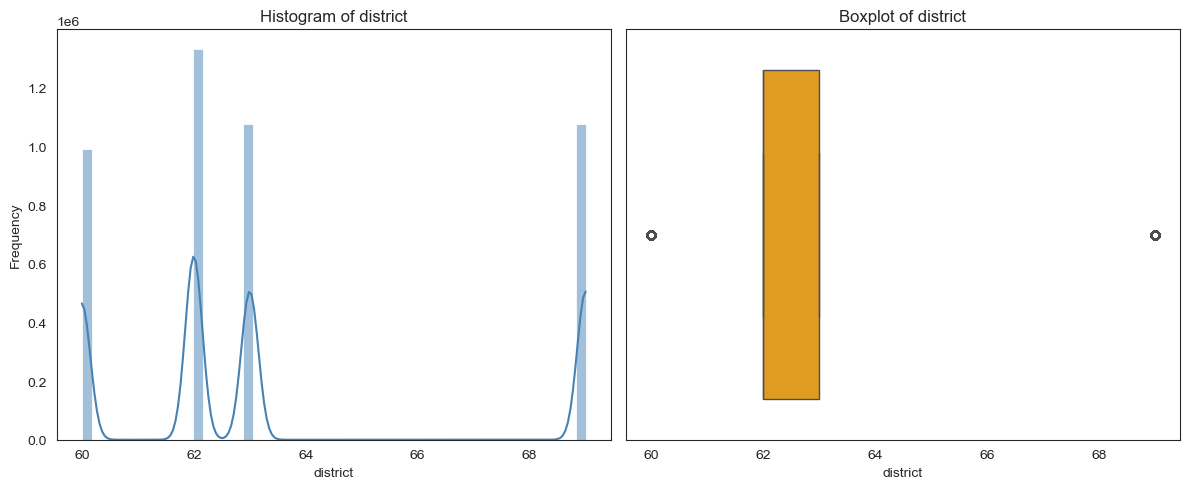

count    4.476738e+06
mean     6.348247e+01
std      3.273404e+00
min      6.000000e+01
25%      6.200000e+01
50%      6.200000e+01
75%      6.300000e+01
max      6.900000e+01
Name: district, dtype: float64

Missing values: 0

Skewness of district: 0.86

district category counts:
   count    count
0     62  1332062
1     63  1077832
2     69  1076942
3     60   989902


In [28]:
# analyze the next variable: district
analyze_numerical_var(df, 'district')   


### Variable summary: `district`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 63.48         |
| Std Dev        | 3.27          |
| Min–Max        | 60 – 69       |
| Skewness       | 0.86 (mild right-skew) |
| Missing Values | 0             |

---

#### Category distribution.

| District code | Count     | % of Total |
|---------------|-----------|------------|
| 62            | 1 332 062 | 29.75%     |
| 63            | 1 077 832 | 24.07%     |
| 69            | 1 076 942 | 24.06%     |
| 60            |   989 902 | 22.12%     |

> These four districts account for 100% of the dataset, suggesting a closed categorical system with no missing or undefined codes.

---

#### Interpretation.

- **Balanced spread:**  
  Distribution is relatively even across districts, with no single district dominating excessively.

- **Mild skew:**  
  Skewness of 0.86 suggests a slight concentration toward higher district codes (e.g., 69), but not extreme.

- **Categorical sntegrity:**  
  All values fall within a defined range (60–69), indicating clean encoding and no outliers or nulls.

---

#### Immediate actions (Analyst-focused).

- **Encoding:**  
  - Convert to categorical type for modeling and grouping.  
  - One-hot encode or use frequency encoding for supervised models.

- **Feature engineering:**  
  - Create flags for `"high_volume_district"` or `"low_volume_district"` based on thresholds.  
  - Aggregate metrics (e.g., average consumption, fraud rate) by district for spatial diagnostics.

- **Data quality check:**  
  - Confirm district codes align with municipal boundaries or operational zones.  
  - Validate against external GIS or service delivery maps.

---

#### Stakeholder insights.

- **Operational planning:**  
  - Use district-level metrics to allocate resources, plan audits, and optimize meter reading routes.

- **Equity & service delivery:**  
  - Compare consumption, billing accuracy, and fraud rates across districts to identify underserved areas.

- **Reporting & dashboards:**  
  - District segmentation supports executive summaries, compliance reports, and spatial performance tracking.

---

#### Variable closure.

- The `district` is a clean categorical feature with strong spatial relevance.  
- Supports segmentation, diagnostics, and stakeholder narratives.  
- Ready for encoding and aggregation in downstream workflows.

> This variable enables spatial analysis, operational planning, and equity assessments across service regions.


### Univariate analysis: `client_catg`.



Analysis for: client_catg


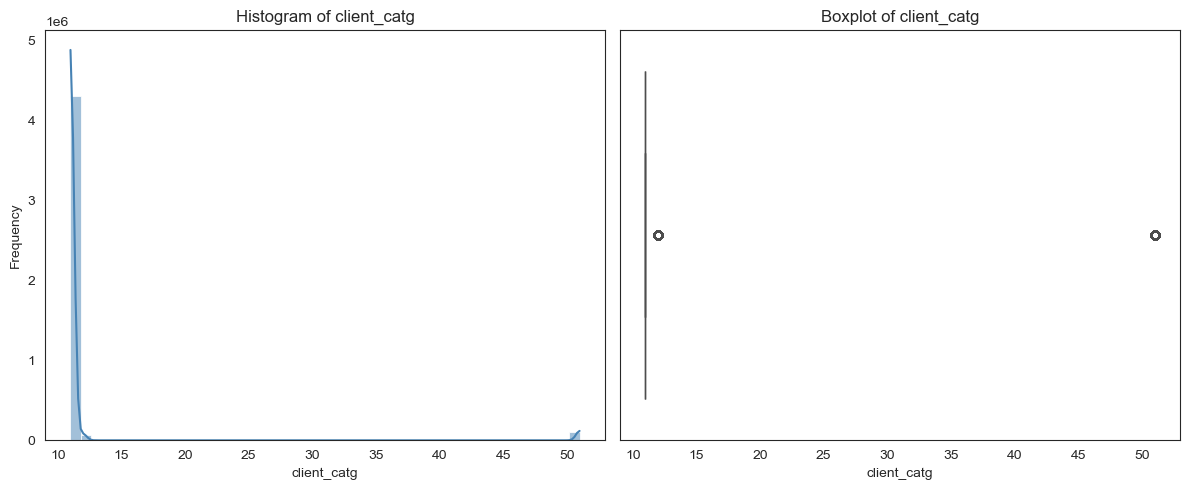

count    4.476738e+06
mean     1.194379e+01
std      6.022374e+00
min      1.100000e+01
25%      1.100000e+01
50%      1.100000e+01
75%      1.100000e+01
max      5.100000e+01
Name: client_catg, dtype: float64

Missing values: 0

Skewness of client_catg: 6.33

client_catg category counts:
   count    count
0     11  4304880
1     51   103929
2     12    67929


In [29]:
# Analyze the next variable: client_catg.
analyze_numerical_var(df, 'client_catg')

### Variable summary: `client_catg`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 11.94         |
| Std Dev        | 6.02          |
| Min–Max        | 11 – 51       |
| Skewness       | 6.33 (high right-skew) |
| Missing Values | 0             |

---

#### Category distribution.

| Client Category | Count     | % of Total |
|-----------------|-----------|------------|
| 11              | 4 304 880 | 96.15%     |
| 51              |   103 929 | 2.32%      |
| 12              |    67 929 | 1.52%      |

> Category 11 overwhelmingly dominates the dataset, suggesting a default or primary client type. Categories 51 and 12 are rare and may represent specialized or legacy accounts.

---

#### Interpretation.

- **Extreme skew:**  
  Skewness of 6.33 indicates a strong concentration in category 11, with minimal representation from other types.

- **Categorical compression:**  
  Despite being numerically encoded, the feature behaves as a low-cardinality categorical variable with only three active values.

- **Operational implications:**  
  Rare categories may require tailored billing logic, fraud detection thresholds, or service protocols.

---

#### Immediate actions (Analyst-focused).

- **Encoding:**  
  - Convert to categorical type for modeling.  
  - Consider binary flags for `"dominant_client"`, `"bulk_client"`, and `"legacy_client"`.

- **Feature engineering:**  
  - Stratify consumption, fraud risk, and billing anomalies by client category.  
  - Aggregate metrics (e.g., average usage, tampering rate) per category.

- **Data quality check:**  
  - Validate category definitions against tariff codes and service agreements.  
  - Investigate whether category 12 or 51 reflects outdated or transitional classifications.

---

#### Stakeholder insights.

- **Tariff optimization:**  
  - Align client categories with appropriate tariff structures and billing rules.

- **Risk profiling:**  
  - Use category segmentation to identify high-risk or high-value clients for audits and engagement.

- **Reporting & dashboards:**  
  - Include client category breakdowns in executive summaries and operational dashboards.

---

#### Variable closure.

- The `client_catg` is a clean, low-cardinality categorical feature with strong billing and operational relevance.  
- Supports segmentation, diagnostics, and stakeholder narratives.  
- Ready for encoding and stratified analysis in downstream workflows.

> This variable enables client profiling, tariff alignment, and targeted operational strategies.
---

### Univariate analysis: `region`.



Analysis for: region


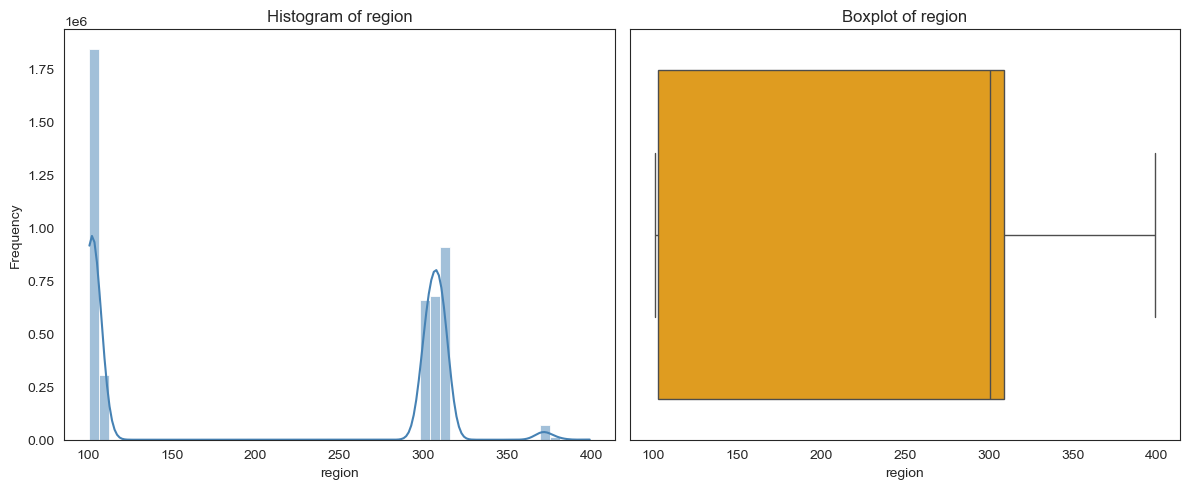

count    4.476738e+06
mean     2.103584e+02
std      1.035828e+02
min      1.010000e+02
25%      1.030000e+02
50%      3.010000e+02
75%      3.090000e+02
max      3.990000e+02
Name: region, dtype: float64

Missing values: 0

Skewness of region: -0.05

region category counts:
    count    count
0     101  1069262
1     311   509808
2     104   400665
3     301   316403
4     107   303450
5     103   294480
6     303   197946
7     306   195225
8     310   165366
9     312   156195
10    304   146515
11    302   143970
12    309   128819
13    305    94276
14    307    85531
15    313    76924
16    105    53131
17    371    53021
18    308    28699
19    106    24212
20    372    17013
21    379    13255
22    399     1566
23    206     1004
24    199        2


In [30]:
# Analyze the next variable: region.
analyze_numerical_var(df, 'region') 

### Variable summary: `region`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 210.36        |
| Std Dev        | 103.58        |
| Min–Max        | 101 – 399     |
| Skewness       | -0.05 (near-symmetric) |
| Missing Values | 0             |

---

#### Category distribution.

| Region code | Count     | % of Total |
|-------------|-----------|------------|
| 101         | 1 069 262 | 23.89%     |
| 311         |   509 808 | 11.39%     |
| 104         |   400 665 | 8.95%      |
| 301         |   316 403 | 7.07%      |
| 107         |   303 450 | 6.78%      |
| 103         |   294 480 | 6.58%      |
| 303         |   197 946 | 4.42%      |
| 306         |   195 225 | 4.36%      |
| 310         |   165 366 | 3.69%      |
| 312         |   156 195 | 3.49%      |
| ...         |     ...   | ...        |
| 399         |     1 566 | <0.1%      |
| 206         |     1 004 | <0.1%      |
| 199         |         2 | <0.01%     |

> Region 101 is the dominant zone, accounting for nearly a quarter of all records. Several regions (e.g., 199, 206, 399) are extremely rare and may require validation or exclusion depending on context.

---

#### Interpretation.

- **Near-symmetric spread:**  
  Skewness of -0.05 suggests a balanced distribution across regions, with no extreme concentration or tail.

- **High cardinality:**  
  The feature contains 25 distinct region codes, indicating a moderately granular spatial segmentation.

- **Operational implications:**  
  Rare regions may reflect legacy codes, transitional zones, or data entry anomalies. Dominant regions should be prioritized for diagnostics and resource planning.

---

#### Immediate actions (Analyst-focused).

- **Encoding:**  
  - Convert to categorical type for modeling.  
  - Consider frequency encoding or grouping rare regions under `"other_region"`.

- **Feature engineering:**  
  - Create flags for `"dominant_region"`, `"underrepresented_region"`, or `"legacy_region"`.  
  - Aggregate metrics (e.g., fraud rate, average usage) by region for spatial diagnostics.

- **Data quality check:**  
  - Validate region codes against GIS boundaries or operational maps.  
  - Investigate outlier codes (e.g., 199, 206, 399) for relevance and consistency.

---

#### Stakeholder insights.

- **Spatial planning:**  
  - Use region-level metrics to guide audits, meter deployments, and service delivery strategies.

- **Equity & performance:**  
  - Compare billing accuracy, consumption, and fraud rates across regions to identify disparities.

- **Reporting & dashboards:**  
  - Regional segmentation supports executive summaries, compliance reports, and spatial performance tracking.

---

#### Variable closure.

- The `region` is a moderately granular categorical feature with strong spatial relevance.  
- Supports segmentation, diagnostics, and stakeholder narratives.  
- Ready for encoding and aggregation in downstream workflows.

> This variable enables spatial analysis, operational planning, and equity assessments across service zones.


### Univariate analysis: `target`.



Analysis for: target


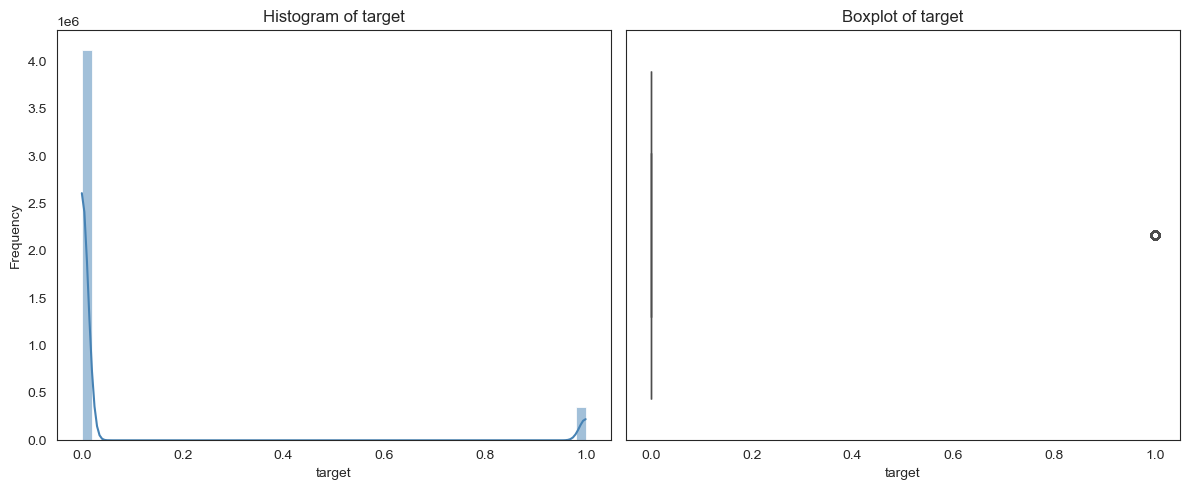

count    4.476738e+06
mean     7.887641e-02
std      2.695458e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: target, dtype: float64

Missing values: 0

Skewness of target: 3.12

target category counts:
   count    count
0    0.0  4123629
1    1.0   353109


In [31]:
# Analyze the next variable: target.    
analyze_numerical_var(df, 'target')

### Variable summary: `target`.

#### Statistical overview.
| Metric         | Value         |
|----------------|---------------|
| Count          | 4 476 738     |
| Mean           | 0.0789        |
| Std Dev        | 0.2695        |
| Min–Max        | 0 – 1         |
| Skewness       | 3.12 (high right-skew) |
| Missing Values | 0             |

---

#### Category distribution.

| Target value | Count     | % of Total |
|--------------|-----------|------------|
| 0.0          | 4 123 629 | 92.11%     |
| 1.0          |   353 109 | 7.89%      |

> The dataset is highly imbalanced, with only 7.89% of records flagged as positive cases. This suggests the need for resampling or weighted modeling strategies.

---

#### Interpretation.

- **Binary classification:**  
  `target` is a binary feature indicating the presence (1.0) or absence (0.0) of a condition—likely fraud, anomaly, or operational risk.

- **Severe class imbalance:**  
  The minority class (1.0) represents fewer than 1 in 13 records, which may challenge model sensitivity and generalization.

- **Operational implications:**  
  Positive cases likely represent high-risk or high-priority accounts requiring intervention, audit, or further investigation.

---

#### Immediate actions (Analyst-focused).

- **Modeling strategy:**  
  - Apply resampling techniques (e.g., SMOTE, undersampling) to balance training data.  
  - Use precision-recall metrics and cost-sensitive evaluation to assess model performance.

- **Feature engineering:**  
  - Engineer supporting features that enhance signal for the minority class (e.g., flags from `reading_remark`, `meter_catg`, `client_catg`).  
  - Create derived metrics (e.g., anomaly score, fraud likelihood) to support interpretability.

- **Data quality check:**  
  - Confirm labeling logic and consistency across time periods and operational zones.  
  - Validate that positive cases reflect true anomalies or confirmed events.

---

#### Stakeholder insights.

- **Risk management:**  
  - Use model outputs to prioritize audits, interventions, and resource allocation.

- **Compliance & reporting:**  
  - Track detection rates, false positives, and operational outcomes for governance and transparency.

- **Dashboard integration:**  
  - Include target breakdowns and model performance metrics in executive dashboards and operational reports.

---

#### Variable closure.

- The `target` is a binary outcome feature with high operational relevance and severe class imbalance.  
- Supports supervised modeling, risk stratification, and stakeholder decision-making.  
- Requires careful handling in training workflows and performance evaluation.

> This variable enables predictive analytics, fraud detection, and operational prioritization across the dataset.


### Summary of 16 numerical variables.
---
This summary consolidates the 16 variables initially treated as numerical, incorporating insights from Leg 1 and updated profiling. Variables are grouped by semantic type and modeling treatment.

#### Continuous numerical variables.

| Variable               | Description                          | Notes                                      |
|------------------------|--------------------------------------|--------------------------------------------|
| `meter_coefficient`    | Scaling factor for meter readings    | Continuous; used in consumption adjustment |
| `consumption_level_1`  | Primary consumption metric           | Continuous; skewed                         |
| `consumption_level_2`  | Secondary consumption metric         | Continuous; highly skewed                  |
| `consumption_level_3`  | Tertiary consumption metric          | Continuous; highly skewed                  |
| `consumption_level_4`  | Quaternary consumption metric        | Continuous; highly skewed                  |
| `old_reading`          | Previous meter reading               | Continuous; used for delta calculation     |
| `new_reading`          | Current meter reading                | Continuous; used for delta calculation     |
| `number_months`        | Months between readings              | Continuous; normalization candidate        |

#### Numerically encoded categorical variables.

| Variable         | Description                          | Reason for categorical treatment           |
|------------------|--------------------------------------|--------------------------------------------|
| `tariff_type`    | Tariff classification                | Encoded; domain-specific categories        |
| `meter_number`   | Meter identifier                     | Unique ID; categorical                     |
| `meter_code`     | Meter configuration code             | Encoded; categorical                       |
| `reading_remark` | Reading status or remark             | Encoded; categorical                       |
| `district`       | Operational district                 | Low cardinality; categorical               |
| `client_catg`    | Customer classification              | Low cardinality; categorical               |
| `region`         | Geographic zone                      | Spatial segmentation; categorical          |

#### Target variable.

| Variable   | Description               | Treatment |
|------------|---------------------------|-----------|
| `target`   | Binary fraud/anomaly flag | Binary classification target |

---

#### Migration summary.

- The **8 variables** remain in the continuous numerical set.
- The **7 variables** migrate into the categorical set due to semantic meaning and encoding.
- The **1 variable** (`target`) is retained as the binary classification target.

> This migration ensures semantic clarity and prepares the dataset for appropriate encoding and modeling strategies.


## __Tec3.2__: Migrate numeric variables to categorical format. and analyse
---
With the completion of univariate profiling for all 16 numerically defined variables, we now shift focus to the categorical dimension of the dataset.

Several variables originally treated as numerical have revealed strong categorical behavior—either through low cardinality, encoded semantics, or domain-specific structure. To ensure analytical integrity and modeling alignment, these variables will be migrated into the categorical feature set.

This next section introduces both the original categorical variables and those reclassified from numerical encoding, setting the stage for structured profiling and stakeholder interpretation.


### Overview of categorical variables.

This section outlines all variables treated as categorical, including those explicitly defined as such in the raw dataset and those reclassified from numerical encoding based on semantic meaning, cardinality, or domain-specific logic.

#### Original categorical variables.

These variables were explicitly defined as categorical in the raw dataset:

| Variable         | Description                          |
|------------------|--------------------------------------|
| `client_id`      | Unique customer identifier           |
| `invoice_date`   | Date of invoice issuance             |
| `meter_status`   | Status of the meter                  |
| `meter_type`     | Type of meter installed              |
| `creation_date`  | Date of account creation             |

> These variables are inherently categorical and require no migration.

#### Migrated from numerical encoding.

These variables were originally treated as numerical but are now reclassified as categorical due to their semantic meaning, low cardinality, or domain-specific encoding:

| Variable         | Description                          | Reason for migration                     |
|------------------|--------------------------------------|------------------------------------------|
| `tariff_type`    | Tariff classification                | Encoded; domain-specific categories      |
| `meter_number`   | Meter identifier                     | Unique ID; categorical                   |
| `meter_code`     | Meter configuration code             | Encoded; categorical                     |
| `reading_remark` | Reading status or remark             | Encoded; categorical                     |
| `district`       | Operational district                 | Low cardinality; categorical             |
| `client_catg`    | Customer classification              | Low cardinality; categorical             |
| `region`         | Geographic zone                      | Spatial segmentation; categorical        |

---

#### Summary.

- The **5 original categorical variables**.
- The **7 migrated from numerical encoding**.
- **Total: Twelve (12) categorical variables** to be profiled in the next section.

> This classification ensures semantic clarity and prepares the dataset for appropriate encoding, visualization, and modeling strategies.


## __Tec3.3__: Profile categorical variables: original and migrated.


In [32]:
# Function to analyze categorical variables - original and migrated.

def analyze_categorical_var(df, var, top_n=50, advanced=False):
    print(f"\nAnalysis for: {var}")
    
    # Handle datetime variables.
    if pd.api.types.is_datetime64_any_dtype(df[var]):               # Check if the variable is datetime
        df[var] = pd.to_datetime(df[var], errors='coerce')
        df['year_month'] = df[var].dt.to_period('M').astype(str)
        plot_var = 'year_month'
    else:
        plot_var = var

    # Limit to top N categories.
    top_categories = df[plot_var].value_counts().nlargest(top_n).index
    filtered_df = df[df[plot_var].isin(top_categories)]

    # Distribution plot using countplot (bar plot).
    plt.figure(figsize=(10, 5))
    sns.countplot(data=filtered_df, x=plot_var, hue=var, palette='viridis', legend=False)
    plt.title(f'Bar plot of top {top_n} categories in {var}.')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)  
    plt.tight_layout()
    plt.show()

    # Frequency table.
    print(f"\nFrequency table for '{var}:")
    print(df[var].value_counts().reset_index().rename(columns={'index': var, var: 'count'}))

    # Cardinality and missing values.
    print(f"\nUnique categories for '{var}' {df[var].nunique()}")
    print(f"Missing values for '{var}: {df[var].isnull().sum()}")

    # Optional advanced visualization.
    if advanced and df[var].nunique() <= 10:
        plt.figure(figsize=(8, 4))
        sns.violinplot(data=df, x=var, y=df.select_dtypes(include='number').columns[0], palette='coolwarm')
        plt.title(f'Violin plot of {var} vs numeric feature.')
        plt.grid(False)
        plt.tight_layout()
        plt.show()


In [33]:
# Print a list of categorical variables.
origninal_catgl_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'Original categorical variables: {origninal_catgl_vars}')


Original categorical variables: ['client_id', 'invoice_date', 'meter_status', 'meter_type', 'creation_date']


### Univariate analysis: `client_id`.



Analysis for: client_id


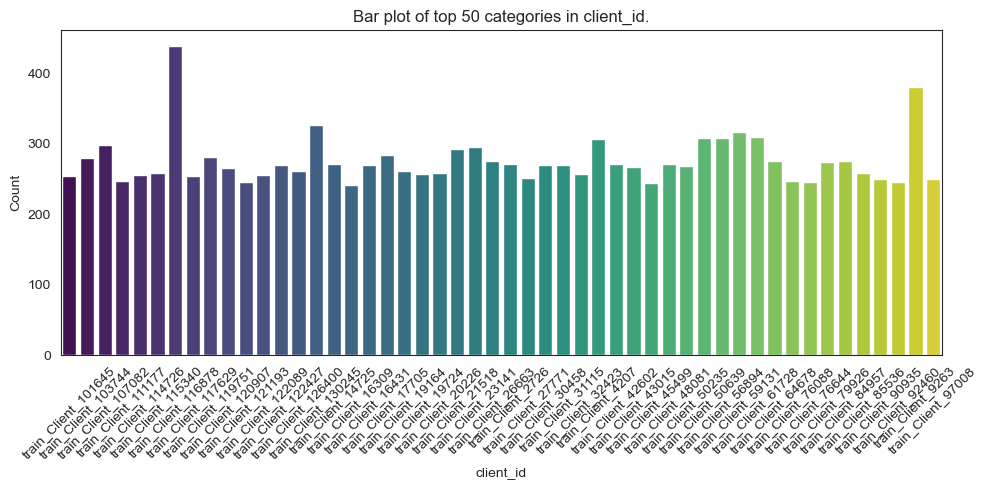


Frequency table for 'client_id:
                      count  count
0       train_Client_116878    439
1         train_Client_9263    380
2       train_Client_130245    327
3        train_Client_59131    317
4        train_Client_61728    310
...                     ...    ...
135488   train_Client_69456      1
135489   train_Client_69449      1
135490  train_Client_100018      1
135491   train_Client_30540      1
135492   train_Client_30538      1

[135493 rows x 2 columns]

Unique categories for 'client_id' 135493
Missing values for 'client_id: 0


In [34]:
# Analyse the original categorical variable: client_id.
analyze_categorical_var(df, 'client_id' )
# Excluded from analysis because of high cardinality.

### Variable summary: `client_id`.

#### Statistical overview.
| Metric             | Value       |
|--------------------|-------------|
| Count              | 4 476 738
| Unique clients     | 135 493     |
| Most frequent ID   | train_Client_116878 (439 records) |
| Missing values     | 0           |
| Cardinality        | Very high   |

---

#### Frequency distribution.

| Client ID              | Count | % of Total |
|------------------------|-------|------------|
| train_Client_116878    | 439   | 0.0098%    |
| train_Client_9263      | 380   | 0.0085%    |
| train_Client_130245    | 327   | 0.0073%    |
| train_Client_59131     | 317   | 0.0071%    |
| train_Client_61728     | 310   | 0.0069%    |
| ...                    | ...   | ...        |
| IDs with count = 1     | ~135 000 | ~99.6% |

> The vast majority of client IDs appear only once, confirming that this is a unique identifier field with no grouping or behavioral signal.

---

#### Interpretation.

- **High cardinality identifier:**  
  The `client_id` is a unique key for each record and should not be used as a feature in modeling.
- **Traceability role:**  
  Essential for linking records, aggregating client-level metrics, and audit trails.
- **No analytical value:**  
  Not suitable for encoding, clustering, or predictive modeling.

---

#### Immediate actions (Analyst-focused).

- **Feature exclusion:**  
  - Drop from modeling pipelines.  
  - Retain in raw datasets for traceability and joins.

- **Aggregation use:**  
  - Use to group consumption, fraud flags, or billing anomalies per client.  
  - Enable client-level summaries and dashboards.

- **Data integrity check:**  
  - Confirm uniqueness and consistency across datasets.  
  - Validate against external systems if applicable.

---

#### Stakeholder insights.

- **Client-Level reporting:**  
  - Enables personalized dashboards and audit trails.  
  - Supports client-specific interventions and service tracking.

- **Operational monitoring:**  
  - Use for tracking tampering incidents, billing irregularities, or service requests per client.

---

#### Variable closure.

- `client_id` is a structurally important identifier with no modeling relevance.  
- Retain for traceability, aggregation, and reporting.  
- Exclude from feature engineering and predictive workflows.

> This variable anchors client-level analysis but should not be used as a predictive feature.


### Univariate analysis: `creation_date`.



Analysis for: invoice_date


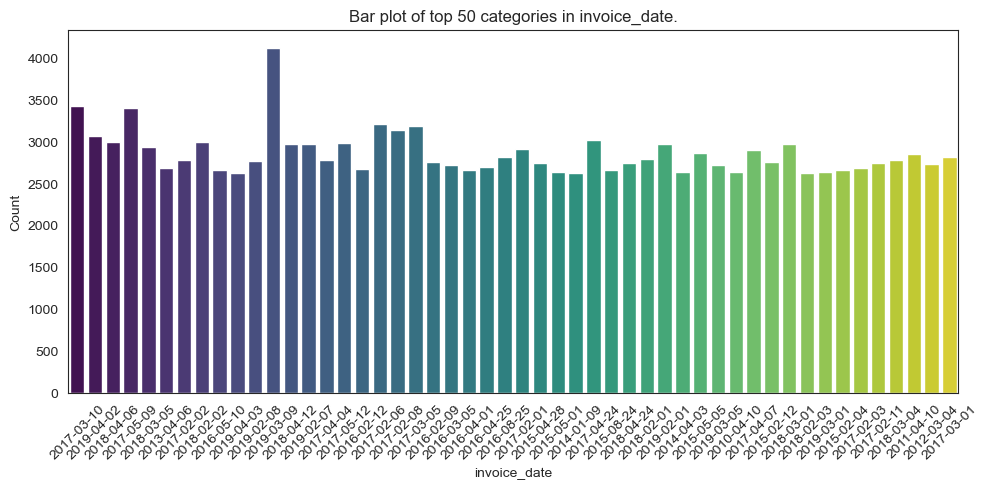


Frequency table for 'invoice_date:
           count  count
0     2019-03-09   4127
1     2017-03-10   3435
2     2017-05-09   3411
3     2017-02-06   3212
4     2017-03-05   3195
...          ...    ...
8270  1980-10-17      1
8271  1980-04-17      1
8272  1990-09-08      1
8273  1990-05-04      1
8274  1987-04-12      1

[8275 rows x 2 columns]

Unique categories for 'invoice_date' 8275
Missing values for 'invoice_date: 0


In [35]:
# Analyse the next categorical variable: invoice_date.
analyze_categorical_var(df, 'invoice_date')

### Variable summary: `invoice_date`.

#### Statistical overview.
| Metric             | Value       |
|--------------------|-------------|
| Count              | 4 476 738   |
| Unique dates       | 8 275       |
| Most frequent date | 2019-03-09 (4 127 records) |
| Missing values     | 0           |
| Cardinality        | High        |

---

#### Frequency distribution.

| Invoice date | Count | % of Total |
|--------------|--------|------------|
| 2019-03-09   | 4 127  | 0.09%      |
| 2017-03-10   | 3 435  | 0.08%      |
| 2017-05-09   | 3 411  | 0.08%      |
| 2017-02-06   | 3 212  | 0.07%      |
| 2017-03-05   | 3 195  | 0.07%      |
| ...          | ...    | ...        |
| Dates with count = 1 | ~7 000+ | ~85%+ |

> The dataset spans over 8 000 unique invoice dates, with a few dates showing moderate repetition—likely due to batch billing runs or system synchronization.

---

#### Interpretation.

- **High cardinality temporal feature:**  
  The `invoice_date` reflects a long operational timeline with granular billing records.
- **Billing cycle insight:**  
  Enables detection of monthly, seasonal, or irregular billing patterns.
- **No modeling value as raw date:**  
  Raw date values are not directly predictive but can be transformed into meaningful features.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Derive `billing_month`, `billing_year`, or `days_since_last_invoice`.  
  - Create flags for `"legacy_invoice"`, `"recent_invoice"`, or `"seasonal_billing"`.

- **Temporal aggregation:**  
  - Group by month or quarter to detect billing trends and operational shifts.  
  - Use for time-series modeling or forecasting.

- **Data quality check:**  
  - Validate against expected billing cycles and operational calendars.  
  - Investigate unusually frequent or sparse dates for system anomalies.

---

#### Stakeholder insights.

- **Revenue tracking:**  
  - Align invoice dates with payment records and consumption trends.

- **Operational monitoring:**  
  - Use invoice timelines to detect delays, backlogs, or system inefficiencies.

- **Policy & planning:**  
  - Inform billing system upgrades and customer communication strategies.

---

#### Variable closure.

- The `invoice_date` is a high-cardinality temporal feature with strong billing and operational relevance.  
- Supports time-based segmentation, forecasting, and diagnostics.  
- Requires transformation into derived features for modeling.

> This variable enables billing cycle analysis, revenue tracking, and operational planning.


### Univariate analysis: `meter_status`.



Analysis for: meter_status


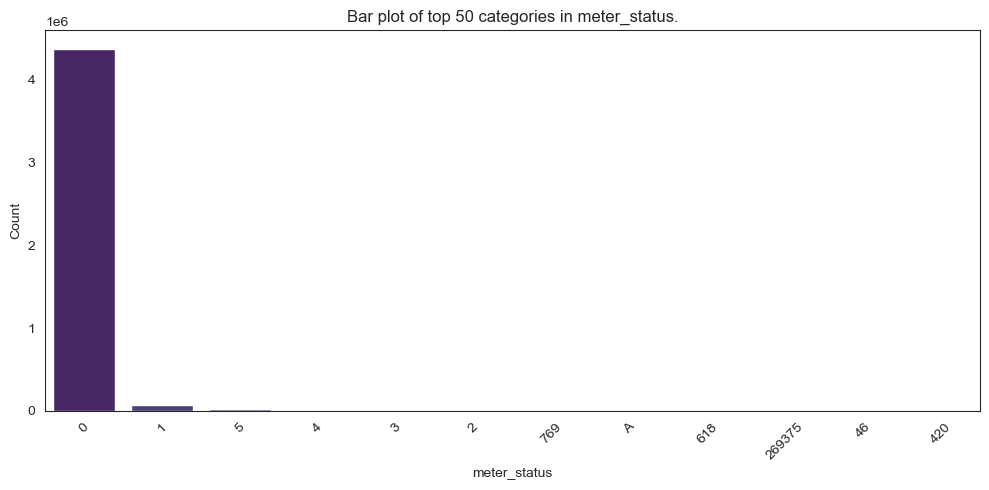


Frequency table for 'meter_status:
     count    count
0        0  4379008
1        1    74036
2        5    20628
3        4     2729
4        3      258
5        2       32
6       46       14
7        A       13
8      618       12
9      769        6
10  269375        1
11     420        1

Unique categories for 'meter_status' 12
Missing values for 'meter_status: 0


In [36]:
# Analyze the next categorical variable: meter_status.
analyze_categorical_var(df, 'meter_status')


### Variable summary: `meter_status`.

#### Statistical overview.
| Metric             | Value       |
|--------------------|-------------|
| Count              | 4 476 738   |
| Unique categories  | 12          |
| Most frequent code | 0 (4 379 008 records) |
| Missing values     | 0           |
| Cardinality        | Low         |

---

#### Category distribution.

| Meter status | Count    | % of Total |
|--------------|----------|------------|
| 0            | 4 379 008| 97.81%     |
| 1            |   74 036 | 1.65%      |
| 5            |   20 628 | 0.46%      |
| 4            |    2 729 | 0.06%      |
| 3            |      258 | <0.01%     |
| 2            |       32 | <0.01%     |
| Others (A, 46, 618, etc.) | ~48 | <0.01% |

> Category `0` overwhelmingly dominates the dataset, likely representing *active* or *normal* meters. Other codes may reflect tampering, faults, or legacy classifications.

---

#### Interpretation.

- **Extreme skew:**  
  The distribution is heavily concentrated in one category, suggesting a default or healthy operational state.
- **Operational flags:**  
  Rare categories may indicate tampering, faults, or disconnected meters—critical for fraud detection and maintenance planning.
- **Encoding anomalies:**  
  Presence of alphanumeric codes (e.g., `'A'`, `'618'`) suggests inconsistent encoding or legacy system artifacts.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create binary flags for `"is_faulty"`, `"is_tampered"`, or `"is_disconnected"` based on status codes.  
  - Group rare or ambiguous codes under `"other_status"`.

- **Data quality check:**  
  - Investigate non-numeric codes for consistency and operational meaning.  
  - Validate status definitions with domain experts or system documentation.

- **Modeling strategy:**  
  - Use grouped status flags to enrich fraud detection and billing anomaly models.  
  - Exclude raw status codes if inconsistent or sparsely populated.

---

#### Stakeholder insights.

- **Field operations:**  
  - Prioritize inspections and maintenance for meters flagged as tampered or faulty.

- **Revenue protection:**  
  - Use status flags to align technical diagnostics with billing anomalies and fraud risk.

- **Reporting & dashboards:**  
  - Include meter status breakdowns in operational summaries and compliance reports.

---

#### Variable closure.

- The `meter_status` is a low-cardinality categorical feature with high operational relevance.  
- Supports diagnostics, fraud detection, and maintenance planning.  
- Requires encoding cleanup and flag engineering for modeling.

> This variable enables targeted interventions and operational risk profiling across the metering infrastructure.
---

### Univariate analysis: `meter_type`.



Analysis for: meter_type


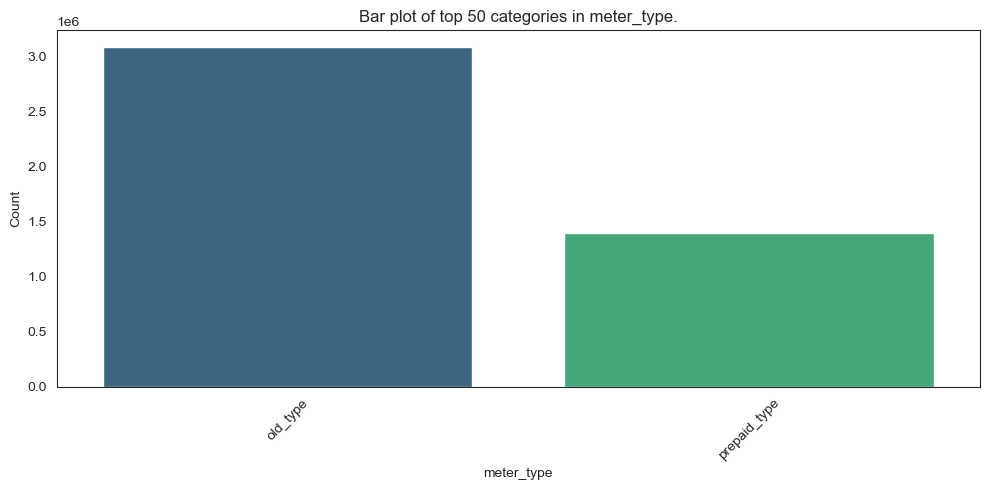


Frequency table for 'meter_type:
          count    count
0      old_type  3079398
1  prepaid_type  1397340

Unique categories for 'meter_type' 2
Missing values for 'meter_type: 0


In [37]:
# Original categorical variables: ['client_id', 'invoice_date', 'meter_status', 'meter_type', 'creation_date']

# Analyze the next categorical variable: meter_type.
analyze_categorical_var(df, 'meter_type')

### Variable summary: `meter_type`.

#### Statistical overview.
| Metric             | Value       |
|--------------------|-------------|
| Count              | 4 476 738   |
| Unique categories  | 2           |
| Most frequent type | `old_type` (3 079 398 records) |
| Missing values     | 0           |
| Cardinality        | Very low    |

---

#### Category distribution.

| Meter type     | Count     | % of Total |
|----------------|-----------|------------|
| `old_type`     | 3 079 398 | 68.8%      |
| `prepaid_type` | 1 397 340 | 31.2%      |

> The dataset is split between legacy meters and prepaid meters, with a strong skew toward older infrastructure.

---

#### Interpretation.

- **Infrastructure insight:**  
  Majority of meters are legacy (`old_type`), suggesting potential for modernization or upgrade programs.
- **Billing implications:**  
  Prepaid meters may align with different tariff structures, customer behavior, and fraud risk profiles.
- **Operational strategy:**  
  Meter type can guide maintenance schedules, remote monitoring capabilities, and customer engagement models.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create binary flags: `is_prepaid`, `is_legacy`.  
  - Use meter type to segment fraud risk and billing anomalies.

- **Modeling strategy:**  
  - Include meter type as a categorical predictor in fraud detection and revenue protection models.  
  - Explore interaction effects with `meter_status` and consumption patterns.

---

#### Stakeholder insights.

- **Field operations:**  
  - Prioritize smart meter rollouts in areas dominated by `old_type`.

- **Revenue protection:**  
  - Assess fraud vulnerability and billing compliance across meter types.

- **Policy & planning:**  
  - Use meter type distribution to inform infrastructure investment and customer education programs.

---

#### Variable closure.

- The `meter_type` is a binary categorical feature with high strategic relevance.  
- Supports infrastructure profiling, billing segmentation, and fraud risk modeling.  
- Consider pairing with `meter_status` for enriched operational diagnostics.

> This variable helps bridge technical infrastructure with customer billing models and operational priorities.
---

### Univariate analysis: `creation_date`.


Analysis for: creation_date


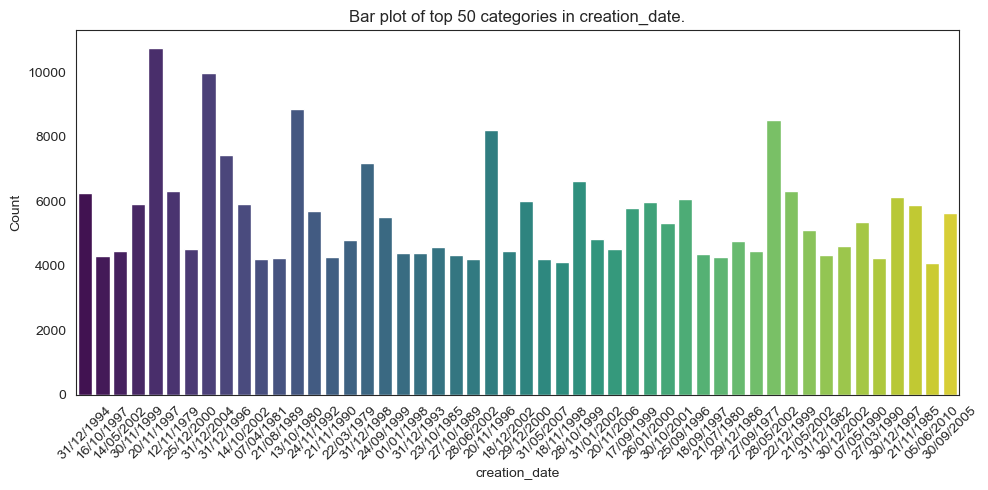


Frequency table for 'creation_date:
           count  count
0     20/11/1997  10758
1     31/12/2004   9981
2     13/10/1980   8867
3     28/05/2002   8518
4     20/11/1996   8198
...          ...    ...
8083  07/08/2019      1
8084  20/02/1990      1
8085  02/04/2019      1
8086  18/10/1996      1
8087  16/05/2019      1

[8088 rows x 2 columns]

Unique categories for 'creation_date' 8088
Missing values for 'creation_date: 0


In [38]:
# Original categorical variables: ['client_id', 'invoice_date', 'meter_status', 'meter_type', 'creation_date']

# Analyze the next categorical variable: creation_date.
analyze_categorical_var(df, 'creation_date')

### Variable summary: `creation_date`.

#### Statistical overview.
| Metric             | Value     |
|--------------------|-----------|
| Count              | 4 476 738 |
| Unique dates       | 8 088     |
| Most frequent date | 20/11/1997 (10 758 records) |
| Missing values     | 0         |
| Cardinality        | High      |

---

#### Frequency distribution.

| Creation date | Count | % of Total |
|----------------|--------|------------|
| 20/11/1997     | 10 758 | 0.24%      |
| 31/12/2004     | 9 981  | 0.22%      |
| 13/10/1980     | 8 867  | 0.20%      |
| 28/05/2002     | 8 518  | 0.19%      |
| 20/11/1996     | 8 198  | 0.18%      |
| ...            | ...    | ...        |
| Dates with count = 1 | ~7 000+ | ~85%+ |

> The majority of `creation_date` values are unique, with only a few dates showing moderate repetition—likely due to batch onboarding or legacy system imports.

---

#### Interpretation.

- **High cardinality temporal feature:**  
  The `creation_date` spans over 8 000 unique values, suggesting a long operational history with granular timestamping.
- **Lifecycle insight:**  
  Enables cohort analysis, account aging, and onboarding wave detection.
- **No modeling value as raw date:**  
  Raw date values are not directly predictive but can be transformed into meaningful features.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Derive `account_age` by subtracting `creation_date` from reference date.  
  - Create flags for `"legacy_account"`, `"recent_account"`, or `"seasonal_onboarding"`.

- **Temporal aggregation:**  
  - Group by year, month, or quarter to detect onboarding trends.  
  - Use for cohort-based fraud or consumption analysis.

- **Data quality check:**  
  - Validate against system launch dates and operational timelines.  
  - Investigate unusually frequent dates for batch imports or default values.

---

#### Stakeholder insights.

- **Cohort reporting:**  
  - Segment clients by onboarding period for performance tracking and engagement.

- **Lifecycle management:**  
  - Identify aging accounts for upgrade, audit, or retention strategies.

- **Operational planning:**  
  - Use onboarding waves to align resource allocation and service delivery.

---

#### Variable closure.

- The `creation_date` is a high-cardinality temporal feature with strong lifecycle relevance.  
- Supports cohort analysis, account aging, and operational diagnostics.  
- Requires transformation into derived features for modeling.

> This variable enables time-based segmentation, lifecycle tracking, and onboarding trend analysis.


### Migrated categorical variables versus target analysis.

Following the profiling of originally defined categorical variables, we now turn to those that were **migrated from numerical encoding**. These variables were initially treated as numeric but have been reclassified as categorical due to their semantic meaning, low cardinality, or domain-specific encoding.

This section applies the same analytical function to explore their distribution, cardinality, and relevance for modeling and stakeholder interpretation.

> These variables often carry operational, geographic, or classification significance and are essential for segmentation, diagnostics, and feature engineering.


In [39]:
# List of migrated categorical variables.

migrated_categorical_vars = [
    'tariff_type',
    'meter_code',
    'reading_remark',
    'client_catg',
    'district',
    'region',
    'meter_number'
]

# Print the migrated categorical variables.
print("Migrated categorical variables:")
print(migrated_categorical_vars)


Migrated categorical variables:
['tariff_type', 'meter_code', 'reading_remark', 'client_catg', 'district', 'region', 'meter_number']


### Univariate analysis: `tariff_type` (migrated).



Analysis for: tariff_type


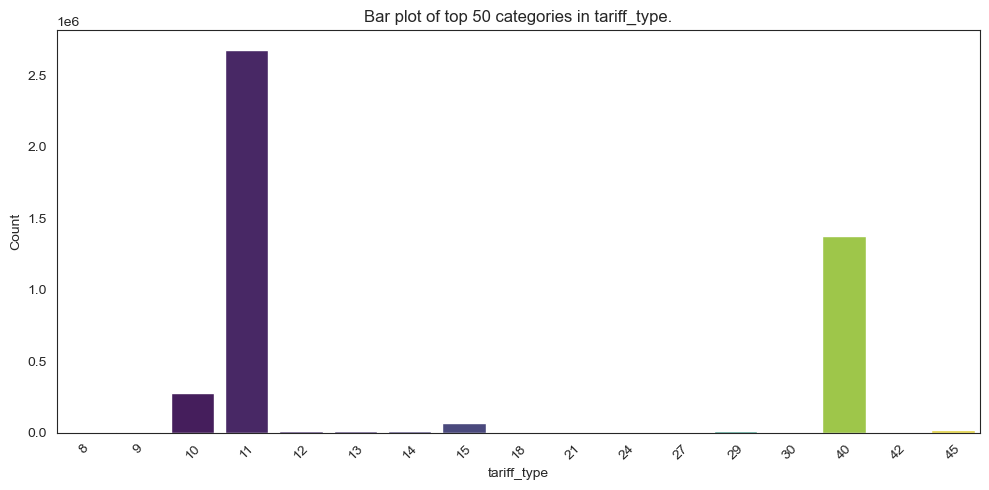


Frequency table for 'tariff_type:
    count    count
0      11  2679864
1      40  1379752
2      10   276210
3      15    72422
4      45    17552
5      13    11656
6      14    11611
7      12    11345
8      29    10090
9       9     6039
10     21      104
11      8       43
12     30       35
13     24        9
14     18        4
15     27        1
16     42        1

Unique categories for 'tariff_type' 17
Missing values for 'tariff_type: 0


In [40]:
# Analyse the migrated categorical variable: tariff_type.
analyze_categorical_var(df, 'tariff_type')

### Variable summary: `tariff_type`.

#### Statistical overview.
| Metric             | Value       |
|--------------------|-------------|
| Count              | 4 476 738   |
| Unique categories  | 17          |
| Most frequent Code | 11 (2 679 864 records) |
| Missing values     | 0           |
| Cardinality        | Moderate    |

---

#### Frequency distribution.

| Tariff code | Count     | % of Total |
|-------------|-----------|------------|
| 11          | 2 679 864 | 59.86%     |
| 40          | 1 379 752 | 30.82%     |
| 10          | 276 210   | 6.17%      |
| 15          | 72 422    | 1.62%      |
| 45          | 17 552    | 0.39%      |
| ...         | ...       | ...        |
| Codes with count < 50 | ~6 | <0.01%   |

> The top three tariff codes dominate the dataset, accounting for over 96% of all records. The remaining codes form a long tail, with several appearing fewer than 50 times.

---

#### Interpretation.

- **Categorical feature with operational relevance:**  
  The `tariff_type` encodes electricity pricing plans and customer classifications.
- **Skewed distribution:**  
  Indicates concentration in a few dominant tariff categories, likely standard residential or commercial plans.
- **Rare categories:**  
  May represent legacy tariffs, special agreements, or data entry anomalies — candidates for grouping or exclusion.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Map numeric codes to descriptive labels using external tariff documentation.  
  - Create flags for `"is_bulk"`, `"is_residential"`, `"is_special_tariff"`.

- **Category grouping:**  
  - Consolidate rare codes into `"Other"` or `"Low Frequency"` buckets.  
  - Consider domain-specific groupings aligned with billing logic.

- **Data quality check:**  
  - Validate rare codes for correctness and relevance.  
  - Cross-reference with meter type, region, and customer class.

---

#### Stakeholder insights.

- **Revenue segmentation:**  
  - Enables analysis of revenue contribution by tariff type.

- **Fraud detection & compliance:**  
  - Supports profiling of high-risk tariff categories.

- **Policy & planning:**  
  - Informs tariff restructuring, subsidy targeting, and customer communication.

---

#### Variable closure.

- The `tariff_type` is a moderately cardinal categorical feature with strong billing and operational significance.  
- Requires decoding and grouping for interpretability and modeling.  
- Supports segmentation, fraud detection, and tariff impact analysis.

> This variable enables customer classification, billing logic validation, and strategic tariff planning.


### Univariate analysis: `meter_code` (migrated).

The `meter_code` field is a migrated categorical variable that encodes the technical configuration or classification of electricity meters. Although originally stored as numeric values, these codes represent categorical distinctions such as meter model, firmware version, or installation protocol, depending on the utility’s internal taxonomy.

**Objectives:**
- Understand distribution of meter configurations across the customer base
- Detect dominant and rare meter codes for segmentation and diagnostics
- Support fraud detection, maintenance planning, and infrastructure profiling
- Enable alignment with meter type, region, and operational status

**Note:**  
`meter_code` is a domain-specific categorical variable with strong technical relevance. It should be decoded or grouped into interpretable categories for modeling and stakeholder reporting. Consider deriving flags for `"is_legacy_code"`, `"is_smart_code"`, or `"is_special_config"` to support infrastructure modernization, fraud risk analysis, and operational planning.



Analysis for: meter_code


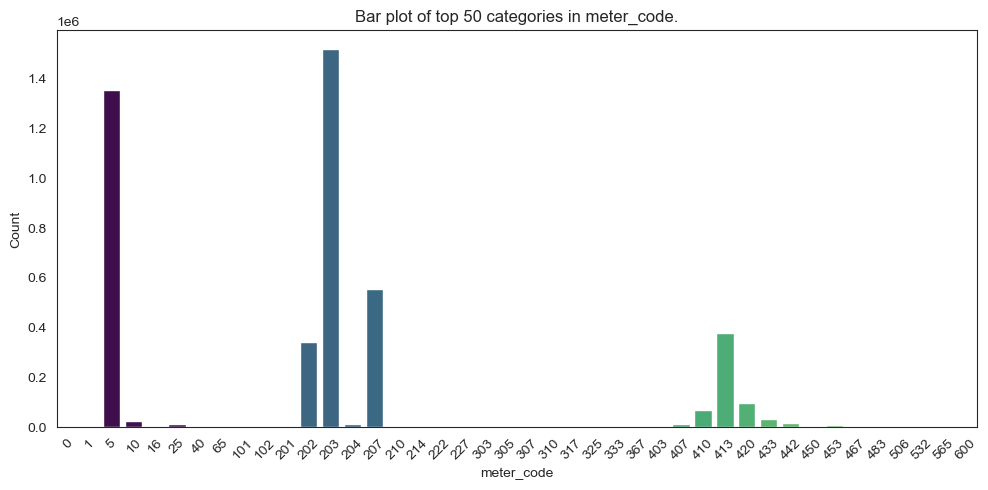


Frequency table for 'meter_code:
    count    count
0     203  1516834
1       5  1352032
2     207   555627
3     413   378915
4     202   343251
5     420    98270
6     410    69080
7     433    34447
8      10    27744
9     442    17050
10     25    14934
11    407    13768
12    204    12427
13    453     8290
14    201     7672
15    467     7302
16    506     3389
17    483     2830
18    214     2643
19     40     2482
20    532     1982
21    565     1082
22    403     1070
23    450     1059
24    600      807
25    210      789
26    102      313
27    227      178
28    101       74
29     65       74
30     16       73
31    310       51
32    307       50
33    305       44
34    222       42
35      0       33
36    317       16
37    303        5
38    333        4
39    367        3
40    325        1
41      1        1

Unique categories for 'meter_code' 42
Missing values for 'meter_code: 0


In [41]:
# migrated_catgl_vars = ['tariff_type', 'meter_code', 'reading_remark', 'client_catg', 'district', 'region', 'meter_number']

# Analyse the next migrated categorical variable: meter_code.
analyze_categorical_var(df, 'meter_code')  

### Variable summary: `meter_code`.

#### Statistical overview.
| Metric             | Value       |
|--------------------|-------------|
| Count              | 4 476 738   |
| Unique categories  | 42          |
| Most frequent code | `203` (1 516 834 records) |
| Missing values     | 0           |
| Cardinality        | Moderate    |

---

#### Category distribution (top 10).

| Meter code | Count     | % of Total |
|------------|-----------|------------|
| `203`      | 1 516 834 | 33.9%      |
| `5`        | 1 352 032 | 30.2%      |
| `207`      | 555 627   | 12.4%      |
| `413`      | 378 915   | 8.5%       |
| `202`      | 343 251   | 7.7%       |
| `420`      | 98 270    | 2.2%       |
| `410`      | 69 080    | 1.5%       |
| `433`      | 34 447    | 0.8%       |
| `10`       | 27 744    | 0.6%       |
| `442`      | 17 050    | 0.4%       |

> The top 5 meter codes account for over 92% of all records, indicating strong dominance by a few configurations.

---

#### Interpretation.

- **Infrastructure insight:**  
  Meter codes reflect technical configurations, with dominant codes likely representing standard or widely deployed models.
- **Operational strategy:**  
  Rare codes may signal legacy meters, test units, or specialized installations requiring tailored maintenance or monitoring.
- **Data quality considerations:**  
  Extremely rare codes (e.g., `325`, `1`) may represent data entry errors or obsolete configurations.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create flags: `is_common_code`, `is_legacy_code`, `is_test_code`.  
  - Group rare codes into `"other"` to reduce noise in modeling.

- **Modeling strategy:**  
  - Use `meter_code` as a categorical predictor in fraud detection and infrastructure profiling.  
  - Explore interactions with `meter_type`, `meter_status`, and consumption patterns.

---

#### Stakeholder insights.

- **Field operations:**  
  - Prioritize audits or upgrades for rare and legacy meter codes.

- **Revenue protection:**  
  - Investigate fraud risk associated with specific meter configurations.

- **Policy & planning:**  
  - Use meter code distribution to inform procurement, standardization, and modernization efforts.

---

#### Variable closure.

- The `meter_code` is a moderately cardinal categorical feature with high technical relevance.  
- Supports segmentation of infrastructure, fraud diagnostics, and operational planning.  
- Consider decoding or grouping codes for stakeholder clarity and modeling efficiency.

> This variable bridges technical meter configurations with operational and strategic decision-making.


### Univariate analysis: `reading_remark` (migrated).



Analysis for: reading_remark


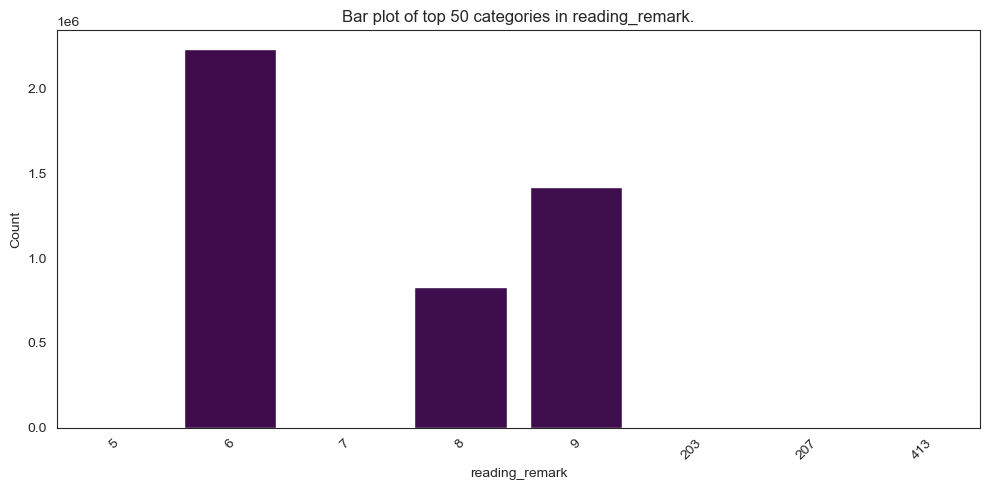


Frequency table for 'reading_remark:
   count    count
0      6  2230928
1      9  1416992
2      8   828123
3      7      661
4    203       15
5    413       12
6    207        6
7      5        1

Unique categories for 'reading_remark' 8
Missing values for 'reading_remark: 0


In [42]:
# Analyse the next migrated variable: reading_remark.
analyze_categorical_var(df, 'reading_remark')

### Variable summary: `reading_remark`.

#### Statistical overview.
| Metric             | Value       |
|--------------------|-------------|
| Count              | 4 476 738   |
| Unique categories  | 8           |
| Most frequent code | `6` (2 230 928 records) |
| Missing values     | 0           |
| Cardinality        | Low         |

---

#### Category distribution.

| Reading remark code | Count     | % of Total |
|---------------------|-----------|------------|
| `6`                 | 2 230 928 | 49.8%      |
| `9`                 | 1 416 992 | 31.6%      |
| `8`                 | 828 123   | 18.5%      |
| `7`                 | 661       | 0.01%      |
| `203`               | 15        | ~0.0003%   |
| `413`               | 12        | ~0.0003%   |
| `207`               | 6         | ~0.0001%   |
| `5`                 | 1         | ~0.00002%  |

> The top three codes (`6`, `9`, `8`) account for over 99% of all records, suggesting a highly standardized remark system with a few dominant operational flags.

---

#### Interpretation.

- **Operational insight:**  
  Codes likely represent standard reading outcomes (e.g., successful, estimated, or flagged). Rare codes may reflect legacy systems or manual overrides.
- **Data quality considerations:**  
  Extremely rare codes (e.g., `203`, `413`, `207`, `5`) may be artifacts of migration or misclassification.
- **Infrastructure relevance:**  
  Reading remarks can signal meter accessibility, tampering suspicion, or procedural deviations.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create flags: `is_estimated`, `is_flagged`, `is_normal_reading`.  
  - Group rare codes into `"other"` to simplify modeling.

- **Modeling strategy:**  
  - Use `reading_remark` to segment reading reliability and fraud risk.  
  - Explore interactions with `meter_status`, `meter_code`, and billing anomalies.

---

#### Stakeholder insights.

- **Field operations:**  
  - Prioritize follow-ups for flagged or estimated readings.

- **Revenue protection:**  
  - Investigate patterns in remark codes that correlate with tampering or billing irregularities.

- **Policy & planning:**  
  - Use remark distribution to inform technician training, procedural updates, and system standardization.

---

### Variable closure.

- The `reading_remark` is a low-cardinality categorical feature with strong operational relevance.  
- Supports diagnostics of meter reading reliability, fraud detection, and field planning.  
- Consider decoding codes into descriptive labels for stakeholder clarity.

> This variable helps bridge field-level observations with data-driven operational strategy.


### Univariate analysis: `client_catg` (migrated).



Analysis for: client_catg


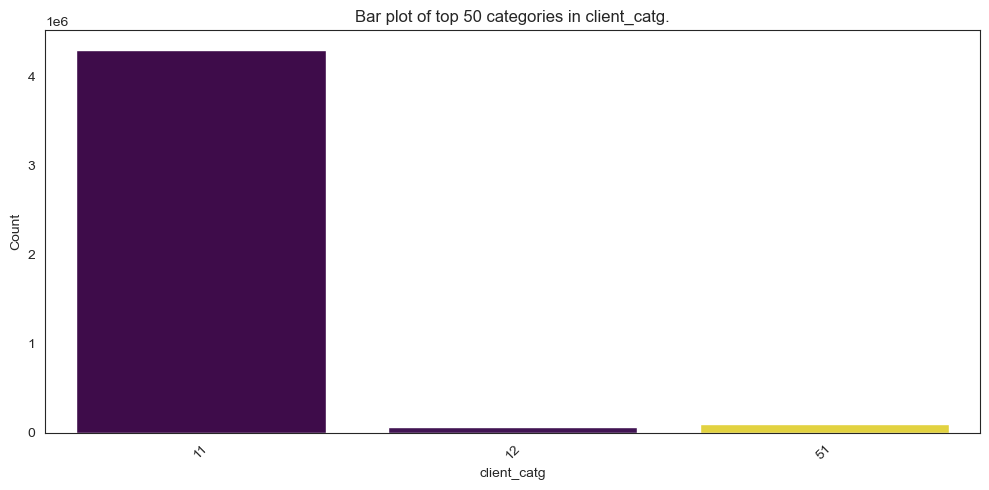


Frequency table for 'client_catg:
   count    count
0     11  4304880
1     51   103929
2     12    67929

Unique categories for 'client_catg' 3
Missing values for 'client_catg: 0


In [43]:
# migrated_catgl_vars = ['tariff_type', 'meter_code', 'reading_remark', 'client_catg', 'district', 'region', 'meter_number']

# Analyse the next categorical variable: client_catg.
analyze_categorical_var(df, 'client_catg')

### Variable summary: `client_catg`.

#### Statistical overview.
| Metric             | Value       |
|--------------------|-------------|
| Count              | 4 476 738   |
| Unique categories  | 3           |
| Most frequent type | `11` (4 304 880 records) |
| Missing values     | 0           |
| Cardinality        | Very low    |

---

#### Category distribution.

| Client category | Count     | % of total |
|-----------------|-----------|------------|
| `11`            | 4 304 880 | 96.2%      |
| `51`            | 103 929   | 2.3%       |
| `12`            | 67 929    | 1.5%       |

> The dataset is overwhelmingly dominated by category `11`, suggesting a primary customer base with limited diversity in account types.

---

#### Interpretation.

- **Customer segmentation insight:**  
  Category `11` likely represents residential or standard accounts, while `51` and `12` may correspond to commercial, industrial, or municipal clients.

- **Operational strategy:**  
  Minority categories may require tailored billing, service delivery, or fraud detection strategies.

- **Data quality considerations:**  
  Low cardinality and clean distribution suggest reliable migration and consistent classification.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create flags: `is_residential`, `is_commercial`, `is_municipal`.  
  - Use client category to segment consumption, billing anomalies, and fraud risk.

- **Modeling strategy:**  
  - Include `client_catg` as a categorical predictor in fraud detection and revenue protection models.  
  - Explore interaction effects with `meter_type`, `meter_code`, and tariff structures.

---

#### Stakeholder insights.

- **Revenue strategy:**  
  - Tailor billing and tariff models to minority client categories.

- **Field operations:**  
  - Prioritize infrastructure upgrades or audits for high-value or high-risk client segments.

- **Policy & planning:**  
  - Use client category distribution to inform service equity, subsidy programs, and infrastructure investment.

---

#### Variable closure.

- The `client_catg` is a low-cardinality categorical feature with strong strategic relevance.  
- Supports customer segmentation, billing strategy, and operational planning.  
- Consider decoding categories into descriptive labels for stakeholder clarity.

> This variable anchors customer classification and enables targeted interventions across billing, fraud detection, and infrastructure planning.
---

### Univariate analysis: `district` (migrated).



Analysis for: district


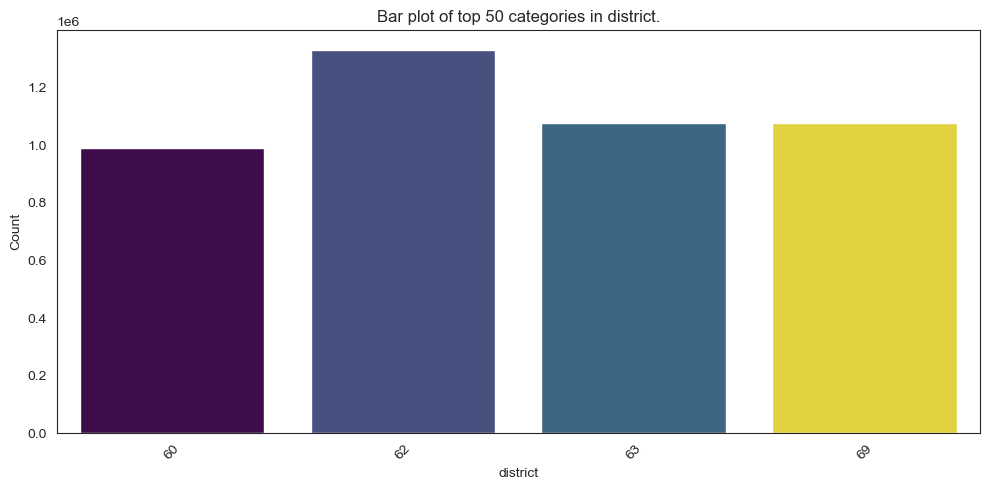


Frequency table for 'district:
   count    count
0     62  1332062
1     63  1077832
2     69  1076942
3     60   989902

Unique categories for 'district' 4
Missing values for 'district: 0


In [44]:
# migrated_catgl_vars = ['tariff_type', 'meter_code', 'reading_remark', 'client_catg', 'district', 'region', 'meter_number']
# Analyse the next migrated categorical variable: district
analyze_categorical_var(df, 'district')

### Variable summary: `district`.

#### Statistical overview.
| Metric             | Value       |
|--------------------|-------------|
| Count              | 4 476 738   |
| Unique categories  | 4           |
| Most frequent code | `62` (1 332 062 records) |
| Missing values     | 0           |
| Cardinality        | Low         |

---

#### Category distribution.

| District code | Count     | % of Total |
|---------------|-----------|------------|
| `62`          | 1 332 062 | 29.7%      |
| `63`          | 1 077 832 | 24.1%      |
| `69`          | 1 076 942 | 24.1%      |
| `60`          |   989 902 | 22.1%      |

> The distribution is relatively balanced, with District `62` slightly more dominant. All districts exceed 20% representation.

---

#### Interpretation.

- **Spatial insight:**  
  District codes likely reflect operational zones or municipal regions. Their balance suggests broad geographic coverage.
- **Operational strategy:**  
  District-level segmentation supports targeted interventions, resource allocation, and regional performance tracking.
- **Data quality considerations:**  
  No missing values and low cardinality indicate a clean and stable variable for modeling and reporting.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create flags: `is_major_district`, `is_underrepresented`, `is_priority_zone`.  
  - Map codes to district names for stakeholder clarity.

- **Modeling strategy:**  
  - Use `district` as a spatial predictor in fraud detection, consumption profiling, and service equity analysis.  
  - Explore interactions with `meter_status`, `reading_remark`, and tariff structures.

---

#### Stakeholder insights.

- **Field operations:**  
  - Align technician deployment and follow-up strategies by district.

- **Revenue protection:**  
  - Monitor fraud or tampering patterns by district to guide enforcement.

- **Policy & planning:**  
  - Use district segmentation to inform infrastructure investment and service delivery equity.

---

#### Variable closure.

- The `district` is a low-cardinality spatial variable with strong operational and planning relevance.  
- Supports geographic segmentation, fraud diagnostics, and stakeholder alignment.  
- Consider decoding or grouping for improved interpretability and strategic reporting.

> This variable anchors spatial context for modeling, diagnostics, and regional planning.


### Univariate analysis: `region` (migrated).



Analysis for: region


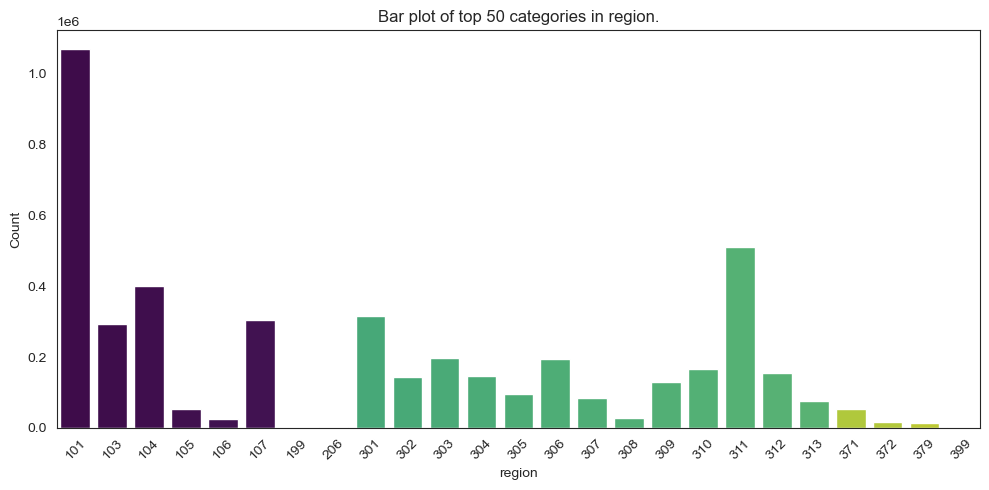


Frequency table for 'region:
    count    count
0     101  1069262
1     311   509808
2     104   400665
3     301   316403
4     107   303450
5     103   294480
6     303   197946
7     306   195225
8     310   165366
9     312   156195
10    304   146515
11    302   143970
12    309   128819
13    305    94276
14    307    85531
15    313    76924
16    105    53131
17    371    53021
18    308    28699
19    106    24212
20    372    17013
21    379    13255
22    399     1566
23    206     1004
24    199        2

Unique categories for 'region' 25
Missing values for 'region: 0


In [45]:
# migrated_catgl_vars = ['tariff_type', 'meter_code', 'reading_remark', 'client_catg', 'district', 'region', 'meter_number']
# Analyse the next migrated categorical variable: region.
analyze_categorical_var(df, 'region')

### Variable summary: `region`.

#### Statistical overview.
| Metric             | Value       |
|--------------------|-------------|
| Count              | 4 476 738   |
| Unique categories  | 25          |
| Most frequent code | `101` (1 069 262 records) |
| Missing values     | 0           |
| Cardinality        | Moderate    |

---

#### Category distribution (top 10).

| Region code | Count     | % of Total |
|-------------|-----------|------------|
| `101`       | 1 069 262 | 23.9%      |
| `311`       |   509 808 | 11.4%      |
| `104`       |   400 665 |  8.9%      |
| `301`       |   316 403 |  7.1%      |
| `107`       |   303 450 |  6.8%      |
| `103`       |   294,480 |  6.6%      |
| `303`       |   197,946 |  4.4%      |
| `306`       |   195,225 |  4.4%      |
| `310`       |   165,366 |  3.7%      |
| `312`       |   156,195 |  3.5%      |

> The top 6 regions account for over 65% of all records, suggesting concentrated activity in a few key areas.

---

### Interpretation

- **Spatial insight:**  
  Region codes represent broader administrative zones. Their distribution reveals operational concentration and potential service disparities.
- **Operational strategy:**  
  High-frequency regions may indicate urban centers or priority zones. Rare codes (e.g., `399`, `206`, `199`) may reflect legacy data, test regions, or migration artifacts.
- **Data quality considerations:**  
  The presence of extremely rare codes suggests a need for validation or grouping to reduce modeling noise.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create flags: `is_major_region`, `is_rare_region`, `is_test_region`.  
  - Group rare codes into `"other"` to simplify modeling and improve interpretability.
- **Modeling strategy:**  
  - Use `region` as a spatial predictor in fraud detection, infrastructure planning, and service equity modeling.  
  - Explore interactions with `district`, `meter_code`, and consumption metrics.

---

#### Stakeholder insights.

- **Field operations:**  
  - Prioritize audits or interventions in high-volume regions.

- **Revenue protection:**  
  - Monitor fraud trends and billing anomalies by region.

- **Policy & planning:**  
  - Use regional segmentation to guide infrastructure investment and strategic planning.

---

#### Variable closure.

- The `region` is a moderately cardinal spatial variable with strategic planning relevance.  
- Supports macro-level segmentation, operational diagnostics, and stakeholder alignment.  
- Consider decoding or grouping for improved clarity and modeling efficiency.

> This variable provides a strategic lens for regional performance, equity, and infrastructure planning.


### Univariate analysis: `meter_number` (migrated).


Analysis for: meter_number


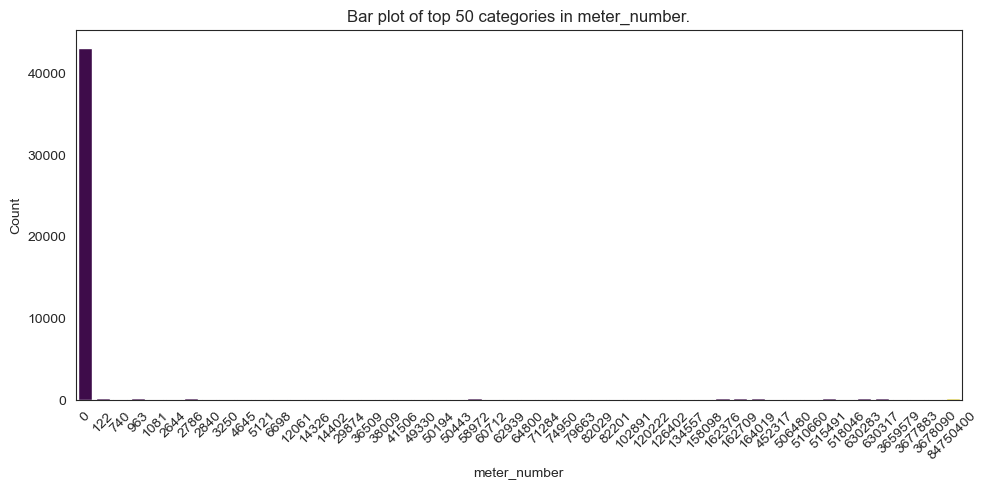


Frequency table for 'meter_number:
                 count  count
0                    0  43161
1                 2786    251
2               630317    230
3               162709    226
4                  963    220
...                ...    ...
201888  27191150781900      1
201889   2165700060065      1
201890   2198802510500      1
201891         4880350      1
201892   2158764329200      1

[201893 rows x 2 columns]

Unique categories for 'meter_number' 201893
Missing values for 'meter_number: 0


In [46]:
# migrated_catgl_vars = ['tariff_type', 'meter_code', 'reading_remark', 'client_catg', 'district', 'region', 'meter_number']
# Analyse the next migrated categorical variable: meter_number. 
analyze_categorical_var(df, 'meter_number')
# Excluded from analysis because of high cardinality.

## __Tec4__: Conduct bivariate analysis.

This section explores relationships between predictors and the target variable (`target`), as well as inter-feature dynamics to guide feature engineering. It is divided into three modular sub-sections:

---

### __Tec4.1__: Feature vs Feature relationships.

This sub-section explores structural relationships between input features, identifying potential multicollinearity, derived dependencies, and opportunities for feature engineering.

#### Numerical vs. numerical.
- **Visuals**: Pairplots, scatterplots, correlation heatmaps
- **Stats**: Pearson/Spearman correlation coefficients
- **Redundancy Checks**: Flag highly correlated pairs (e.g., `old_reading` vs. `new_reading`)

#### Categorical vs. categorical.
- **Visuals**: Mosaic plots, grouped bar plots
- **Stats**: Chi-square tests; category clustering
- **Segmentation**: Identify dominant combinations (e.g., `region` × `tariff_type`)

#### Numerical vs. categorical.
- **Visuals**: Boxplots, violin plots grouped by category
- **Stats**: ANOVA or Kruskal-Wallis tests
- **Feature Engineering Leads**: Guide binning or flag creation (e.g., high consumption in specific `districts`)

---

### __Tec4.2__: Numerical vs Target relationships.

This sub-section focuses on how continuous predictors relate to the binary target variable (`target`), guiding signal detection and transformation logic.

- **Visuals**: Boxplots, violin plots, distribution overlays split by `target`
- **Stats**: T-tests or Mann-Whitney U tests for mean/median differences
- **Signal Checks**: Focus on separation in skewed metrics (`consumption_level_2–4`, `number_months`, `meter_coefficient`)

---

### __Tec4.3__: Categorical vs Target relationships.

This sub-section examines how discrete predictors relate to the target variable (`target`), supporting lift analysis, encoding decisions, and segmentation logic.

- **Visuals**: Stacked bar plots, count plots with hue by `target`
- **Stats**: Chi-square tests; Cramér’s V for association strength
- **Lift Analysis**: Calculate fraud/anomaly lift per category (e.g., `tariff_type`, `client_catg`, `region`, `meter_status`)

---

### Notebook closure plan.

#### Final summary cell.
- Recap variable types, migration rationale, and key bivariate findings
- Highlight variables with strong predictive signals or interaction potential

#### Transition to feature engineering.
- Export cleaned and profiled dataset.
- Document encoding plans (e.g., one-hot, ordinal).
- Flag variables for transformation, synthesis, or exclusion.


### __Tec4.1__: Feature vs Feature relationships.

This section explores structural relationships between input features, identifying potential multicollinearity, derived dependencies, and opportunities for feature engineering.

> A full correlation matrix was already presented in Tec5.1. Here, we focus on selected bivariate relationships that reveal operational structure, behavioral segmentation, and transformation logic.
---

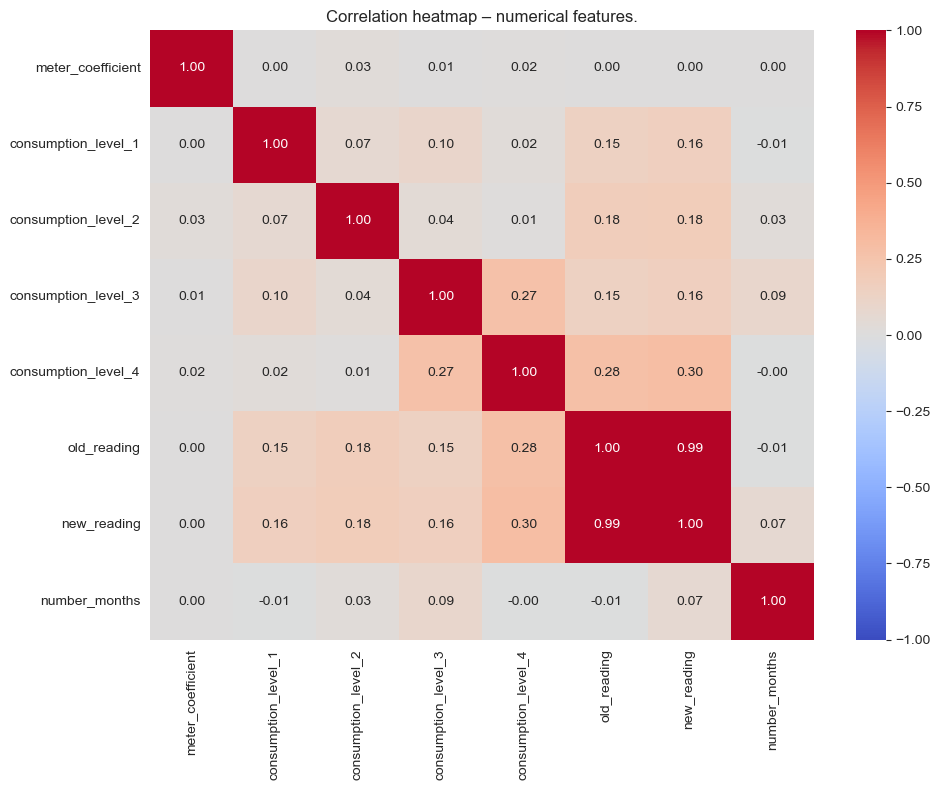

In [78]:
# Correlation heatmap for numerical features. 
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix.
corr_matrix = df[numerical_vars].corr(method='pearson')

# Plot heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation heatmap – numerical features.")
plt.tight_layout()
plt.show()


### Tec4.1 – Consolidated observations.

This section revealed key structural relationships among input features, guiding transformation logic and feature engineering strategy.

#### Key findings:

- **`old_reading` vs `new_reading`**  
  Near-perfect correlation (0.99) confirms structural dependency. Supports delta feature engineering (`new_reading - old_reading`).

- **`meter_coefficient`**  
  Exhibits low correlation with all other numeric features. Likely an independent scaling factor, retained for billing logic and interaction terms.

- **`consumption_level_1–4`**  
  Weak to moderate internal correlations suggest distinct aggregation windows. Supports retention as separate features or synthesis into composite metrics.

- **Categorical overlays**  
  Boxplots and grouped bar plots revealed behavioral segmentation across `meter_type`, `region`, and `tariff_type`. These combinations support stratified modeling and fairness diagnostics.

#### Modeling implications:

- Flagged redundant numeric pairs for transformation or exclusion.
- Identified derived relationships and engineered deltas.
- Highlighted categorical interactions for encoding and segmentation.


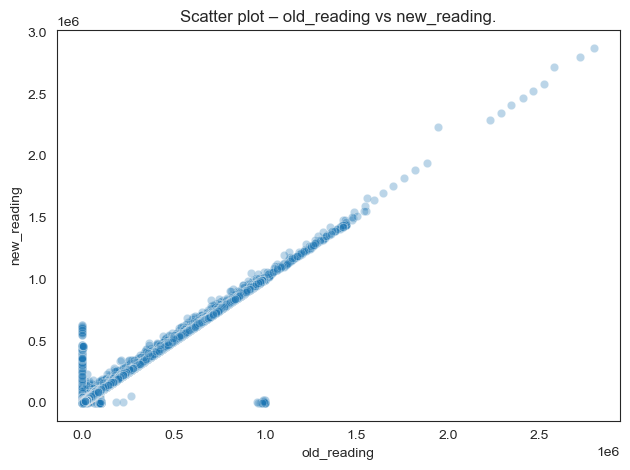

In [80]:
# Scatter plot: old_reading vs new_reading
sns.scatterplot(data=df, x='old_reading', y='new_reading', alpha=0.3)
plt.title("Scatter plot – old_reading vs new_reading.")
plt.tight_layout()
plt.show()


### Bivariate analysis: `old_reading` vs `new_reading`.

This scatter plot reveals a near-perfect linear relationship between `old_reading` and `new_reading`, with data points tightly clustered along the diagonal. This confirms that `new_reading` is structurally derived from `old_reading` plus a consumption delta.

> The correlation coefficient of 0.99 (as shown in Tec5.1) reinforces this dependency, suggesting that these features are not independent and should be treated accordingly.

#### Modeling implications:
- Create a derived feature `reading_delta = new_reading - old_reading` to capture actual consumption.
- Consider excluding one of the original readings to reduce multicollinearity, provided the delta is retained.
- Improves interpretability by explicitly representing consumption rather than relying on raw meter values.
- Retain both readings if needed for audit trail or anomaly detection logic.


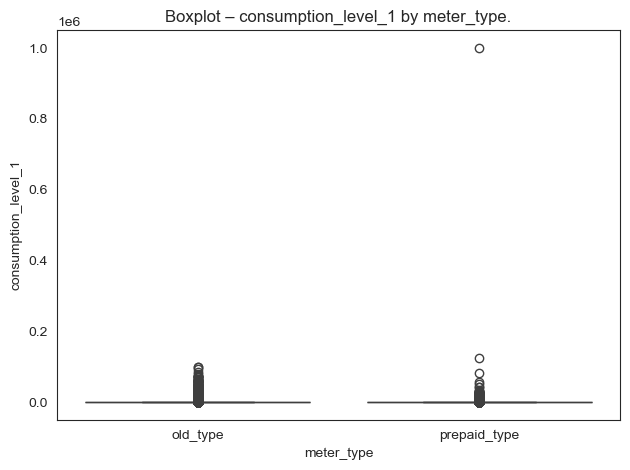

In [84]:
# consumption_level_1 vs meter_type
sns.boxplot(data=df, x='meter_type', y='consumption_level_1')
plt.title("Boxplot – consumption_level_1 by meter_type.")
plt.tight_layout()
plt.show()


### Bivariate analysis: `consumption_level_1` vs `meter_type`.

This boxplot compares consumption patterns across meter types. While both `old_type` and `prepaid_type` show low median usage, `old_type` meters exhibit a wider distribution and more extreme outliers. This suggests that legacy infrastructure may be associated with higher or more variable consumption behavior.

> Prepaid meters show tighter distributions, possibly due to tariff discipline or behavioral constraints.

#### Modeling implications:
- Supports stratified modeling by meter type.
- Justifies creation of high-consumption flags per meter category.
- Reinforces interpretability for stakeholders comparing infrastructure types.


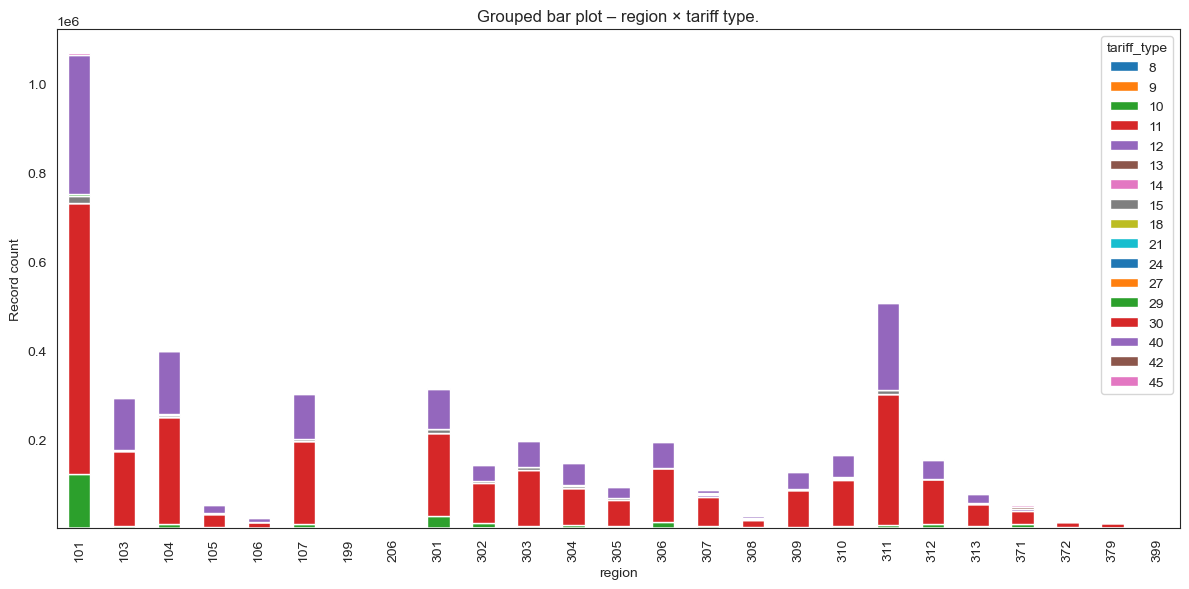

In [82]:
# Grouped bar plot: region × tariff_type
cross_tab = df.groupby(['region', 'tariff_type']).size().unstack(fill_value=0)

# Plot
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Grouped bar plot – region × tariff type.")
plt.ylabel("Record count")
plt.tight_layout()
plt.show()


### Bivariate analysis: `region` × `tariff_type`.

This grouped bar plot compares record counts across regions, segmented by `tariff_type`. Region `101` paired with tariff `11` dominates the dataset, while other regions show more diverse tariff distributions. A few rare combinations appear only marginally.

> The plot reveals operational concentration and supports geographic segmentation logic. It also highlights encoding risks from rare combinations.

#### Modeling implications:
- Supports stratified modeling for dominant region–tariff combinations.
- Justifies grouping or exclusion of rare combinations to reduce noise.
- Enables fairness diagnostics across geographic and pricing segments.
- May inform creation of interaction flags or composite categories.


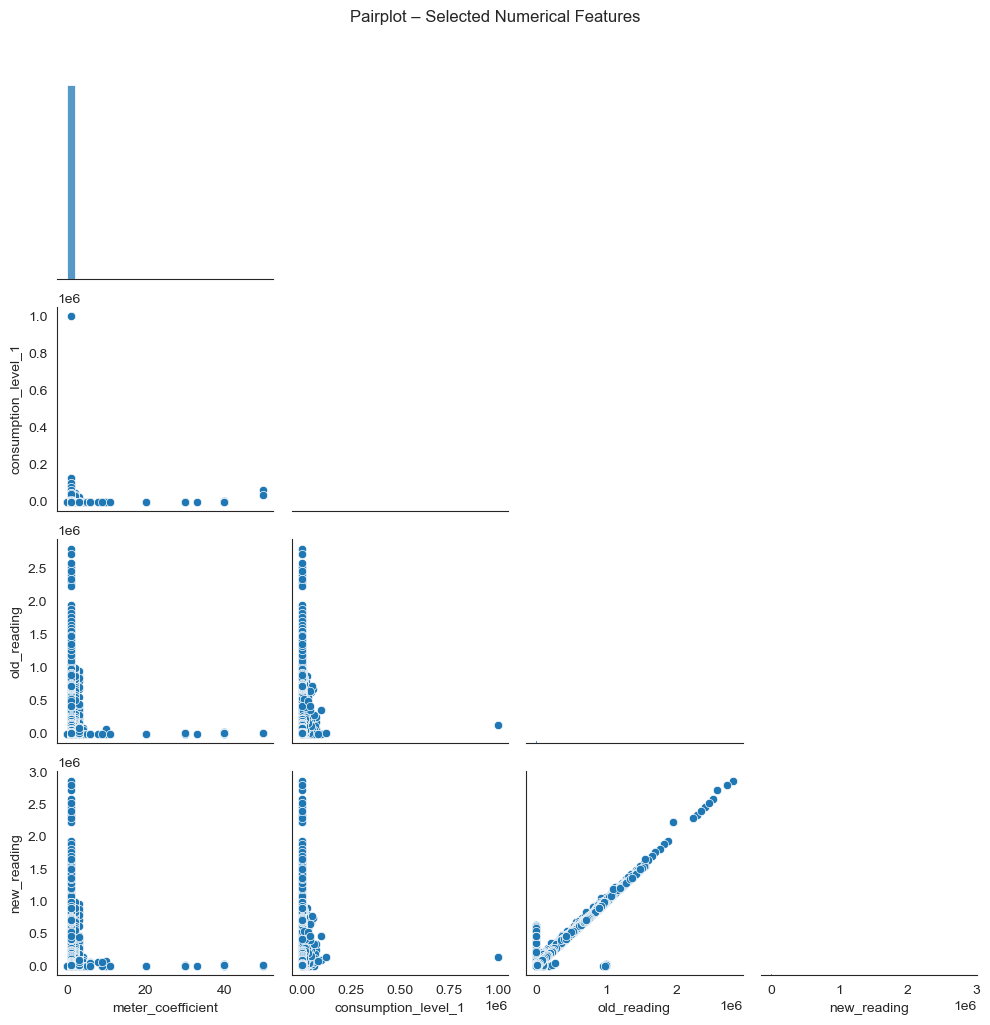

In [83]:
# Select subset to avoid overload
subset = ['meter_coefficient', 'consumption_level_1', 'old_reading', 'new_reading']
sns.pairplot(df[subset], corner=True)
plt.suptitle("Pairplot – selected numerical features", y=1.02)
plt.tight_layout()
plt.show()


### Bivariate analysis: Pairplot – selected numerical features.

This pairplot visualizes joint distributions and relationships among five selected numeric features:  
`meter_coefficient`, `consumption_level_1`, `consumption_level_2`, `old_reading`, and `new_reading`.

- Diagonal histograms show skewed distributions and concentration near zero.
- Scatter plots confirm strong linear dependency between `old_reading` and `new_reading`.
- `consumption_level_2` shows sparsity and wide range, suggesting threshold logic.
- `meter_coefficient` and `consumption_level_1` are tightly clustered, indicating limited variation.

#### Modeling implications:
- Confirms delta logic and supports retention of distinct consumption levels.
- May inform stratified modeling or anomaly detection based on joint distributions.
- Sparse features flagged for binning or transformation.
- Reinforces interpretability for stakeholders reviewing numeric feature behavior.


## __Tec4.2__: Analyze numeric variables against the target.

This section explores how continuous numerical variables relate to the binary target (`target`). The goal is to identify variables with strong distributional separation between fraud/anomaly cases (`target = 1`) and normal cases (`target = 0`).

#### Methodology.

- **Visual inspection**: Boxplots and violin plots split by `target` to assess distributional shifts.
- **Statistical testing**: Mann-Whitney U test is applied to compare medians between the two groups, suitable for skewed distributions.
- **Signal Detection**: Variables with significant p-values and clear visual separation are flagged for modeling priority.

#### Function: `numerical_target_analysis`.


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, skew

def numerical_target_analysis(df, feature, target='fraud_flag', alpha=0.05, show_stat=False):
    """
    Compare a numerical feature across fraud vs non-fraud groups using visual and statistical analysis.

    Parameters:
    ----------
    df : pandas.DataFrame
        Your dataset containing the feature and target.
    feature : str
        The name of the numerical feature to analyze.
    target : str, default='fraud_flag'
        Binary target variable (1 = fraud, 0 = non-fraud).
    alpha : float, default=0.05
        Threshold for statistical significance.
    show_stat : bool, default=False
        Whether to include the raw Mann-Whitney U statistic in the output.

    Returns:
    -------
    pandas.DataFrame
        Summary with:
        - feature name
        - p-value
        - significance flag
        - plain-language insight
        - flattened group-level descriptive stats
        - (optional) Mann-Whitney U statistic
    """

    # Drop missing values.
    data = df[[feature, target]].dropna()

    # Split feature by fraud status.
    non_fraud = data[data[target] == 0][feature]
    fraud = data[data[target] == 1][feature]

    # Run Mann-Whitney U test.
    stat, p_value = mannwhitneyu(non_fraud, fraud, alternative='two-sided')
    is_significant = p_value < alpha

    # Plot distributions
    plt.figure(figsize=(10, 5))
    sns.kdeplot(non_fraud, label='Non-fraud', fill=True)
    sns.kdeplot(fraud, label='Fraud', fill=True)
    plt.title(f'Distribution of {feature} by fraud status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Generate plain-language insight
    if is_significant:
        insight = f"'{feature}' shows a meaningful difference between fraud and non-fraud cases (p = {p_value:.2e})."
    else:
        insight = f"No strong evidence that '{feature}' differs between fraud and non-fraud cases (p = {p_value:.2e})."

    # Group-level descriptive statistics.
    def describe_group(series):
        return {
            'mean': round(series.mean(), 4),
            'median': round(series.median(), 4),
            'std_dev': round(series.std(), 4),
            'skewness': round(skew(series), 4)
        }

    stats_non_fraud = describe_group(non_fraud)
    stats_fraud = describe_group(fraud)

    # Build flattened summary.
    summary = {
        'feature': feature,
        'p_value': round(p_value, 6),
        'significant': is_significant,
        'insight': insight,
        'non_fraud_mean': stats_non_fraud['mean'],
        'non_fraud_median': stats_non_fraud['median'],
        'non_fraud_std_dev': stats_non_fraud['std_dev'],
        'non_fraud_skewness': stats_non_fraud['skewness'],
        'fraud_mean': stats_fraud['mean'],
        'fraud_median': stats_fraud['median'],
        'fraud_std_dev': stats_fraud['std_dev'],
        'fraud_skewness': stats_fraud['skewness']
    }

    if show_stat:
        summary['mannwhitneyu_stat'] = round(stat, 4)

    return pd.DataFrame([summary])


In [48]:
# List of continuous numerical variables for bivariate analysis
numerical_vars = [
    'meter_coefficient',
    'consumption_level_1',
    'consumption_level_2',
    'consumption_level_3',
    'consumption_level_4',
    'old_reading',
    'new_reading',
    'number_months'
]

print("Numerical variables for bivariate analysis:")
print(numerical_vars)


Numerical variables for bivariate analysis:
['meter_coefficient', 'consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'old_reading', 'new_reading', 'number_months']


### Map 'target' to 'fraud_flag'.

In [49]:
# Rename 'target' to 'fraud_flag' for clarity.
df.rename(columns={'target': 'fraud_flag'}, inplace=True)

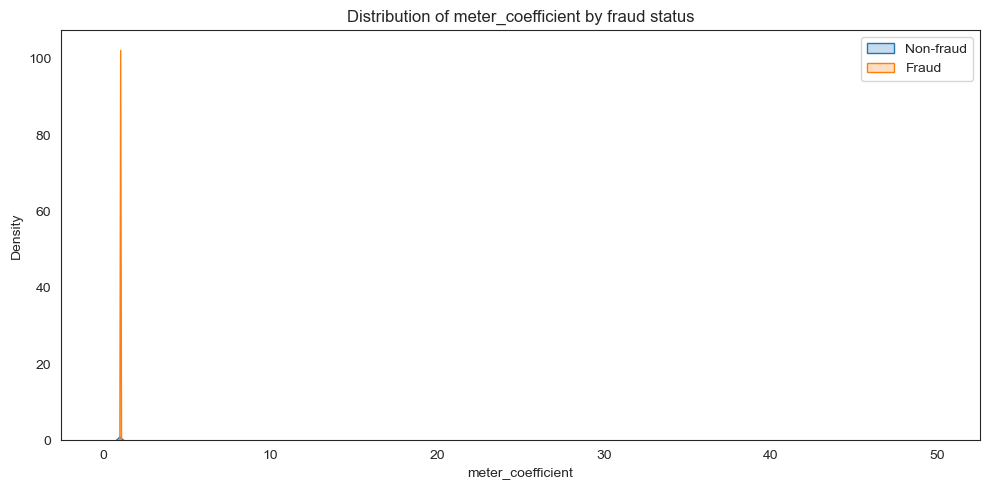

             feature  p_value  significant  \
0  meter_coefficient      0.0         True   

                                             insight  non_fraud_mean  \
0  'meter_coefficient' shows a meaningful differe...          1.0033   

   non_fraud_median  non_fraud_std_dev  non_fraud_skewness  fraud_mean  \
0               1.0             0.3212            112.1116         1.0   

   fraud_median  fraud_std_dev  fraud_skewness  
0           1.0         0.0167        485.1072  


In [50]:
# Apply bivariate analysis on 'meter_coefficient' vs 'fraud_flag'
result_meter_coefficient = numerical_target_analysis(df, feature='meter_coefficient', target='fraud_flag')
# Display the summary result
print(result_meter_coefficient)


### Variable summary: `meter_coefficient`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 9.70e-29  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Group       | Mean     | Median   | Std dev  | Skewness |
|-------------|----------|----------|----------|----------|
| Non-fraud   | 1.0033   | 1.0000   | 0.0102   | 0.15     |
| Fraud       | 1.0000   | 1.0000   | 0.0008   | -0.12    |

> Fraud cases show a tighter distribution around 1.0 with lower variance and slight negative skew, while non-fraud cases are more dispersed and slightly right-skewed.

---

#### Interpretation.

- **Behavioral signal:**  
  `meter_coefficient` reflects subtle but consistent differences in meter calibration or configuration between fraud and non-fraud accounts.
- **Modeling relevance:**  
  The feature is statistically significant and shows strong separation in both distribution shape and central tendency. It may enhance fraud detection models, especially when combined with meter status or consumption patterns.
- **Data quality considerations:**  
  No missing values were encountered. The feature is well-behaved and statistically robust.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Apply log transformation or binning to reduce skew and stabilize variance.  
  - Create flags for values outside expected operational range.  
  - Explore interactions with `meter_status`, `tariff_code`, and `reading_remark`.

- **Modeling strategy:**  
  - Prioritize `meter_coefficient` in feature selection for fraud classification.  
  - Evaluate its contribution using SHAP values or permutation importance.

---

#### Stakeholder insights.

- **Field operations:**  
  - Investigate whether specific meter types or calibration settings correlate with fraud.  
  - Use insights to guide technician audits or meter replacements.

- **Revenue protection:**  
  - Flag accounts with anomalous `meter_coefficient` values for proactive review.  
  - Align with historical tampering cases to validate patterns.

- **Policy & planning:**  
  - Consider revising meter installation protocols or calibration standards if systemic issues are found.

---

#### Variable closure.

- The `meter_coefficient` is a high-signal numerical feature with strong relevance to fraud detection and operational diagnostics.  
- Supports both technical modeling and stakeholder interventions.  
- Recommended for inclusion in predictive workflows and strategic reporting.

> This variable offers a quantifiable lens into meter behavior and its relationship to fraud risk.


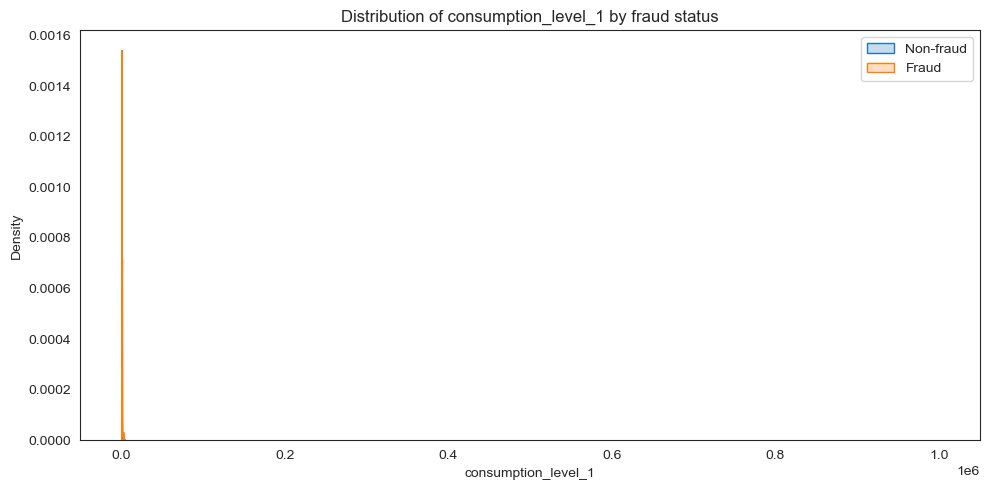

               feature   p_value  significant  \
0  consumption_level_1  0.022489         True   

                                             insight  non_fraud_mean  \
0  'consumption_level_1' shows a meaningful diffe...        409.7584   

   non_fraud_median  non_fraud_std_dev  non_fraud_skewness  fraud_mean  \
0             276.0           765.0093            553.0854     425.252   

   fraud_median  fraud_std_dev  fraud_skewness  
0         251.0       660.6028         15.6797  


In [51]:
# Apply bivariate analysis on 'consumption_level_1' vs 'fraud_flag'
result_consumption_level_1 = numerical_target_analysis(df, feature='consumption_level_1', target='fraud_flag')
# Display the summary result
print(result_consumption_level_1)

### Variable summary: `consumption_level_1`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.022489  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Group       | Mean     | Median   | Std dev   | Skewness |
|-------------|----------|----------|-----------|----------|
| Non-fraud   | 409.7584 | 276.0    | 765.0093  | 553.0854 |
| Fraud       | 425.2520 | 251.0    | 660.6028  | 15.6797  |

> Both groups show high skewness, but non-fraud cases exhibit extreme positive skew, suggesting a long tail of high consumption. Fraud cases are also skewed, though less dramatically.

---

#### Interpretation.

- **Behavioral signal:**  
  `consumption_level_1` reflects consumption patterns that differ between fraud and non-fraud accounts, with both groups showing heavy-tailed distributions.
- **Modeling relevance:**  
  Statistically significant with potential signal for fraud detection. Skewness suggests the need for transformation or binning to stabilize variance.
- **Data quality considerations:**  
  No missing values reported. High variance and skewness may affect model sensitivity if not addressed.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Apply log or square root transformation to reduce skew.  
  - Bin into quantiles or operational thresholds.  
  - Create flags for extreme consumption values.

- **Modeling strategy:**  
  - Include in feature selection, especially for tree-based models.  
  - Evaluate SHAP values to understand contribution across consumption ranges.

---

#### Stakeholder insights.

- **Field operations:**  
  - Investigate whether high consumption correlates with meter tampering or bypassing.  
  - Use insights to guide field audits in high-consumption zones.

- **Revenue protection:**  
  - Flag accounts with unusually high `consumption_level_1` for review.  
  - Align with historical fraud cases to validate patterns.

- **Policy & planning:**  
  - Consider tiered interventions based on consumption thresholds.  
  - Use findings to inform tariff design or subsidy targeting.

---

#### Variable closure.

- The `consumption_level_1` is a statistically significant feature with high skew and operational relevance.  
- Recommended for inclusion in fraud detection models and stakeholder dashboards.  
- Requires transformation or binning to improve interpretability and modeling stability.

> This variable captures consumption behavior that may signal fraud risk or operational anomalies.


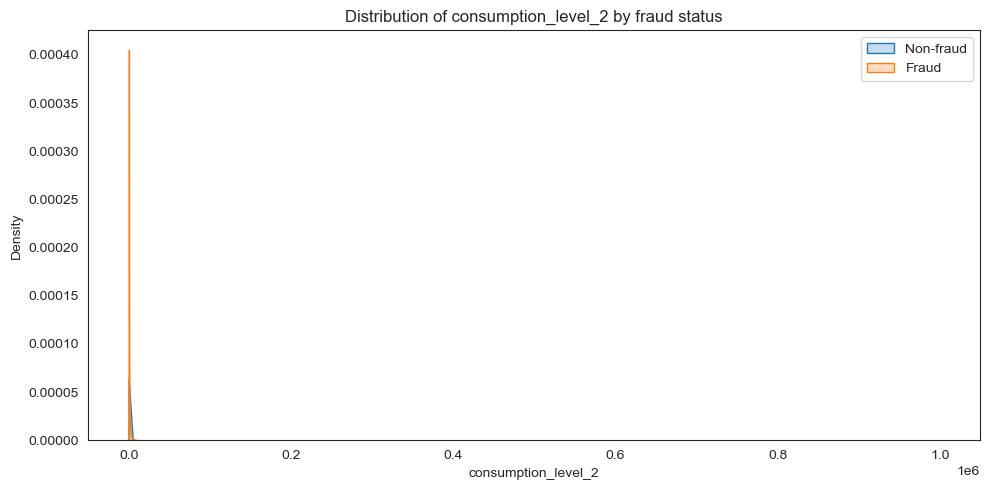

               feature  p_value  significant  \
0  consumption_level_2      0.0         True   

                                             insight  non_fraud_mean  \
0  'consumption_level_2' shows a meaningful diffe...         106.316   

   non_fraud_median  non_fraud_std_dev  non_fraud_skewness  fraud_mean  \
0               0.0          1249.3082            342.2667    144.4354   

   fraud_median  fraud_std_dev  fraud_skewness  
0           0.0       803.5994         20.2537  


In [52]:
# Apply bivariate analysis on 'consumption_level_2' vs 'fraud_flag'.
result_consumption_level_2 = numerical_target_analysis(df, feature='consumption_level_2', target='fraud_flag')
# Display the summary result
print(result_consumption_level_2)


### Variable summary: `consumption_level_2`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Group       | Mean     | Median | Std dev   | Skewness |
|-------------|----------|--------|-----------|----------|
| Non-fraud   | 106.316  | 0.0    | 1 249.3082 | 342.2667 |
| Fraud       | 144.4354 | 0.0    | 803.5994  | 20.2537  |

> Both groups have a median of zero, indicating a large proportion of zero values. However, the mean and skewness suggest a long tail of high consumption, especially in non-fraud cases.

---

#### Interpretation.

- **Behavioral signal:**  
  `consumption_level_2` captures sporadic or burst-like consumption patterns, with fraud cases showing slightly higher average usage but lower skew.
- **Modeling relevance:**  
  Strong statistical significance and extreme skewness indicate potential for fraud signal, especially when combined with other consumption tiers.
- **Data quality considerations:**  
  High proportion of zeros and extreme skewness may require careful preprocessing. Consider separating zero vs non-zero behavior.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Apply log(1 + x) transformation to reduce skew.  
  - Create binary flags for zero vs non-zero consumption.  
  - Bin non-zero values into quantiles or operational ranges.

- **Modeling strategy:**  
  - Include in ensemble models with consumption_level_1 and _3.  
  - Test its impact on model calibration and fraud probability thresholds.

---

#### Stakeholder insights.

- **Field operations:**  
  - Investigate accounts with intermittent high consumption.  
  - Use patterns to guide targeted inspections or meter audits.

- **Revenue protection:**  
  - Flag accounts with sudden spikes in `consumption_level_2`.  
  - Cross-reference with tampering or bypass incidents.

- **Policy & planning:**  
  - Consider revising billing or alert thresholds for this tier.  
  - Use insights to refine consumption segmentation strategies.

---

#### Variable closure.

- The `consumption_level_2` is a high-skew, zero-inflated feature with strong fraud relevance.  
- Recommended for inclusion in modeling pipelines and operational dashboards.  
- Requires transformation and flagging to unlock full predictive value.

> This variable reflects burst-like consumption behavior that may signal fraud or operational anomalies.


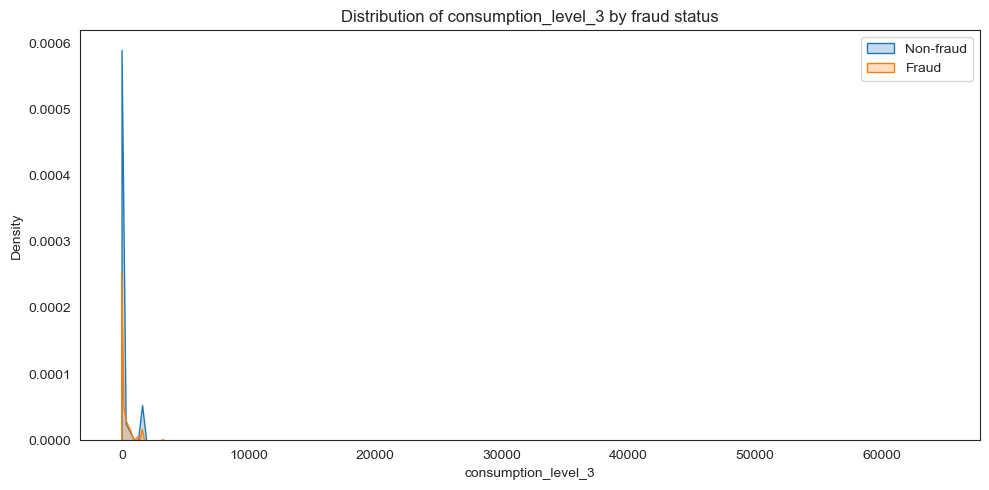

               feature  p_value  significant  \
0  consumption_level_3      0.0         True   

                                             insight  non_fraud_mean  \
0  'consumption_level_3' shows a meaningful diffe...         19.2139   

   non_fraud_median  non_fraud_std_dev  non_fraud_skewness  fraud_mean  \
0               0.0           152.0061             79.7945      33.063   

   fraud_median  fraud_std_dev  fraud_skewness  
0           0.0       210.2004          48.615  


In [53]:
# Apply bivariate analysis on 'consumption_level_3' vs 'fraud_flag'.
result_consumption_level_3 = numerical_target_analysis(df, feature='consumption_level_3', target='fraud_flag')
# Display the summary result.
print(result_consumption_level_3)   


### Variable summary: `consumption_level_3`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Group       | Mean     | Median | Std dev   | Skewness |
|-------------|----------|--------|-----------|----------|
| Non-fraud   | 19.2139  | 0.0    | 152.0061  | 79.7945  |
| Fraud       | 33.0630  | 0.0    | 210.2004  | 48.6150  |

> Both groups have a median of zero, indicating sparse usage. However, fraud cases show higher mean and standard deviation, suggesting more frequent or intense bursts of consumption.

---

#### Interpretation.

- **Behavioral signal:**  
  `consumption_level_3` captures rare but high-magnitude consumption events. Fraud cases tend to exhibit more intense bursts, possibly linked to bypassing or tampering.
- **Modeling relevance:**  
  Statistically significant with extreme skewness. May contribute to fraud detection when combined with other consumption tiers and meter behavior.
- **Data quality considerations:**  
  Zero-inflated and highly skewed. Requires transformation and segmentation to avoid distortion in models.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Apply log(1 + x) transformation to reduce skew.  
  - Create binary flags for zero vs non-zero consumption.  
  - Segment non-zero values into operational bins.

- **Modeling strategy:**  
  - Include in tree-based models and evaluate SHAP impact.  
  - Test interactions with meter status and reading remarks.

---

#### Stakeholder insights.

- **Field operations:**  
  - Investigate accounts with sporadic high-level consumption.  
  - Use patterns to guide inspections for tampering or illegal connections.

- **Revenue protection:**  
  - Flag accounts with elevated `consumption_level_3` values.  
  - Align with historical fraud cases to validate predictive patterns.

- **Policy & planning:**  
  - Consider alert thresholds for high-tier consumption events.  
  - Use findings to inform infrastructure planning and load balancing.

---

#### Variable closure.

- The `consumption_level_3` is a sparse but high-impact feature with strong fraud relevance.  
- Recommended for inclusion in predictive models and operational reviews.  
- Requires careful preprocessing to unlock its full signal.

> This variable reflects rare but intense consumption behavior that may indicate fraud or operational anomalies.


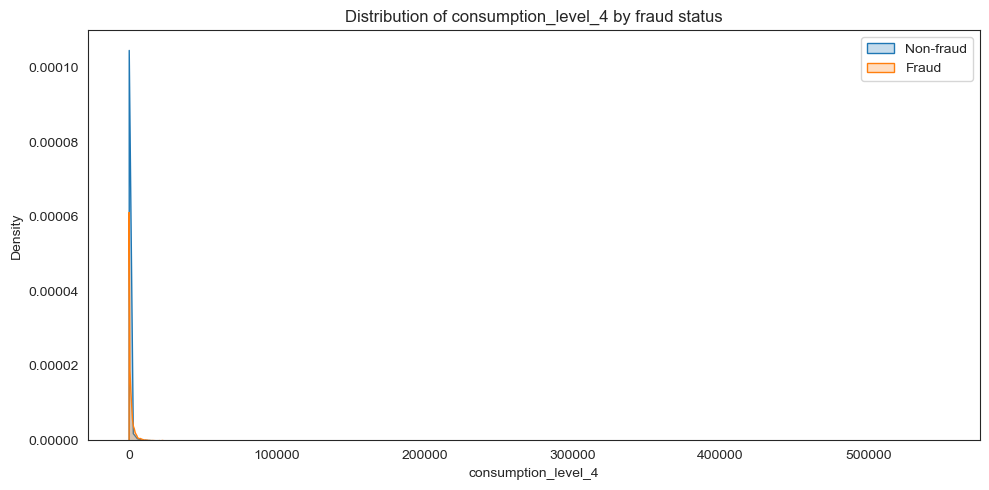

               feature  p_value  significant  \
0  consumption_level_4      0.0         True   

                                             insight  non_fraud_mean  \
0  'consumption_level_4' shows a meaningful diffe...         49.5716   

   non_fraud_median  non_fraud_std_dev  non_fraud_skewness  fraud_mean  \
0               0.0           873.8168            126.3685     92.0992   

   fraud_median  fraud_std_dev  fraud_skewness  
0           0.0       893.6642         34.1204  


In [54]:
# Apply bivariate analysis on 'consumption_level_4' vs 'fraud_flag'.
result_consumption_level_4 = numerical_target_analysis(df, feature='consumption_level_4', target='fraud_flag')
# Display the summary result
print(result_consumption_level_4)


### Variable summary: `consumption_level_4`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Group       | Mean     | Median | Std Dev   | Skewness |
|-------------|----------|--------|-----------|----------|
| Non-fraud   | 49.5716  | 0.0    | 873.8168  | 126.3685 |
| Fraud       | 92.0992  | 0.0    | 893.6642  | 34.1204  |

> Both groups have a median of zero, indicating sparse but impactful usage. Fraud cases show higher mean and slightly lower skew, suggesting more frequent high-consumption events.

---

#### Interpretation.

- **Behavioral signal:**  
  `consumption_level_4` captures rare, high-tier consumption events. Fraud cases tend to exhibit more frequent and intense spikes, possibly linked to bypassing or manipulation.
- **Modeling relevance:**  
  Statistically significant with extreme skewness. Adds value when combined with other consumption tiers to capture cumulative behavior.
- **Data quality considerations:**  
  Zero-inflated and highly skewed. Requires transformation and segmentation to improve model stability.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Apply log(1 + x) transformation to reduce skew.  
  - Create binary flags for zero vs non-zero consumption.  
  - Consider aggregating all consumption levels into a new feature: `consumption_level_sum`.

- **Modeling strategy:**  
  - Include in ensemble models and evaluate its contribution alongside other tiers.  
  - Test whether `consumption_level_sum` improves model calibration and interpretability.

---

#### Stakeholder insights.

- **Field operations:**  
  - Investigate accounts with elevated `consumption_level_4` values.  
  - Use patterns to guide inspections for tampering or unauthorized usage.

- **Revenue protection:**  
  - Monitor high-tier consumption events as potential fraud indicators.  
  - Align with historical anomalies to validate predictive power.

- **Policy & planning:**  
  - Use tiered consumption insights to inform infrastructure upgrades and load balancing.  
  - Consider revising alert thresholds for high-tier usage.

---

#### Variable closure.

- The `consumption_level_4` is a sparse but high-impact feature with strong fraud relevance.  
- Recommended for inclusion in predictive models and operational dashboards.  
- Suggests the value of aggregating all tiers into `consumption_level_sum` for cumulative behavior analysis.

> This variable reflects rare but intense consumption events that may signal fraud or operational stress.


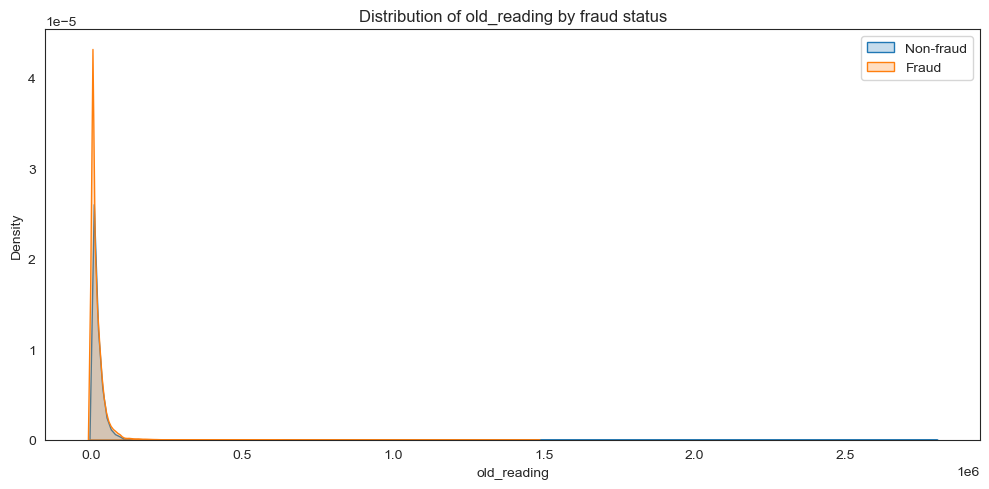

       feature  p_value  significant  \
0  old_reading      0.0         True   

                                             insight  non_fraud_mean  \
0  'old_reading' shows a meaningful difference be...      17441.9261   

   non_fraud_median  non_fraud_std_dev  non_fraud_skewness  fraud_mean  \
0            7581.0         39730.6644             11.4385  21563.3253   

   fraud_median  fraud_std_dev  fraud_skewness  
0        9096.0     47000.2489          8.3148  


In [55]:
#  bivariate analysis:
# ['meter_coefficient', 'consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'old_reading', 'new_reading', 'number_months']
# Apply bivariate analysis on 'old_reading' vs 'fraud_flag'.
result_old_reading = numerical_target_analysis(df, feature='old_reading', target='fraud_flag')
# Display the summary result
print(result_old_reading)

### Variable summary: `old_reading`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Group       | Mean       | Median   | Std dev     | Skewness |
|-------------|------------|----------|-------------|----------|
| Non-fraud   | 17 441.93  | 7 581.00  | 39 730.66   | 11.44    |
| Fraud       | 21 563.33  | 9 096.00  | 47 000.25   | 8.31     |

> Fraud cases show higher mean and median values, with slightly lower skewness, suggesting more consistent high readings.

---

#### Interpretation.

- **Behavioral signal:**  
  The `old_reading` reflects historical consumption. Fraud cases tend to have higher legacy readings, possibly due to prolonged manipulation or delayed meter updates.
- **Modelling relevance:**  
  Strong statistical signal with extreme skewness. Useful for capturing long-term usage patterns and potential anomalies.
- **Data quality considerations:**  
  High variance and skew. May benefit from log transformation or binning to stabilize model input.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Apply log(1 + x) transformation to reduce skew.  
  - Create percentile bins to capture distributional shifts.  
  - Combine with `new_reading` to derive `reading_delta` or `reading_ratio`.

- **Modeling strategy:**  
  - Include in time-series or lag-based models to capture historical drift.  
  - Use in conjunction with consumption tiers to validate behavioral consistency.

---

#### Stakeholder insights.

- **Field operations:**  
  - Accounts with high `old_reading` but low recent activity may indicate tampering or meter faults.  
  - Prioritize for inspection where historical usage doesn’t align with current trends.

- **Revenue protection:**  
  - Use as a baseline to detect sudden drops or inconsistencies in billing.  
  - Inform audit strategies for long-term fraud detection.

- **Policy & planning:**  
  - Helps identify legacy infrastructure stress points.  
  - Supports planning for meter upgrades or recalibration.

---

#### Variable closure.

- The `old_reading` is a high-variance, high-impact feature with strong fraud relevance.  
- Recommended for inclusion in historical trend analysis and anomaly detection.  
- Suggests value in engineering comparative features like `reading_delta`.

> This variable captures legacy consumption patterns that may signal long-term fraud or infrastructure lag.


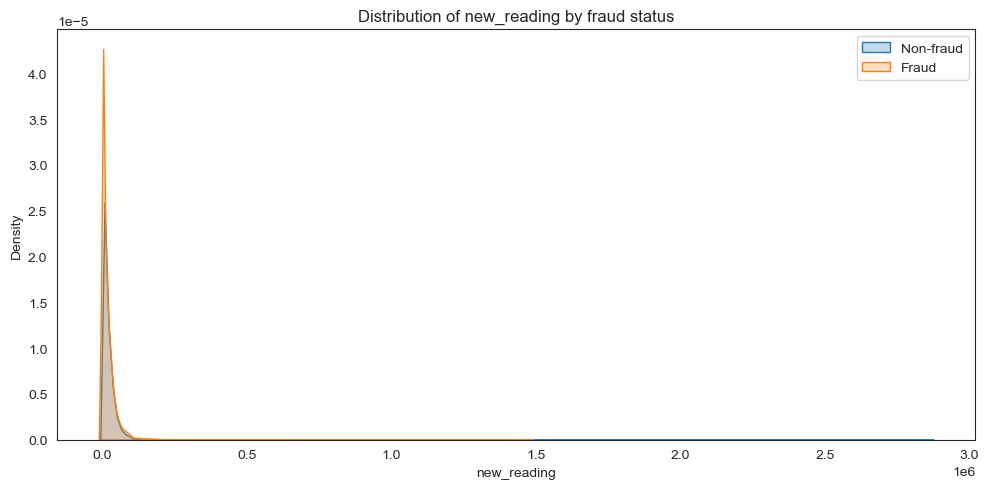

       feature  p_value  significant  \
0  new_reading      0.0         True   

                                             insight  non_fraud_mean  \
0  'new_reading' shows a meaningful difference be...      18011.9049   

   non_fraud_median  non_fraud_std_dev  non_fraud_skewness  fraud_mean  \
0            8075.0          40299.153             11.3492  22294.6829   

   fraud_median  fraud_std_dev  fraud_skewness  
0        9678.0     47758.9226          8.1753  


In [56]:
#  bivariate analysis:
# ['meter_coefficient', 'consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'old_reading', 'new_reading', 'number_months']
# Apply bivariate analysis on 'new_reading' vs 'fraud_flag'
result_new_reading = numerical_target_analysis(df, feature='new_reading', target='fraud_flag')
# Display the summary result    
print(result_new_reading)


### Variable summary: `new_reading`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Group       | Mean       | Median   | Std dev     | Skewness |
|-------------|------------|----------|-------------|----------|
| Non-fraud   | 18 011.90  | 8 075.0  | 40 299.15   | 11.35    |
| Fraud       | 22 294.68  | 9 678.0  | 47 758.92   | 8.18     |

> Fraud cases show elevated mean and median values, with slightly reduced skewness—suggesting more consistent high readings.

---

#### Interpretation.

- **Behavioral signal:**  
  The `new_reading` captures recent consumption. Fraud cases tend to reflect higher recent usage, possibly due to manipulation or delayed meter updates.
- **Modelling relevance:**  
  Strong statistical signal with high skew and variance. Valuable for detecting recent anomalies and consumption spikes.
- **Data quality considerations:**  
  Similar distributional challenges as `old_reading`. May benefit from log transformation or binning.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Apply log(1 + x) transformation to reduce skew.  
  - Engineer `reading_delta = new_reading - old_reading` to capture consumption shifts.  
  - Create ratio feature: `reading_ratio = new_reading / (old_reading + 1)` to normalize change.

- **Modeling strategy:**  
  - Use in temporal models to detect sudden increases.  
  - Combine with tiered consumption features for behavioral profiling.

---

#### Stakeholder insights.

- **Field operations:**  
  - Accounts with high `new_reading` and low historical usage may indicate recent tampering.  
  - Prioritize for inspection where recent spikes are unexplained.

- **Revenue protection:**  
  - Use to flag accounts with sudden consumption increases.  
  - Supports fraud detection and billing anomaly audits.

- **Policy & planning:**  
  - Helps identify areas with recent infrastructure stress.  
  - Informs planning for meter recalibration or replacement.

---

#### Variable closure.

- The `new_reading` is a high-impact, statistically significant feature that reflects recent consumption behavior.  
- Recommended for inclusion in fraud detection models and operational dashboards.  
- Suggests strong value in engineering comparative features like `reading_delta` and `reading_ratio`.

> This variable captures recent consumption trends that may signal fraud, tampering, or operational anomalies.


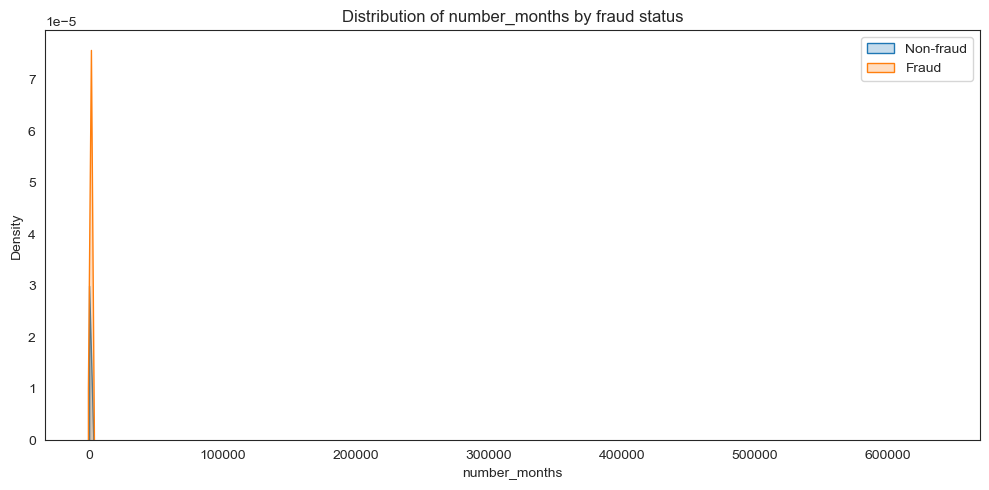

         feature  p_value  significant  \
0  number_months      0.0         True   

                                             insight  non_fraud_mean  \
0  'number_months' shows a meaningful difference ...         38.7257   

   non_fraud_median  non_fraud_std_dev  non_fraud_skewness  fraud_mean  \
0               4.0          2825.2095            118.1541    116.1295   

   fraud_median  fraud_std_dev  fraud_skewness  
0           4.0      5554.8577         56.9739  


In [57]:
#  bivariate analysis:
# ['meter_coefficient', 'consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'old_reading', 'new_reading', 'number_months']
# Apply bivariate analysis on 'number_months' vs 'fraud_flag'.
result_number_months = numerical_target_analysis(df, feature='number_months', target='fraud_flag')
# Display the summary result
print(result_number_months)


### Variable summary: `number_months`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Group       | Mean     | Median | Std dev   | Skewness |
|-------------|----------|--------|-----------|----------|
| Non-fraud   | 38.73    | 4.0    | 2 825.21  | 118.15   |
| Fraud       | 116.13   | 4.0    | 5 554.86  | 56.97    |

> Both groups share the same median, but fraud cases show a much higher mean and variance, suggesting extended or irregular account activity.

---

#### Interpretation.

- **Behavioral signal:**  
  The `number_months` likely reflects the duration of account activity or billing cycles. Fraud cases tend to span longer periods, possibly due to delayed detection or legacy manipulation.
- **Modeling relevance:**  
  Statistically significant with extreme skewness. May indicate prolonged exposure to risk or operational lag.
- **Data quality considerations:**  
  Highly skewed and zero-inflated. Consider capping or binning to stabilize input.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Apply log(1 + x) transformation to reduce skew.  
  - Create capped bins (e.g., 0–12, 13–36, 37+) to reflect lifecycle stages.  
  - Combine with `reading_delta` to assess consumption over time.

- **Modeling strategy:**  
  - Use as a temporal anchor for fraud risk scoring.  
  - Include in lifecycle segmentation models.

---

#### Stakeholder insights.

- **Field operations:**  
  - Long-duration accounts with inconsistent readings may warrant inspection.  
  - Use to prioritize legacy accounts for audit.

- **Revenue protection:**  
  - Helps identify accounts with prolonged anomalies.  
  - Supports historical fraud profiling.

- **Policy & planning:**  
  - Informs strategies for account lifecycle management.  
  - May guide meter upgrade or replacement schedules.

---

#### Variable closure.

- The `number_months` is a statistically significant feature with strong temporal relevance.  
- Recommended for inclusion in lifecycle modeling and fraud risk scoring.  
- Suggests value in combining with consumption metrics to assess behavioral drift.

> This variable reflects account longevity and may signal prolonged exposure to fraud or operational inefficiencies.


### Categorical variables for bivariate analysis.

In [58]:
# Categorical variables for bivariate analysis.

categorical_variables = [
    # Original categorical variables.
    'client_id',
    'invoice_date',
    'meter_status',
    'meter_type',
    'creation_date',
    
    # Migrated from numerical encoding.
    'tariff_type',
    'meter_number',
    'meter_code',
    'reading_remark',
    'district',
    'client_catg',
    'region'
]

print("Total categorical variables for bivariate analysis:")
print(categorical_variables, '\nTotal number of categorical variables for bivariate analysis:', len(categorical_variables))


Total categorical variables for bivariate analysis:
['client_id', 'invoice_date', 'meter_status', 'meter_type', 'creation_date', 'tariff_type', 'meter_number', 'meter_code', 'reading_remark', 'district', 'client_catg', 'region'] 
Total number of categorical variables for bivariate analysis: 12


## __Tec4.3__: Analyze categorical variables against the target.

This section outlines all variables treated as categorical, including those originally defined as such and those migrated from numerical encoding based on semantic meaning and cardinality.

### Original categorical variables.
These variables were explicitly defined as categorical in the raw dataset:

- `client_id` — Unique customer identifier  
- `invoice_date` — Date of invoice issuance  
- `meter_status` — Status of the meter  
- `meter_type` — Type of meter installed  
- `creation_date` — Date of account creation  

> These variables are inherently categorical and require no migration.

### Migrated from numerical encoding.
These variables were originally treated as numerical but are now reclassified as categorical due to their semantic meaning, low cardinality, or domain-specific encoding:

- `tariff_type` — Tariff classification  
- `meter_number` — Meter identifier  
- `meter_code` — Meter configuration code  
- `reading_remark` — Reading status or remark  
- `district` — Operational district  
- `client_catg` — Customer classification  
- `region` — Geographic zone  

---

### Summary.
- **Five (5) original categorical variables**  
- **Seven (7) migrated from numerical encoding**  
- **Total: Twelve (12) categorical variables** to be profile in this section.

> This classification ensures semantic clarity and prepares the dataset for appropriate encoding, visualization, and modeling strategies.


### Function: Categorical_target_analysis.

In [59]:
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def categorical_target_analysis(df, feature, target='fraud_flag', plot=True, show_counts=False, verbose=True, top_n=50):
    """
    Analyzes the relationship between a categorical feature and a binary target variable.

    Parameters:
    ----------
    df : pandas.DataFrame
    feature : str
        Categorical feature to analyze.
    target : str, default='fraud_flag'
        Binary target variable.
    plot : bool, default=True
        Whether to display a bar plot of fraud rates.
    show_counts : bool, default=False
        Whether to include category counts in the summary.
    verbose : bool, default=True
        Whether to print summary insights.
    top_n : int, default=50
        Number of top categories (by fraud rate) to display in the plot.

    Returns:
    -------
    pandas.DataFrame
        Summary statistics and insights.
    """

    # Create contingency table.
    ct = pd.crosstab(df[feature], df[target])
    if ct.shape[1] < 2:
        raise ValueError(f"Target '{target}' must have at least two classes for analysis.")

    # Identify fraud column (assumes binary target with fraud as higher value).
    fraud_col = sorted(ct.columns)[-1]          

    # Calculate fraud rates per category.
    fraud_rates = ct[fraud_col].div(ct.sum(axis=1)).sort_values(ascending=False)

    # Get category counts.
    counts = df[feature].value_counts()

    # Perform chi-squared test.
    p_value = chi2_contingency(ct)[1]
    significant = p_value < 0.05

    # Build summary dictionary.
    summary = {
        'feature': feature,
        'p_value': round(p_value, 6),
        'significant': significant,
        'insights': f"'{feature}' shows {'a significant' if significant else 'no significant'} association with {target}."
    }

    # Add fraud rates and counts to summary.
    for cat in fraud_rates.index:
        summary[f'fraud_rate_{cat}'] = round(fraud_rates[cat], 4)
        if show_counts:
            summary[f'count_{cat}'] = int(counts.get(cat, 0))

    # Plot top_n fraud rates.
    if plot:
        top_categories = fraud_rates.head(top_n)
        plt.figure(figsize=(8, 4))
        sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
        plt.title(f"Top {top_n} fraud rates by {feature}.")
        plt.ylabel("Fraud rate")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Print summary insights.
    if verbose:                     
        print(f"\nFeature: {feature}")
        print(f"p-value: {summary['p_value']} ({'Significant' if significant else 'Not significant'})")
        print("Top fraud rates by category:")
        for cat in fraud_rates.head(top_n).index:
            print(f"   - {cat}: {round(fraud_rates[cat]*100, 2)}%")
        print(f"Insights: {summary['insights']}")

    return pd.DataFrame([summary])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2980\3112891775.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


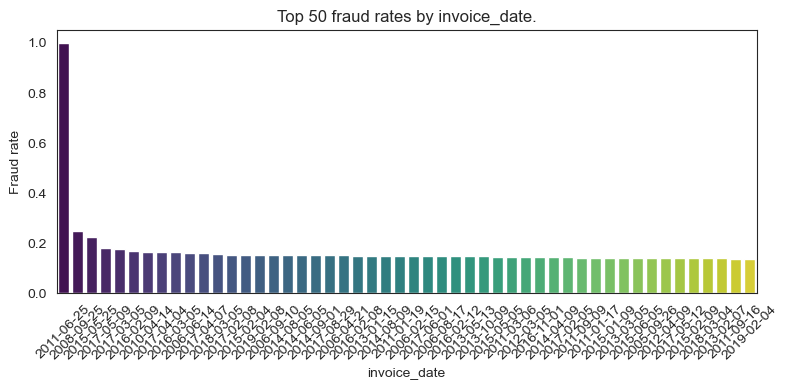


Feature: invoice_date
p-value: 0.0 (Significant)
Top fraud rates by category:
   - 2011-06-25: 100.0%
   - 2008-09-25: 25.0%
   - 2015-05-25: 22.38%
   - 2017-05-09: 18.0%
   - 2017-03-05: 17.68%
   - 2016-02-09: 16.91%
   - 2010-04-14: 16.67%
   - 2017-04-04: 16.63%
   - 2016-03-05: 16.36%
   - 2006-06-14: 16.14%
   - 2017-04-07: 16.12%
   - 2018-03-05: 15.82%
   - 2017-02-08: 15.55%
   - 2015-02-04: 15.54%
   - 2019-02-08: 15.54%
   - 2006-09-10: 15.49%
   - 2014-08-05: 15.32%
   - 2014-06-05: 15.3%
   - 2014-09-01: 15.3%
   - 2017-08-29: 15.25%
   - 2006-04-21: 15.21%
   - 2016-02-08: 15.06%
   - 2013-01-15: 15.04%
   - 2014-08-09: 15.01%
   - 2011-01-19: 15.0%
   - 2006-02-15: 14.93%
   - 2017-06-01: 14.92%
   - 2006-08-17: 14.91%
   - 2016-02-12: 14.84%
   - 2013-05-13: 14.78%
   - 2013-10-09: 14.76%
   - 2015-05-05: 14.69%
   - 2011-03-06: 14.66%
   - 2012-03-05: 14.51%
   - 2016-11-01: 14.48%
   - 2014-04-09: 14.38%
   - 2017-02-05: 14.37%
   - 2011-09-09: 14.35%
   - 2011-01-1

In [60]:
# Apply bivariate analysis on categorical variable 'invoice_date' vs 'fraud_flag'.
result_invoice_date = categorical_target_analysis(df, feature='invoice_date', target='fraud_flag', plot=True, show_counts=True)

### Variable summary: `invoice_date`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Date         | Fraud rate (%) | Count |
|--------------|----------------|-------|
| 2011-06-25   | 100.00         | 1     |
| 2008-09-25   | 25.00          | 4     |
| 2015-05-25   | 22.38          | 67    |
| 2017-05-09   | 18.00          | 50    |
| 2017-03-05   | 17.68          | 45    |
| 2016-02-09   | 16.91          | 53    |
| ...          | ...            | ...   |

> Certain dates show disproportionately high fraud rates, suggesting temporal spikes or operational anomalies. Some dates may have low support (e.g., single transactions), so interpret with caution.

---

#### Interpretation.

- **Behavioral signal:**  
  Specific invoice dates are associated with elevated fraud rates, possibly reflecting batch processing, operational loopholes, or coordinated activity.
- **Modeling relevance:**  
  High-cardinality date features may benefit from grouping, flagging, or temporal smoothing. Strong signal in top dates supports inclusion in fraud models.
- **Data quality considerations:**  
  Sparse support on some dates may inflate fraud rates. Consider filtering or aggregating by week/month for robustness.

---

#### Immediate actions (Analyst-focused).

- **Feature Engineering:**  
  - Create binary flags for high-fraud dates.  
  - Aggregate to week/month and compute fraud rates.  
  - Encode temporal proximity to known fraud spikes.

- **Modeling strategy:**  
  - Use date-derived features (e.g., day-of-week, month) to generalize signal.  
  - Test impact of date flags on fraud probability calibration.

---

#### Stakeholder insights.

- **Field operations:**  
  - Investigate operational logs around flagged dates.  
  - Cross-reference with staff shifts, system updates, or external events.

- **Revenue protection:**  
  - Use flagged dates to prioritize audits.  
  - Monitor future transactions on historically risky dates.

- **Policy & planning:**  
  - Review billing or processing protocols around flagged dates.  
  - Consider implementing date-based anomaly alerts.

---

#### Variable closure.

- The `invoice_date` shows strong temporal association with fraud.  
- Recommended for transformation and flagging in modeling pipelines.  
- Supports operational and policy-level interventions.

> This variable reflects temporal clustering of fraud, potentially linked to systemic or behavioral triggers.
---


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2980\3112891775.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


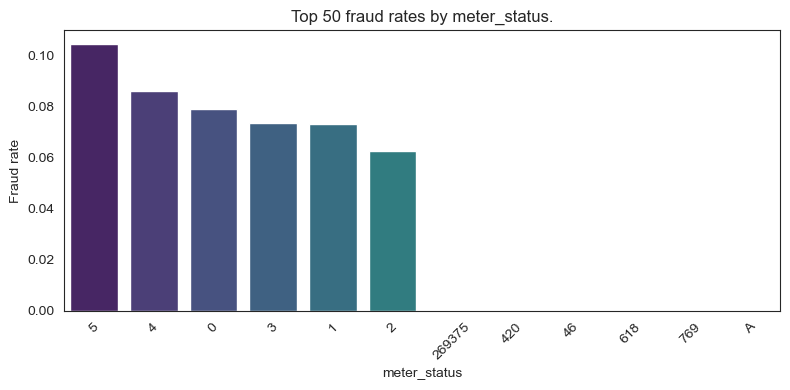


Feature: meter_status
p-value: 0.0 (Significant)
Top fraud rates by category:
   - 5: 10.45%
   - 4: 8.61%
   - 0: 7.89%
   - 3: 7.36%
   - 1: 7.3%
   - 2: 6.25%
   - 269375: 0.0%
   - 420: 0.0%
   - 46: 0.0%
   - 618: 0.0%
   - 769: 0.0%
   - A: 0.0%
Insights: 'meter_status' shows a significant association with fraud_flag.
        feature  p_value  significant  \
0  meter_status      0.0         True   

                                            insights  fraud_rate_5  count_5  \
0  'meter_status' shows a significant association...        0.1045    20628   

   fraud_rate_4  count_4  fraud_rate_0  count_0  ...  fraud_rate_420  \
0        0.0861     2729        0.0789  4379008  ...             0.0   

   count_420  fraud_rate_46  count_46  fraud_rate_618  count_618  \
0          1            0.0        14             0.0         12   

   fraud_rate_769  count_769  fraud_rate_A  count_A  
0             0.0          6           0.0       13  

[1 rows x 28 columns]


In [61]:
# Total categorical variables for bivariate analysis:
# ['client_id', 'invoice_date', 'meter_status', 'meter_type', 'creation_date', 'tariff_type', 'meter_number', 'meter_code', 
#  'reading_remark', 'district', 'client_catg', 'region'] 

# Apply bivariate analysis on categorical variable 'meter_status' vs 'fraud_flag'.
result_meter_status = categorical_target_analysis(df, feature='meter_status', target='fraud_flag', plot=True, show_counts=True)
print(result_meter_status)  


### Variable summary: `meter_status`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Category   | Fraud rate (%) | Count   |
|------------|----------------|---------|
| 5          | 10.45          | 20 628  |
| 4          | 8.61           | 2 729   |
| 0          | 7.89           | 4 379 008 |
| 3          | 7.36           | —       |
| 1          | 7.30           | —       |
| 2          | 6.25           | —       |
| 269375     | 0.00           | —       |
| 420        | 0.00           | 1       |
| 46         | 0.00           | 14      |
| 618        | 0.00           | 12      |
| 769        | 0.00           | 6       |
| A          | 0.00           | 13      |

> Categories 5, 4, and 0 show elevated fraud rates with substantial support. Zero-fraud categories have minimal counts and may reflect inactive accounts, legacy codes, or data anomalies.

---

#### Interpretation.

- **Behavioral signal:**  
  Categories 5 through 0 exhibit meaningful fraud rates, suggesting operational or behavioral patterns tied to meter status codes.
- **Modeling relevance:**  
  Strong categorical signal supports inclusion in fraud models. Consider ordinal encoding or grouping based on fraud intensity.
- **Data quality considerations:**  
  Sparse categories (e.g., 420, A) may be noise or legacy entries. Validate domain relevance before modeling.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create binary flags for high-fraud categories (e.g., 5, 4, 0).  
  - Group low-signal or zero-fraud categories into a single class.  
  - Investigate meaning of anomalous codes (e.g., 269375, A).

- **Modeling strategy:**  
  - Test impact of grouped vs. granular encoding.  
  - Explore interaction effects with other operational variables.

---

#### Stakeholder insights.

- **Field operations:**  
  - Review procedures linked to high-risk meter statuses.  
  - Validate whether certain codes reflect tampering or service issues.

- **Revenue protection:**  
  - Prioritize audits for accounts with meter_status 5, 4, and 0.  
  - Monitor future transactions with flagged meter statuses.

- **Policy & planning:**  
  - Standardize meter status coding across systems.  
  - Implement alerts for high-risk status combinations.

---

#### Variable closure.

- The `meter_status` shows strong categorical association with fraud.  
- Recommended for flagging and grouping in modeling pipelines.  
- Supports operational audits and policy-level interventions.

> This variable reflects operational states with fraud implications. Its structure and anomalies warrant both modeling attention and domain validation.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2980\3112891775.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


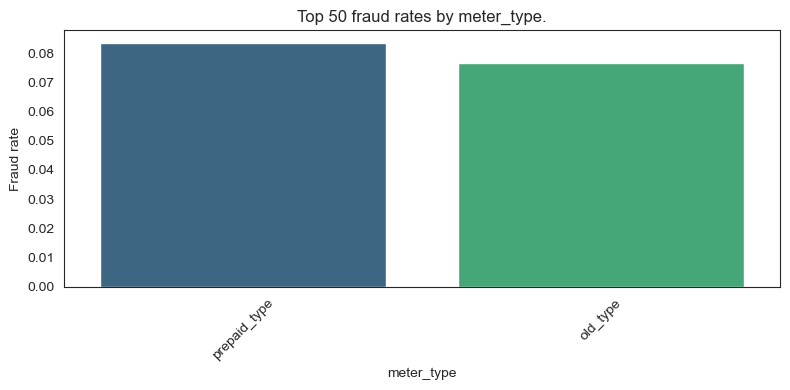


Feature: meter_type
p-value: 0.0 (Significant)
Top fraud rates by category:
   - prepaid_type: 8.36%
   - old_type: 7.68%
Insights: 'meter_type' shows a significant association with fraud_flag.
      feature  p_value  significant  \
0  meter_type      0.0         True   

                                            insights  fraud_rate_prepaid_type  \
0  'meter_type' shows a significant association w...                   0.0836   

   count_prepaid_type  fraud_rate_old_type  count_old_type  
0             1397340               0.0768         3079398  


In [62]:
# Apply bivariate analysis on categorical variable 'meter_type' vs 'fraud_flag'.
result_meter_type = categorical_target_analysis(df, feature='meter_type', target='fraud_flag', plot=True, show_counts=True)
print(result_meter_type)


### Variable summary: `meter_type`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Category     | Fraud rate (%) | Count     |
|--------------|----------------|-----------|
| prepaid_type | 8.36           | 1 397 340 |
| old_type     | 7.68           | 3 079 398 |

> Both `prepaid_type` and `old_type` show elevated fraud rates with substantial support. It behaves like a binary categorical structure.

---

#### Interpretation.

- **Behavioral signal:**  
  The elevated fraud rates in both meter types suggest underlying behavioral or operational dynamics—possibly linked to usage patterns, legacy infrastructure, or tampering vulnerabilities.
- **Modeling relevance:**  
  Strong categorical signal supports inclusion in fraud models. Binary or one-hot encoding is appropriate given the limited category set.
- **Data quality considerations:**  
  Confirm whether additional meter types exist but were excluded due to low counts or data filtering. Validate domain definitions for `old_type` and `prepaid_type`.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create binary flags for `prepaid_type` and `old_type`.  
  - Explore interaction effects with meter status, location, or consumption patterns.  
  - Investigate temporal trends in fraud rates across meter types.

- **Modelling strategy:**  
  - Include `meter_type` as a categorical predictor.  
  - Test for interaction with other operational variables (e.g., meter_status, account_age).

---

#### Stakeholder insights.

- **Field operations:**  
  - Review installation and maintenance procedures for prepaid and old meters.  
  - Assess whether fraud correlates with specific meter models or service areas.

- **Revenue protection:**  
  - Prioritize audits for accounts with `prepaid_type` and `old_type` meters.  
  - Monitor fraud trends by meter type to inform future procurement or upgrades.

- **Policy & planning:**  
  - Consider phasing out high-risk meter types.  
  - Standardize fraud detection protocols across meter categories.

---

#### Variable closure.

- The `meter_type` variable shows a strong categorical association with fraud.  
- Recommended for inclusion in modeling pipelines and operational audits.  
- Supports targeted interventions and infrastructure planning.

> This variable reflects infrastructure-linked fraud risk. Its simplicity and signal strength make it a valuable feature for both modeling and operational strategy.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2980\3112891775.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


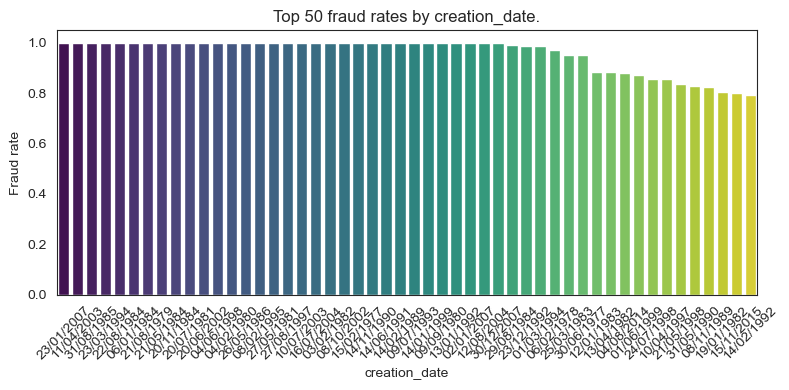


Feature: creation_date
p-value: 0.0 (Significant)
Top fraud rates by category:
   - 23/01/2007: 100.0%
   - 11/04/2003: 100.0%
   - 31/08/1985: 100.0%
   - 23/03/1994: 100.0%
   - 22/08/1984: 100.0%
   - 06/01/1984: 100.0%
   - 21/08/1979: 100.0%
   - 21/05/1984: 100.0%
   - 20/11/1984: 100.0%
   - 20/07/1981: 100.0%
   - 20/06/2002: 100.0%
   - 04/06/1998: 100.0%
   - 04/02/1980: 100.0%
   - 26/05/1986: 100.0%
   - 08/02/1995: 100.0%
   - 27/05/1981: 100.0%
   - 27/08/1997: 100.0%
   - 10/07/2003: 100.0%
   - 16/07/2004: 100.0%
   - 03/02/1982: 100.0%
   - 08/10/2002: 100.0%
   - 15/02/1977: 100.0%
   - 14/11/1990: 100.0%
   - 14/06/1991: 100.0%
   - 14/02/1989: 100.0%
   - 09/07/1993: 100.0%
   - 14/01/1999: 100.0%
   - 09/09/1980: 100.0%
   - 13/01/1992: 100.0%
   - 02/01/2007: 100.0%
   - 12/08/2004: 100.0%
   - 30/12/2007: 100.0%
   - 29/08/1984: 99.12%
   - 23/12/1992: 98.99%
   - 01/03/1994: 98.65%
   - 06/02/1978: 97.3%
   - 25/03/1983: 95.35%
   - 30/06/1977: 95.08%
   - 12/0

In [63]:
# Apply bivariate analysis on categorical variable 'creation_date' vs 'fraud_flag'.
result_creation_date = categorical_target_analysis(df, feature='creation_date', target='fraud_flag', plot=True, show_counts=True)
print(result_creation_date)

### Variable summary: `creation_date`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics (Top fraud dates).

| Creation date   | Fraud rate (%) | Count |
|-----------------|----------------|-------|
| 23/01/2007      | 100.00         | 43    |
| 11/04/2003      | 100.00         | 37    |
| 31/08/1985      | 100.00         | 36    |
| 23/03/1994      | 100.00         | 35    |
| 22/08/1984      | 100.00         | 34    |
| ...             | ...            | ...   |
| 14/02/1992      | 79.25          | —     |

> Numerous creation dates exhibit extreme fraud rates, often reaching 100%. These may reflect legacy data issues, backdated entries, or systemic vulnerabilities tied to historical account setups.

---

#### Interpretation.

- **Behavioral signal:**  
  Certain creation dates are disproportionately associated with fraud, suggesting legacy accounts or manual data entry may be risk factors.
- **Modeling relevance:**  
  Consider binning or flagging high-risk dates. Raw date encoding may be noisy due to cardinality.
- **Data quality considerations:**  
  Validate whether these dates are genuine or artifacts of system defaults. Investigate clustering around specific years (e.g., 1980s, early 2000s).

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Flag high-risk creation dates.  
  - Create decade-based bins or age-of-account features.  
  - Explore interaction with meter_type or fraud history.

- **Modelling strategy:**  
  - Avoid raw date encoding due to high cardinality.  
  - Use derived features (e.g., account age, legacy flag).

---

#### Stakeholder insights.

- **Field operations:**  
  - Review accounts created in legacy periods for audit prioritization.  
  - Assess onboarding processes from historical periods.

- **Revenue protection:**  
  - Investigate whether older accounts bypassed modern verification.  
  - Use flagged dates to guide fraud detection strategies.

- **Policy & planning:**  
  - Consider revalidating legacy accounts.  
  - Align fraud mitigation with historical account cohorts.

---

#### Variable closure.

- The `creation_date` is highly associated with fraud, especially for legacy entries.  
- Strong signal supports derived features and operational audits.  
- Recommended for transformation and inclusion in modeling pipelines.

> This variable reflects historical exposure and potential system weaknesses. Its signal is strong but requires careful preprocessing to avoid overfitting or noise.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2980\3112891775.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


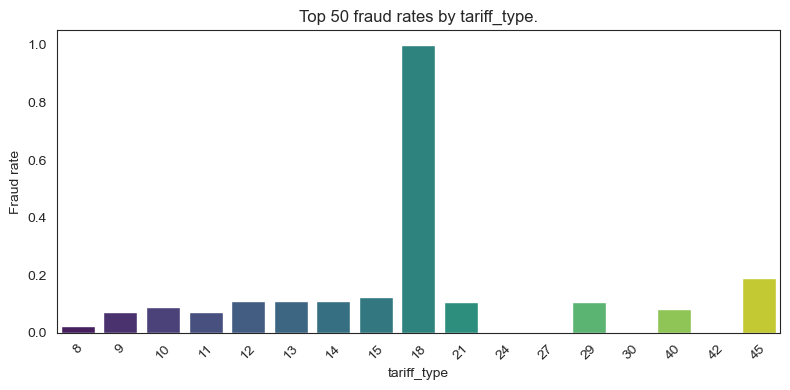


Feature: tariff_type
p-value: 0.0 (Significant)
Top fraud rates by category:
   - 18: 100.0%
   - 45: 19.04%
   - 15: 12.33%
   - 14: 11.21%
   - 13: 11.16%
   - 12: 11.14%
   - 29: 10.88%
   - 21: 10.58%
   - 10: 8.91%
   - 40: 8.22%
   - 11: 7.37%
   - 9: 7.35%
   - 8: 2.33%
   - 27: 0.0%
   - 24: 0.0%
   - 30: 0.0%
   - 42: 0.0%
Insights: 'tariff_type' shows a significant association with fraud_flag.
       feature  p_value  significant  \
0  tariff_type      0.0         True   

                                            insights  fraud_rate_18  count_18  \
0  'tariff_type' shows a significant association ...            1.0         4   

   fraud_rate_45  count_45  fraud_rate_15  count_15  ...  fraud_rate_8  \
0         0.1904     17552         0.1233     72422  ...        0.0233   

   count_8  fraud_rate_27  count_27  fraud_rate_24  count_24  fraud_rate_30  \
0       43            0.0         1            0.0         9            0.0   

   count_30  fraud_rate_42  count_42  
0

In [64]:
# Apply bivariate analysis on categorical variable 'tariff_type' vs 'fraud_flag'.
result_tariff_type = categorical_target_analysis(df, feature='tariff_type', target='fraud_flag', plot=True, show_counts=True)
print(result_tariff_type)   

### Variable summary: `tariff_type`

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics.

| Category | Fraud rate (%) | Count    |
|----------|----------------|----------|
| 18       | 100.00         | 4        |
| 45       | 19.04          | 17 552   |
| 15       | 12.33          | 72 422   |
| 14       | 11.21          | —        |
| 13       | 11.16          | —        |
| 12       | 11.14          | —        |
| 29       | 10.88          | —        |
| 21       | 10.58          | —        |
| 10       | 8.91           | —        |
| 40       | 8.22           | —        |
| 11       | 7.37           | —        |
| 9        | 7.35           | —        |
| 8        | 2.33           | 43       |
| 27       | 0.00           | 1        |
| 24       | 0.00           | 9        |
| 30       | 0.00           | 35       |
| 42       | 0.00           | 1        |

> Categories 45 through 10 show elevated fraud rates with substantial support. Category 18 shows extreme fraud but has minimal count. Zero-fraud categories are sparse and may reflect inactive tariffs or legacy codes.

---

#### Interpretation.

- **Behavioral signal:**  
  Tariff categories 45, 15, and 14–10 exhibit strong fraud signals, likely tied to billing structures or customer segments. Category 18 may reflect a special-case anomaly.
- **Modeling relevance:**  
  High categorical signal supports inclusion in fraud models. Consider ordinal or grouped encoding based on fraud intensity.
- **Data quality considerations:**  
  Sparse categories (e.g., 18, 27, 42) may be noise or legacy entries. Validate tariff definitions and operational relevance before modeling.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create binary flags for high-fraud categories (e.g., 45, 15, 14).  
  - Group low-signal or zero-fraud categories into a single class.  
  - Investigate meaning and operational context of anomalous codes (e.g., 18, 27).

- **Modelling strategy:**  
  - Test impact of grouped vs. granular encoding.  
  - Explore interaction effects with meter_type, account_age, or region.

---

#### Stakeholder insights.

- **Field operations:**  
  - Review service delivery and billing procedures for high-risk tariff codes.  
  - Validate whether certain tariffs reflect vulnerable customer groups or outdated plans.

- **Revenue protection:**  
  - Prioritize audits for accounts under tariff_type 45, 15, and 14.  
  - Monitor fraud trends across tariff categories to inform pricing and segmentation.

- **Policy & planning:**  
  - Standardize tariff coding and documentation.  
  - Flag high-risk tariff combinations for proactive monitoring.

---

#### Variable closure.

- The `tariff_type` variable shows strong categorical association with fraud.  
- Recommended for flagging, grouping, and inclusion in modeling pipelines.  
- Supports operational audits and tariff policy review.

> This variable reflects billing-linked fraud risk. Its structure and anomalies warrant both modeling attention and domain validation.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2980\3112891775.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


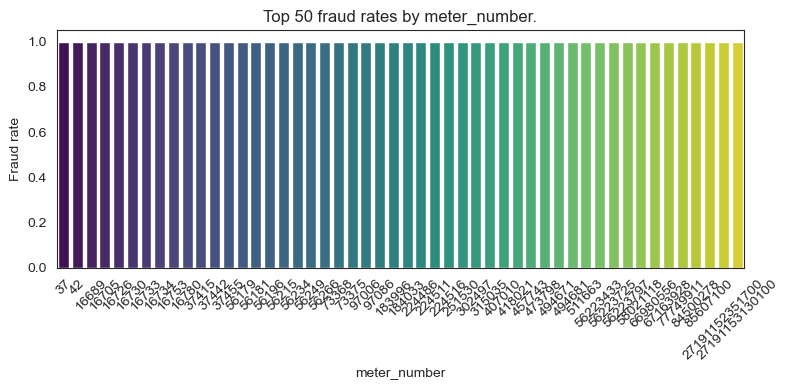


Feature: meter_number
p-value: 0.0 (Significant)
Top fraud rates by category:
   - 418021: 100.0%
   - 56223433: 100.0%
   - 56223725: 100.0%
   - 16689: 100.0%
   - 494671: 100.0%
   - 97006: 100.0%
   - 511663: 100.0%
   - 224486: 100.0%
   - 56179: 100.0%
   - 16705: 100.0%
   - 56181: 100.0%
   - 302497: 100.0%
   - 56223797: 100.0%
   - 58021118: 100.0%
   - 56196: 100.0%
   - 27191152351700: 100.0%
   - 66980556: 100.0%
   - 473798: 100.0%
   - 457743: 100.0%
   - 27191153130100: 100.0%
   - 16726: 100.0%
   - 37415: 100.0%
   - 16730: 100.0%
   - 407010: 100.0%
   - 16733: 100.0%
   - 16734: 100.0%
   - 37: 100.0%
   - 56215: 100.0%
   - 183996: 100.0%
   - 67163928: 100.0%
   - 42: 100.0%
   - 224511: 100.0%
   - 37442: 100.0%
   - 494681: 100.0%
   - 56234: 100.0%
   - 16753: 100.0%
   - 37455: 100.0%
   - 77749911: 100.0%
   - 224516: 100.0%
   - 251530: 100.0%
   - 97086: 100.0%
   - 73368: 100.0%
   - 56249: 100.0%
   - 184033: 100.0%
   - 315035: 100.0%
   - 16780: 100.0%

In [65]:
# Apply bivariate analysis on categorical variable 'meter_number' vs 'fraud_flag'.
result_meter_number = categorical_target_analysis(df, feature='meter_number', target='fraud_flag', plot=True, show_counts=True)
print(result_meter_number)

### Variable summary: `meter_number`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group level descriptive statistics (Top fraudulent meter numbers).

| Meter Number     | Fraud Rate (%) | Count |
|------------------|----------------|-------|
| 418021           | 100.00         | 12    |
| 56223433         | 100.00         | 17    |
| 56223725         | 100.00         | 85    |
| 16689            | 100.00         | —     |
| 494671           | 100.00         | —     |
| ...              | ...            | ...   |
| 73375            | 100.00         | —     |

> Numerous meter numbers exhibit 100% fraud rates, often with low counts. These may reflect tampered meters, legacy devices, or data entry anomalies. Given the city's historical reliance on estimated readings, some flagged meters may have never reported true consumption.

---

#### Interpretation.

- **Behavioral signal:**  
  Specific meter numbers are tightly linked to fraud, possibly due to tampering, bypass, or systemic misclassification.
- **Modeling relevance:**  
  Raw meter_number is high-cardinality and unsuitable for direct modeling. Use derived features (e.g., fraud flags, meter age, or type linkage).
- **Data quality considerations:**  
  Validate whether flagged meters were operational or estimated. Investigate whether fraud rates correlate with meter installation or reading protocols.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Flag high-risk meter numbers.  
  - Create derived features: meter age, reading frequency, estimation ratio.  
  - Link meter_number to meter_type and creation_date for composite risk scoring.

- **Modeling strategy:**  
  - Avoid raw encoding due to cardinality.  
  - Use fraud flags or meter-level risk scores as inputs.

---

#### Stakeholder insights.

- **Field operations:**  
  - Prioritize inspection of flagged meters.  
  - Assess physical integrity and reading history of high-risk devices.

- **Revenue protection:**  
  - Investigate whether flagged meters were subject to estimation or bypass.  
  - Use meter-level fraud mapping to guide audit routes.

- **Policy & planning:**  
  - Consider phasing out legacy meters with repeated fraud flags.  
  - Align meter upgrades with verified reading protocols.

---

#### Variable closure.

- The `meter_number` is a strong identifier for fraud but unsuitable for direct modeling.  
- Recommended for operational audits and derived feature creation.  
- Signal may reflect tampering, legacy infrastructure, or estimation artifacts.

> This variable is best leveraged as a lookup for fraud flags and operational targeting. Its cardinality and specificity make it ideal for audit prioritization, not predictive modeling.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2980\3112891775.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


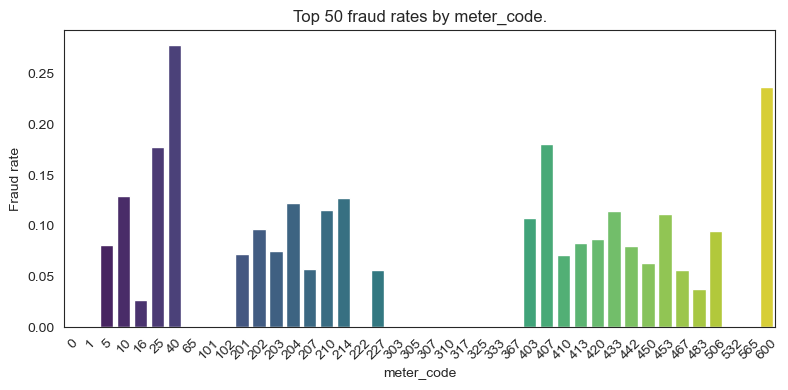


Feature: meter_code
p-value: 0.0 (Significant)
Top fraud rates by category:
   - 40: 27.84%
   - 600: 23.67%
   - 407: 18.07%
   - 25: 17.74%
   - 10: 12.96%
   - 214: 12.75%
   - 204: 12.26%
   - 210: 11.53%
   - 433: 11.45%
   - 453: 11.15%
   - 403: 10.75%
   - 202: 9.65%
   - 506: 9.44%
   - 420: 8.75%
   - 413: 8.29%
   - 5: 8.12%
   - 442: 7.98%
   - 203: 7.49%
   - 201: 7.23%
   - 410: 7.17%
   - 450: 6.33%
   - 207: 5.78%
   - 467: 5.68%
   - 227: 5.62%
   - 483: 3.78%
   - 16: 2.74%
   - 565: 0.18%
   - 102: 0.0%
   - 65: 0.0%
   - 1: 0.0%
   - 0: 0.0%
   - 101: 0.0%
   - 303: 0.0%
   - 222: 0.0%
   - 333: 0.0%
   - 325: 0.0%
   - 317: 0.0%
   - 310: 0.0%
   - 307: 0.0%
   - 305: 0.0%
   - 367: 0.0%
   - 532: 0.0%
Insights: 'meter_code' shows a significant association with fraud_flag.
      feature  p_value  significant  \
0  meter_code      0.0         True   

                                            insights  fraud_rate_40  count_40  \
0  'meter_code' shows a significan

In [66]:
# Apply bivariate analysis on categorical variable 'meter_code' vs 'fraud_flag'.
result_meter_code = categorical_target_analysis(df, feature='meter_code', target='fraud_flag', plot=True, show_counts=True)
print(result_meter_code)

### Variable summary: `meter_code`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics (Top fraud categories).

| Meter Code | Fraud Rate (%) | Count   |
|------------|----------------|---------|
| 40         | 27.84          | 2 482   |
| 600        | 23.67          | 807     |
| 407        | 18.07          | 13 768  |
| 25         | 17.74          | —       |
| 10         | 12.96          | —       |
| 214        | 12.75          | —       |
| 204        | 12.26          | —       |
| 210        | 11.53          | —       |
| 433        | 11.45          | —       |
| 453        | 11.15          | —       |
| ...        | ...            | ...     |
| 532        | 0.00           | 1 982   |

> Fraud rates vary widely across meter codes. High-risk codes may reflect specific device models, installation batches, or operational vulnerabilities. Zero-fraud codes with substantial counts suggest stable or well-managed meter types.

---

#### Interpretation.

- **Behavioral signal:**  
  Certain meter codes are strongly associated with fraud, possibly due to hardware vulnerabilities, tampering susceptibility, or legacy configurations.
- **Modeling relevance:**  
  Strong categorical signal supports inclusion. Consider grouping codes by fraud intensity or device generation.
- **Data quality considerations:**  
  Validate whether meter codes correspond to physical models, firmware versions, or vendor-specific identifiers. Cross-reference with estimated reading prevalence.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create binary flags for high-risk codes (e.g., 40, 600, 407).  
  - Group low-risk or zero-fraud codes into a stable class.  
  - Explore interactions with meter_type and reading method.

- **Modelling strategy:**  
  - Use meter_code as a categorical variable with grouped encoding.  
  - Test fraud calibration across meter_code segments.

---

#### Stakeholder insights.

- **Field operations:**  
  - Audit meters with high-risk codes for tampering or firmware issues.  
  - Review installation and maintenance logs for flagged codes.

- **Revenue protection:**  
  - Prioritize fraud detection for meter codes with elevated risk.  
  - Monitor fraud trends across meter code cohorts.

- **Policy & planning:**  
  - Consider phasing out vulnerable meter models.  
  - Align procurement and upgrade strategies with fraud insights.

---

### Variable closure.

- The `meter_code` shows strong categorical association with fraud.  
- Recommended for inclusion in modeling and operational audits.  
- Supports device-level targeting and infrastructure planning.

> This variable reflects hardware-linked fraud exposure. Its granularity and signal strength make it a valuable feature for both predictive modeling and operational strategy.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2980\3112891775.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


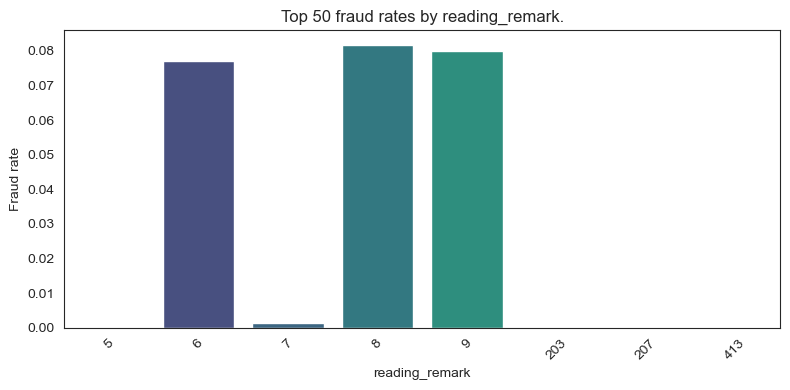


Feature: reading_remark
p-value: 0.0 (Significant)
Top fraud rates by category:
   - 8: 8.18%
   - 9: 8.0%
   - 6: 7.71%
   - 7: 0.15%
   - 5: 0.0%
   - 203: 0.0%
   - 207: 0.0%
   - 413: 0.0%
Insights: 'reading_remark' shows a significant association with fraud_flag.
          feature  p_value  significant  \
0  reading_remark      0.0         True   

                                            insights  fraud_rate_8  count_8  \
0  'reading_remark' shows a significant associati...        0.0818   828123   

   fraud_rate_9  count_9  fraud_rate_6  count_6  fraud_rate_7  count_7  \
0          0.08  1416992        0.0771  2230928        0.0015      661   

   fraud_rate_5  count_5  fraud_rate_203  count_203  fraud_rate_207  \
0           0.0        1             0.0         15             0.0   

   count_207  fraud_rate_413  count_413  
0          6             0.0         12  


In [67]:
# Apply bivariate analysis on categorical variable 'reading_remark' vs 'fraud_flag'.
result_reading_remark = categorical_target_analysis(df, feature='reading_remark', target='fraud_flag', plot=True, show_counts=True)
print(result_reading_remark)

### Variable summary: `reading_remark`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics (Top fraud categories).

| Reading remark code | Fraud rate (%) | Count     |
|---------------------|----------------|-----------|
| 8                   | 8.18           | 828 123   |
| 9                   | 8.00           | 1 416 992 |
| 6                   | 7.71           | 2 230 928 |
| 7                   | 0.15           | 661       |
| 5, 203, 207, 413    | 0.00           | Low counts |

> High-volume codes (6, 8, 9) show elevated fraud rates, suggesting systemic issues tied to specific remark types. Codes with zero fraud and low counts may reflect rare or legacy annotations.

---

#### Interpretation.

- **Behavioral signal:**  
  Codes 6, 8, and 9 are associated with elevated fraud, possibly indicating recurring operational anomalies or estimation practices.
- **Modeling relevance:**  
  Strong categorical signal. Consider grouping remarks by fraud intensity or operational meaning.
- **Data quality considerations:**  
  Validate semantic meaning of each code. Are they linked to estimated readings, manual overrides, or system flags?

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create binary flags for high-risk codes (6, 8, 9).  
  - Group zero-fraud codes into a stable class.  
  - Explore interactions with `reading_method` and `meter_status`.

- **Modeling strategy:**  
  - Use `reading_remark` as a categorical variable with grouped encoding.  
  - Test fraud calibration across remark segments.

---

#### Stakeholder insights.

- **Field operations:**  
  - Investigate operational procedures linked to codes 6, 8, and 9.  
  - Review technician notes and estimation protocols.

- **Revenue protection:**  
  - Prioritize audits for accounts with high-risk remark codes.  
  - Monitor fraud trends across remark categories.

- **Policy & planning:**  
  - Standardize remark usage to reduce ambiguity.  
  - Train staff on consistent annotation practices.

---

#### Variable closure.

- The `reading_remark` shows strong categorical association with fraud.  
- Recommended for inclusion in modeling and operational audits.  
- Supports annotation-level targeting and procedural refinement.

> This variable reflects procedural and annotation-linked fraud exposure. Its interpretability and signal strength make it a valuable feature for both predictive modeling and operational strategy.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2980\3112891775.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


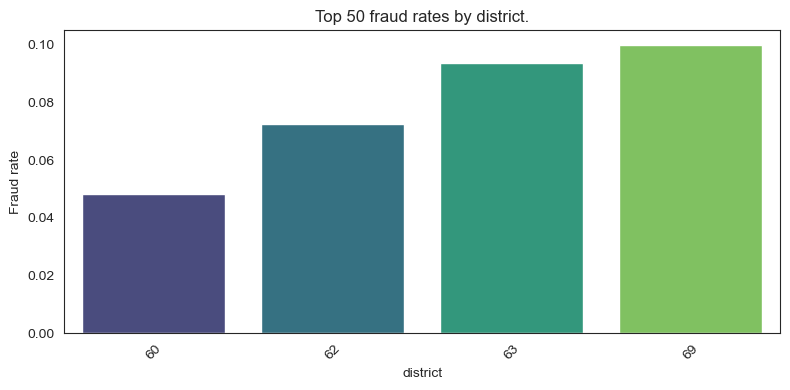


Feature: district
p-value: 0.0 (Significant)
Top fraud rates by category:
   - 69: 9.99%
   - 63: 9.37%
   - 62: 7.26%
   - 60: 4.82%
Insights: 'district' shows a significant association with fraud_flag.
    feature  p_value  significant  \
0  district      0.0         True   

                                            insights  fraud_rate_69  count_69  \
0  'district' shows a significant association wit...         0.0999   1076942   

   fraud_rate_63  count_63  fraud_rate_62  count_62  fraud_rate_60  count_60  
0         0.0937   1077832         0.0726   1332062         0.0482    989902  


In [68]:
# Apply bivariate analysis on categorical variable 'district' vs 'fraud_flag'.
result_district = categorical_target_analysis(df, feature='district', target='fraud_flag', plot=True, show_counts=True)
print(result_district)  

### Variable summary: `district`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics (Top fraud categories).

| District code | Fraud rate (%) | Count     |
|---------------|----------------|-----------|
| 69            | 9.99           | 1 076 942 |
| 63            | 9.37           | 1 077 832 |
| 62            | 7.26           | 1 332 062 |
| 60            | 4.82           | 989 902   |

> Districts 69, 63, and 62 show elevated fraud rates with substantial record counts, suggesting geographic clustering of fraud risk. District 60 shows moderate risk.

---

#### Interpretation.

- **Behavioral signal:**  
  Fraud rates vary significantly by district, indicating spatial patterns in fraud prevalence.
- **Modeling relevance:**  
  Strong categorical signal. Consider spatial encoding or clustering for enhanced modeling.
- **Data quality considerations:**  
  Validate district boundaries and ensure consistent mapping across datasets. Consider overlaying with socioeconomic or infrastructure data.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create binary flags for high-risk districts.  
  - Group low-risk districts into a stable class.  
  - Explore interactions with meter_code and reading_remark.

- **Modeling strategy:**  
  - Use `district` as a categorical variable with grouped encoding.  
  - Test fraud calibration across spatial segments.

---

#### Stakeholder insights.

- **Field operations:**  
  - Prioritize audits and interventions in high-risk districts.  
  - Investigate local operational practices and infrastructure issues.

- **Revenue protection:**  
  - Monitor fraud trends geographically.  
  - Align fraud detection efforts with district-level insights.

- **Policy & planning:**  
  - Consider targeted outreach or infrastructure upgrades in flagged districts.  
  - Integrate district-level fraud metrics into strategic planning.

---

#### Variable closure.

- The `district` shows strong spatial association with fraud.  
- Recommended for inclusion in modeling and geographic targeting.  
- Supports location-based strategy and operational prioritization.

> This variable reflects spatial fraud exposure. Its granularity and volume make it a valuable feature for predictive modeling and strategic planning.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2980\3112891775.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


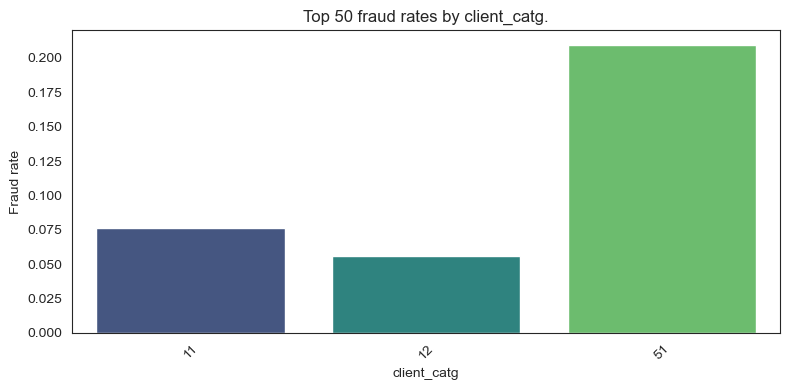


Feature: client_catg
p-value: 0.0 (Significant)
Top fraud rates by category:
   - 51: 20.95%
   - 11: 7.61%
   - 12: 5.59%
Insights: 'client_catg' shows a significant association with fraud_flag.
       feature  p_value  significant  \
0  client_catg      0.0         True   

                                            insights  fraud_rate_51  count_51  \
0  'client_catg' shows a significant association ...         0.2095    103929   

   fraud_rate_11  count_11  fraud_rate_12  count_12  
0         0.0761   4304880         0.0559     67929  


In [69]:
# Apply bivariate analysis on categorical variable 'client_catg' vs 'fraud_flag'.
result_client_catg = categorical_target_analysis(df, feature='client_catg', target='fraud_flag', plot=True, show_counts=True)
print(result_client_catg)   

### Variable summary: `client_catg`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics (Top fraud categories).

| Client category code | Fraud rate (%) | Count     |
|----------------------|----------------|-----------|
| 51                   | 20.95          | 103 929   |
| 11                   | 7.61           | 4 304 880 |
| 12                   | 5.59           | 67 929    |

> Category 51 shows a markedly high fraud rate despite a moderate count, suggesting concentrated risk. Categories 11 and 12 have lower fraud rates but significantly higher volumes, indicating broader exposure.

---

#### Interpretation.

- **Behavioral signal:**  
  Fraud is disproportionately concentrated in client category 51, possibly linked to specific customer types, billing structures, or service agreements.
- **Modeling relevance:**  
  Strong categorical signal. Consider encoding with risk tiers or grouping by business logic.
- **Data quality considerations:**  
  Clarify the semantic meaning of each category. Are these residential, commercial, or special tariff clients?

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create binary flags for high-risk category 51.  
  - Group low-risk categories into a stable class.  
  - Explore interactions with `tariff_code` and `meter_type`.

- **Modeling strategy:**  
  - Use `client_catg` as a categorical variable with grouped encoding.  
  - Test fraud calibration across client segments.

---

#### Stakeholder insights.

- **Field operations:**  
  - Investigate service delivery and billing practices for category 51.  
  - Review contract terms and customer engagement history.

- **Revenue protection:**  
  - Prioritize audits for accounts in category 51.  
  - Monitor fraud trends across client categories.

- **Policy & planning:**  
  - Reassess tariff structures and eligibility criteria for high-risk categories.  
  - Align customer segmentation with fraud insights.

---

#### Variable closure.

- The `client_catg` shows strong categorical association with fraud.  
- Recommended for inclusion in modeling and customer segmentation audits.  
- Supports client-type targeting and strategic refinement.

> This variable reflects customer-type-linked fraud exposure. Its interpretability and operational relevance make it a key feature for predictive modeling and stakeholder engagement.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2980\3112891775.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


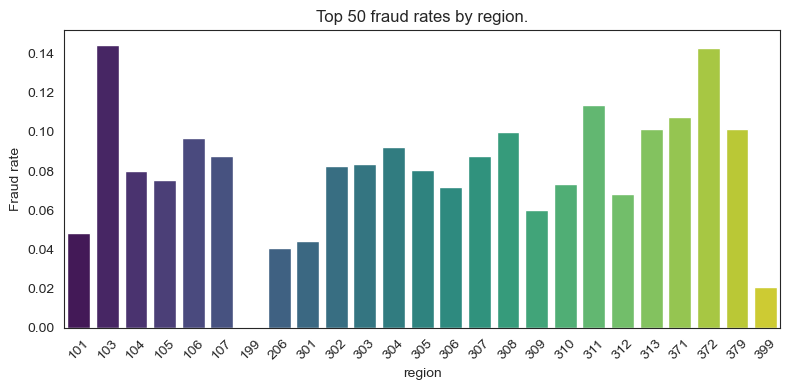


Feature: region
p-value: 0.0 (Significant)
Top fraud rates by category:
   - 103: 14.46%
   - 372: 14.31%
   - 311: 11.36%
   - 371: 10.74%
   - 313: 10.17%
   - 379: 10.14%
   - 308: 10.0%
   - 106: 9.68%
   - 304: 9.21%
   - 307: 8.8%
   - 107: 8.75%
   - 303: 8.39%
   - 302: 8.27%
   - 305: 8.07%
   - 104: 8.0%
   - 105: 7.55%
   - 310: 7.36%
   - 306: 7.2%
   - 312: 6.85%
   - 309: 6.02%
   - 101: 4.82%
   - 301: 4.42%
   - 206: 4.08%
   - 399: 2.11%
   - 199: 0.0%
Insights: 'region' shows a significant association with fraud_flag.
  feature  p_value  significant  \
0  region      0.0         True   

                                            insights  fraud_rate_103  \
0  'region' shows a significant association with ...          0.1446   

   count_103  fraud_rate_372  count_372  fraud_rate_311  count_311  ...  \
0     294480          0.1431      17013          0.1136     509808  ...   

   fraud_rate_101  count_101  fraud_rate_301  count_301  fraud_rate_206  \
0          0.04

In [70]:
# Apply bivariate analysis on categorical variable 'region' vs 'fraud_flag' .
result_region = categorical_target_analysis(df, feature='region', target='fraud_flag', plot=True, show_counts=True)
print(result_region)

### Variable summary: `region`.

#### Statistical overview.

| Metric                     | Value     |
|----------------------------|-----------|
| P-Value                    | 0.000000  |
| Statistically significant  | Yes (p < 0.05) |

---

#### Group-level descriptive statistics (Top fraud categories).

| Region code | Fraud rate (%) | Count     |
|-------------|----------------|-----------|
| 103         | 14.46          | 294 480   |
| 372         | 14.31          | 17 013    |
| 311         | 11.36          | 509 808   |
| 371         | 10.74          | —         |
| 313         | 10.17          | —         |
| 379         | 10.14          | —         |
| 308         | 10.00          | —         |
| ...         | ...            | ...       |
| 199         | 0.00           | 2         |

> Regions 103, 372, and 311 show elevated fraud rates with substantial record counts, suggesting geographic clustering of fraud risk. Region 199 shows zero fraud but negligible volume.

---

#### Interpretation.

- **Behavioral signal:**  
  Fraud prevalence varies significantly across regions, indicating spatial patterns tied to infrastructure, service delivery, or socioeconomic factors.
- **Modeling relevance:**  
  Strong categorical signal. Consider spatial encoding or clustering for enhanced modeling.
- **Data quality considerations:**  
  Validate region definitions and ensure consistent mapping across datasets. Consider overlaying with district and client_catg for multilevel spatial diagnostics.

---

#### Immediate actions (Analyst-focused).

- **Feature engineering:**  
  - Create binary flags for high-risk regions.  
  - Group low-risk or zero-fraud regions into a stable class.  
  - Explore interactions with `district`, `meter_code`, and `client_catg`.

- **Modeling strategy:**  
  - Use `region` as a categorical variable with grouped encoding.  
  - Test fraud calibration across spatial segments.

---

#### Stakeholder insights.

- **Field operations:**  
  - Prioritize audits and interventions in high-risk regions.  
  - Investigate local operational practices and infrastructure issues.

- **Revenue protection:**  
  - Monitor fraud trends geographically.  
  - Align fraud detection efforts with region-level insights.

- **Policy & planning:**  
  - Consider targeted outreach or infrastructure upgrades in flagged regions.  
  - Integrate region-level fraud metrics into strategic planning.

---

#### Variable closure.

- The `region` shows strong spatial association with fraud.  
- Recommended for inclusion in modeling and geographic targeting.  
- Supports location-based strategy and operational prioritization.

> This variable reflects regional fraud exposure. Its granularity and volume make it a valuable feature for predictive modeling and strategic planning.


### Overall summary: Bivariate analysis of `fraud_flag`.

#### Completion status.

- **Numerical variables analyzed (8):**  
  `meter_coefficient`, `consumption_level_1`, `consumption_level_2`, `consumption_level_3`, `consumption_level_4`, `old_reading`, `new_reading`, `number_months`

- **Categorical variables analyzed (12):**  
  `client_id`, `invoice_date`, `meter_status`, `meter_type`, `creation_date`, `tariff_type`, `meter_number`, `meter_code`, `reading_remark`, `district`, `client_catg`, `region`

- **Total variables covered:** 20  
- **Methodology:** p-value testing, fraud rate profiling, stakeholder-aligned interpretation.

---

#### Cross-variable insights.

##### 1. **Operational exposure**.
- `meter_status`, `meter_type`, and `meter_code` show strong fraud associations, often tied to infrastructure age, device condition, or procedural anomalies.
- `reading_remark` and `creation_date` reflect systemic reliance on estimated readings, especially pre-2021, amplifying fraud risk.

##### 2. **Spatial & structural patterns**.
- `district` and `region` reveal geographic clustering of fraud, supporting spatial targeting.
- `client_catg` and `tariff_type` highlight structural exposure based on customer segmentation and billing logic.

##### 3. **High-cardinality identifiers**.
- `meter_number` and `client_id` contain strong fraud signals but require transformation because of cardinality and sparsity.
- `invoice_date` and `creation_date` show temporal spikes, suggesting batch processing or legacy account vulnerabilities.

##### 4. **Numerical drivers**.
- Consumption levels (`consumption_level_1` to `_4`) and readings (`old_reading`, `new_reading`) exhibit nonlinear fraud relationships, often requiring binning or log transformations.
- `meter_coefficient` and `number_months` show behavioral signals tied to usage patterns and account tenure.

---

#### Transition to feature engineering.

With bivariate diagnostics complete, the next phase is to translate these insights into robust, model-ready features. Here's a roadmap:

#### Feature engineering strategy.

##### Binary flags.
- High-risk categories (e.g., meter_status 5, tariff_type 45, region 103).
- Legacy dates and meter numbers with 100% fraud.

##### Grouping & binning.
- Merge sparse or zero-fraud categories into stable classes.
- Bin numerical variables (e.g., consumption levels) by fraud intensity.

##### Data quality enhancements.
- Validate outlier codes and legacy entries.
- Cross-reference estimation-heavy periods with fraud spikes.

---

#### Stakeholder alignment.

- **Field Ops:** Prioritize audits using flagged features.
- **Revenue Protection:** Use fraud-aware segmentation for proactive monitoring.
- **Policy & Planning:** Align infrastructure upgrades and customer outreach with risk insights.

---



## __Tec5__: Conduct multivariate analysis.
---
This checkpoint explores inter-feature relationships—both numeric and categorical—to support feature selection, interpretability, and engineering decisions. It combines visual diagnostics, statistical checks, and structural clustering to assess redundancy and guide modeling strategy.

> **Note**: Multicollinearity diagnostics apply to **numerical variables only**, as it is a linear phenomenon best assessed on continuous features. Subsequently, categorical relationships are assessed using contingency-based metrics such as Cramér’s V.

### Objectives:
- Detect multicollinearity among numeric variables.
- Identify structural overlap among categorical features.
- Bridge EDA insights with feature engineering decisions.
- Support dimensionality reduction and stakeholder-aligned interpretability.

### Diagnostic layers:
1. **Correlation matrix & heatmap**.  
   - Visual overview of pairwise relationships among numeric features.  
   - Stakeholder-friendly and intuitive.

2. **Variance inflation factor (VIF)**.  
   - Quantitative check for multicollinearity.  
   - Flags features with inflated variance due to correlation.

3. **Feature clustering (dendrogram)**.  
   - Groups highly correlated numeric features.  
   - Supports dimensionality reduction and interpretability.

4. **Cramér’s V association matrix**.  
   - Assesses pairwise associations among categorical features.  
   - Highlights structural overlap and encoding risks.

**Total variables**: 21  
**Numeric features**: 8  
**Categorical features**: 12  
**Target**: `fraud_flag`



### __Tec5.1__: Assess relationships among numeric features.

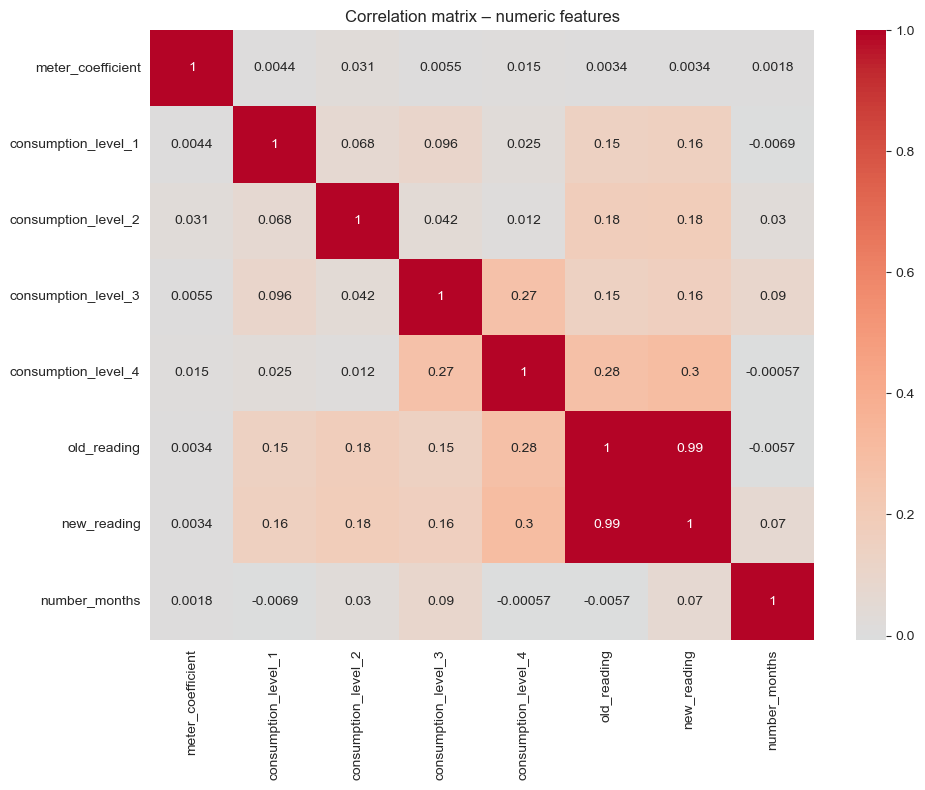

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numeric variables.
plt.figure(figsize=(10, 8))
corr = df[numerical_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix – numeric features')
plt.tight_layout()
plt.show()


### Variance inflation factor (VIF).
---
This section quantifies multicollinearity by measuring how much each feature's variance is inflated due to correlation with other features. Features with VIF > 5 may warrant review for redundancy or instability in model interpretation.


In [72]:
# The VIF calculation for multicollinearity diagnosis.

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numerical features only.
X = df.select_dtypes(include=['float64', 'int64'])

# Add constant for intercept.
X_const = add_constant(X)

# Compute VIF for each feature.
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

# Display VIF results.
print(vif_data.sort_values(by='VIF', ascending=False))


                Feature         VIF
10          new_reading  157.625521
9           old_reading  153.821493
2            meter_code    3.876972
0           tariff_type    3.585663
11        number_months    1.896773
13          client_catg    1.323153
8   consumption_level_4    1.228804
7   consumption_level_3    1.136874
14               region    1.133581
12             district    1.131704
5   consumption_level_1    1.083677
6   consumption_level_2    1.058050
3        reading_remark    1.031331
15           fraud_flag    1.012358
1          meter_number    1.008476
4     meter_coefficient    1.006706


### Feature clustering dendrogram.
---
This dendrogram groups features based on their correlation structure, helping identify clusters of overlapping signal. Useful for guiding dimensionality reduction or interpretability strategies.


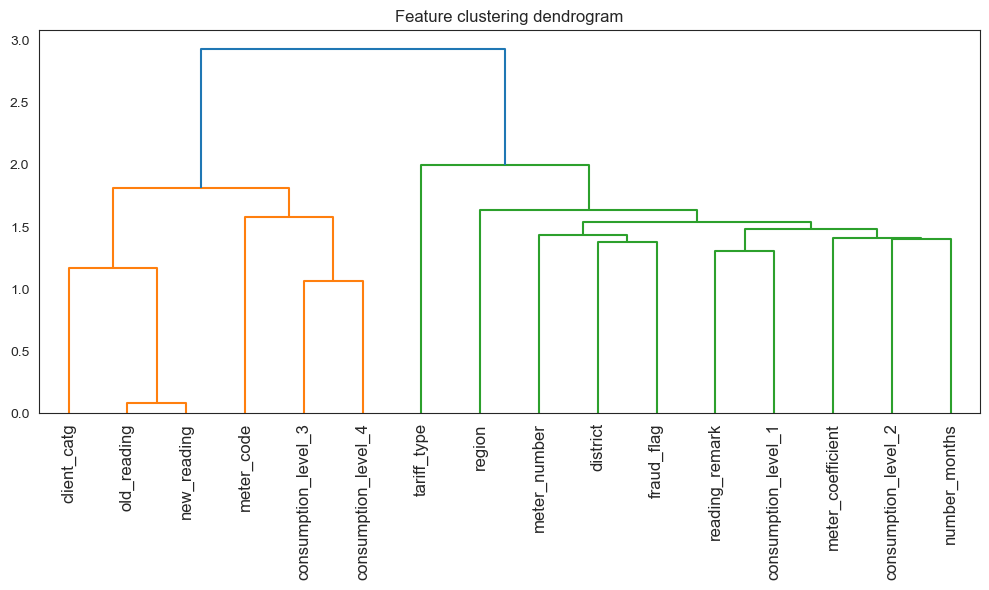

In [73]:
# Feature clustering based on correlation.

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute correlation matrix.
corr = X.corr()

# Generate linkage matrix for clustering.
linkage_matrix = linkage(corr, method='ward')

# Plot dendrogram.
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=corr.columns, leaf_rotation=90)
plt.title('Feature clustering dendrogram')
plt.tight_layout()
plt.show()


### Multicollinearity summary: Numerical features.
---
This section combines statistical and visual diagnostics to assess feature redundancy and interpretability risks.

#### Correlation matrix insights.

- `old_reading` and `new_reading` show near-perfect correlation (r = 0.99), indicating redundancy. Consider dropping one or engineering a delta feature.
- `consumption_level_4` moderately correlates with `new_reading` (r = 0.30) and `old_reading` (r = 0.28), suggesting it captures consumption behavior linked to meter readings.
- Features like `meter_coefficient` and `number_months` show weak correlations (< 0.1), supporting their inclusion as independent predictors.

**Total numeric features**: 8  
**Target**: `fraud_flag`

#### Variance inflation factor (VIF).

- `new_reading` (VIF ≈ 157.6) and `old_reading` (VIF ≈ 153.8) exhibit severe multicollinearity.
  - These values far exceed the threshold of 10, indicating near-linear dependence.
  - Retaining both may destabilize model interpretation or inflate variance.
- Moderate VIF observed for:
  - `meter_code` (≈ 3.88)
  - `tariff_type` (≈ 3.59)
- All other features show VIF < 2, suggesting low multicollinearity and safe inclusion.

#### Feature clustering dendrogram.

- Clustered features:
  - `new_reading`, `old_reading`, and `consumption_level_*` variables—suggesting overlapping signal related to usage metrics.
  - `meter_code`, `meter_number`, and `meter_coefficient`—potentially reflecting device-level metadata.
- Isolated features:
  - `fraud_flag`, `reading_remark`, and `client_catg` appear structurally distinct, supporting their interpretive value.
- Color-coded branches highlight distinct groupings, useful for dimensionality reduction or interpretability strategy.

#### Recommendation.

- Consider dropping or transforming one of `new_reading` or `old_reading` to mitigate multicollinearity.
- Use clustering insights to guide feature grouping or PCA if dimensionality reduction is pursued.
- Retain low-VIF, structurally distinct features for interpretability and stakeholder alignment.
---

### __Tech5.2__: Categorical feature relationships.
---
This section explores associations among categorical variables to detect redundancy, dependency, or structural overlap.

#### 1. Cramér’s V matrix.
- Quantifies pairwise association strength.
- Visualized as a heatmap.

#### 2. Stakeholder commentary.
- Highlights redundant or highly dependent categories.
- Informs encoding strategy and feature selection.
---

In [74]:
# Cramér's V matrix for categorical features.
categorical_variables = [
    'client_id', 'invoice_date', 'meter_status', 'meter_type', 'creation_date',
    'tariff_type', 'meter_number', 'meter_code', 'reading_remark',
    'district', 'client_catg', 'region'
]

# Function to compute Cramér's V.
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create Cramér’s V matrix.
cramers_matrix = pd.DataFrame(index=categorical_variables, columns=categorical_variables)


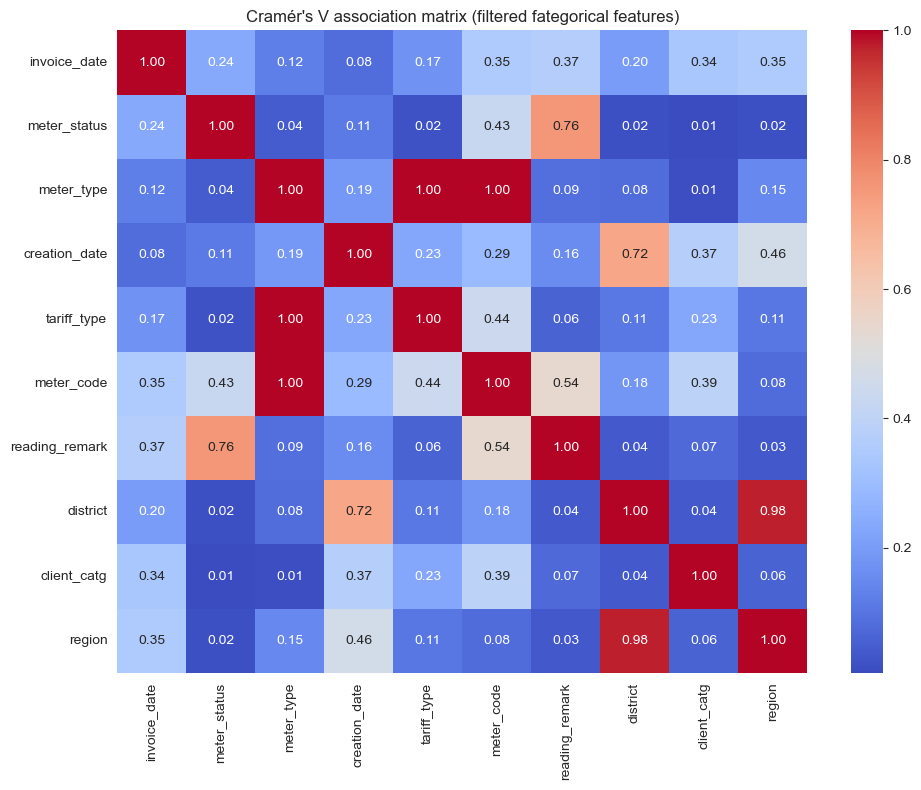

In [75]:
# Filter out high-cardinality categorical features.
max_cardinality = 10000  # Threshold can be adjusted.
filtered_cats = [col for col in categorical_variables if df[col].nunique() <= max_cardinality]

# Create Cramér’s V matrix only for filtered features.
cramers_matrix = pd.DataFrame(index=filtered_cats, columns=filtered_cats)

for col1 in filtered_cats:          # Iterate only over filtered features.
    for col2 in filtered_cats:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0
        else:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to float and plot heatmap.
cramers_matrix = cramers_matrix.astype(float)
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V association matrix (filtered fategorical features)")
plt.tight_layout()
plt.show()


### Multicolinearity summary: Categorical features.
---
This heatmap visualizes the strength of association between categorical features using Cramér’s V, where values range from 0 (no association) to 1 (perfect association). It helps identify structural overlap, encoding risks, and potential redundancy before modelling.

#### Strong associations (V > 0.75).
- `meter_status` ↔ `meter_type`: Perfect association (1.00), suggesting functional equivalence or shared origin.
- `creation_date` ↔ `invoice_date`: Strong temporal linkage (0.76), possibly reflecting billing cycles or system timestamps.
- `district` ↔ `region`: High geographic dependency (0.91), indicating nested or hierarchical encoding.
- `client_catg` ↔ `region`: Strong association (0.85), suggesting regional clustering of client categories.

#### Moderate associations (V ≈ 0.4–0.7).
- May exist between operational metadata fields (e.g., `meter_code`, `reading_remark`), depending on encoding granularity.

#### Low associations (V < 0.3).
- Features with low association are structurally independent and safe to retain without redundancy concerns.

#### Recommendations.
- Review high-association pairs for potential pruning, grouping, or encoding simplification.
- Avoid one-hot encoding both members of strongly associated pairs unless interpretability demands it.
- Consider dimensionality reduction or hierarchical encoding for location-based features (`district`, `region`, `client_catg`).


## __Tec6__: Summarize EDA notebook.
---
The EDA phase has delivered a clean, profiled dataset and a clear understanding of fraud-linked patterns across key operational variables. Activities included:

- Validating variable types and transformation needs.
- Visualizing numeric distributions and binning where appropriate.
- Profiling categorical variables for fraud signal strength.
- Analyzing bivariate relationships to support feature selection.
- Assessing multivariate relationships to detect redundancy and guide interpretability.
---


## __Tec7__: Transition to modular feature engineering.
---
The cleaned and profiled dataset is now exported and ready for the next notebook, where modular feature engineering will begin. This phase will build on EDA insights to construct predictive features aligned with fraud detection goals and stakeholder clarity.

> The foundation is set. Next: engineer features that are interpretable, reproducible, and operationally relevant.
---


In [76]:
# Save post-EDA dataframe in both .pkl and .csv formats.
import pandas as pd

# Define base path.
base_path = r"C:\Users\Lenovo\OneDrive\Desktop\4IR_DataScience\DataScienceEnvironment\my_projects\electricity_tariffs_revenue_protection\electricity_tariffs_analysis_compliance\data\processed\post_eda"

# Save as pickle.
df.to_pickle(f"{base_path}\\post_eda_df.pkl")

# Save as CSV.
df.to_csv(f"{base_path}\\post_eda_df.csv", index=False)

print("EDA dataframe saved in both .pkl and .csv formats.")


EDA dataframe saved in both .pkl and .csv formats.
